<div style="text-align: center; font-size: 30px;">Cible 2 SiteEnergyUse(kBtu)</div>

# Importation des bibliothèques

In [1]:
!pip install xgboost

In [2]:
# Importation des bibliothèques nécessaires
# -----------------------------------------

# Manipulation et analyse des données
import pandas as pd  # Gestion des données sous forme de DataFrame
import numpy as np  # Calculs mathématiques avancés

# Visualisation des données
import missingno as msno  # Visualisation des valeurs manquantes
import matplotlib.pyplot as plt  # Graphiques statiques
import seaborn as sns  # Graphiques statistiques avancés

# Statistiques et tests d'hypothèses
from scipy.stats import (
    spearmanr,  # Test de corrélation de Spearman
    shapiro,  # Test de normalité de Shapiro-Wilk
    chi2_contingency,  # Test du chi carré pour relations entre variables catégorielles
)
import scipy.stats as stats  # Fonctions statistiques générales

# Gestion des dates
from datetime import datetime  # Manipulation des dates et heures

# Préparation des données (Encodage, normalisation, transformations)
from sklearn.preprocessing import (
    StandardScaler,  # Normalisation des données
    MinMaxScaler,  # Mise à l'échelle entre 0 et 1
    RobustScaler,  # Normalisation robuste aux valeurs extrêmes
    LabelEncoder,  # Encodage des variables catégoriques
    PowerTransformer,  # Transformation des distributions (Yeo-Johnson, Box-Cox)
    FunctionTransformer,  # Transformation personnalisée des données
    PolynomialFeatures,  # Création de variables polynomiales
    Binarizer,  # Binarisation des données
    OneHotEncoder,  # Encodage One Hot pour variables catégoriques
    KBinsDiscretizer,  # Discrétisation des données en intervalles
)
from sklearn.impute import KNNImputer  # Imputation des valeurs manquantes avec K plus proches voisins

# Modélisation et évaluation
from sklearn.linear_model import LinearRegression  # Régression linéaire
from sklearn.ensemble import RandomForestRegressor  # Modèle Random Forest
from sklearn.tree import DecisionTreeRegressor  # Arbre de décision
from sklearn.svm import SVR  # Support Vector Regression
import xgboost as xgb  # XGBoost

# Métriques d'évaluation
from sklearn.metrics import (
    mean_absolute_error,  # Erreur absolue moyenne (MAE)
    mean_squared_error,  # Erreur quadratique moyenne (MSE)
    r2_score,  # Coefficient de détermination (R²)
    make_scorer,  # Création de métriques personnalisées
    mean_absolute_percentage_error  # Erreur absolue moyenne en pourcentage (MAPE)
)

# Statistiques avancées
from statsmodels.stats.stattools import durbin_watson  # Test d'autocorrélation de Durbin-Watson
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Facteur d'inflation de la variance (VIF)

# Division des données et validation croisée
from sklearn.model_selection import (
    train_test_split,  # Séparation des données en train/test
    cross_validate,  # Validation croisée
    GridSearchCV,  # Recherche d'hyperparamètres par validation croisée
    cross_val_predict,  # Prédiction croisée
    StratifiedKFold  # Validation croisée stratifiée
)

# Pipelines et transformations avancées
from sklearn.pipeline import Pipeline  # Construction de pipelines de traitement
from sklearn.compose import ColumnTransformer  # Transformation des colonnes spécifiques
from sklearn.compose import TransformedTargetRegressor  # Transformation appliquée à la cible

# Interprétabilité des modèles
import shap  # Analyse de l'importance des variables

# Gestion du temps d'exécution
import time  # Mesure du temps de calcul

# Importation des données

In [3]:
import pickle

# Charger X
with open('X.pkl', 'rb') as fichier_X:
    X = pickle.load(fichier_X)

# Charger X_temp
with open('X_temp.pkl', 'rb') as fichier_X_temp:
    X_temp = pickle.load(fichier_X_temp)

# Charger y
with open('y.pkl', 'rb') as fichier_y:
    y = pickle.load(fichier_y)

# Charger y2
with open('y2.pkl', 'rb') as fichier_y2:
    y2 = pickle.load(fichier_y2)

print("Tableaux chargés avec succès !")

Tableaux chargés avec succès !


In [4]:
X.head()

LargestPropertyUseType CouncilDistrictCode  age_propriete  \
0  Hôtellerie et lieux de culte                   7             98   
1  Hôtellerie et lieux de culte                   7             29   
2  Hôtellerie et lieux de culte                   7             56   
3  Hôtellerie et lieux de culte                   7             99   
4  Hôtellerie et lieux de culte                   7             45   

   Proportion_Electricité  Proportion_Gaz  NumberofBuildings  NumberofFloors  \
0                    0.55            0.18                  1              12   
1                    0.39            0.61                  1              11   
2                    0.68            0.02                  1              41   
3                    0.41            0.27                  1              10   
4                    0.38            0.62                  1              18   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  ENERGYSTARScore  
0                   88434                    88434.0             60.0  
1                   88502                    83880.0             61.0  
2                  759392                   756493.0             43.0  
3                   61320                    61320.0             56.0  
4                  113580                   123445.0             75.0

In [5]:
y = y2.copy()

In [6]:
y2.info()

<class 'pandas.core.series.Series'>
Index: 939 entries, 0 to 3347
Series name: SiteEnergyUse(kBtu)
Non-Null Count  Dtype  
--------------  -----  
939 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [7]:
X_copie = X.copy()

In [8]:
X_Energy = X.copy()

In [9]:
X = X_copie.copy()

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 3347
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     939 non-null    object  
 1   CouncilDistrictCode        939 non-null    category
 2   age_propriete              939 non-null    int64   
 3   Proportion_Electricité     939 non-null    float64 
 4   Proportion_Gaz             939 non-null    float64 
 5   NumberofBuildings          939 non-null    int32   
 6   NumberofFloors             939 non-null    int64   
 7   PropertyGFABuilding(s)     939 non-null    int64   
 8   LargestPropertyUseTypeGFA  939 non-null    float64 
 9   ENERGYSTARScore            939 non-null    float64 
dtypes: category(1), float64(4), int32(1), int64(3), object(1)
memory usage: 70.7+ KB


In [11]:
X = X.drop(columns=["ENERGYSTARScore"])

Conversion de LargestPropertyUseType en catégorie : Cette colonne représente un type de propriété, qui est une variable qualitative. En la convertissant en une variable de type category, nous optimisons la mémoire et nous permettons aux modèles qui gèrent les variables catégorielles (comme les arbres de décision) de l'exploiter de manière plus efficace. Cela permet aussi une meilleure gestion des variables non numériques, car elles seront traitées sous forme d'indices numériques internes.

Conversion de age_propriete et NumberofBuildings en float : Ces deux variables représentent des mesures numériques qui, bien que déjà quantitatives, sont initialement stockées dans des types int ou int64. Les convertir en float est utile pour la normalisation future et pour les modèles qui requièrent des variables en format float (par exemple, les régressions ou les modèles de machine learning qui fonctionnent mieux avec des valeurs continues plutôt que discrètes). Cela permet également d'éviter les erreurs de type lors de l'application de transformations mathématiques, telles que la normalisation.

In [12]:
# Convertir 'LargestPropertyUseType' en catégorie
X['LargestPropertyUseType'] = X['LargestPropertyUseType'].astype('category')

# Convertir 'age_propriete' et 'NumberofBuildings' en float
X['age_propriete'] = X['age_propriete'].astype(float)
X['NumberofBuildings'] = X['NumberofBuildings'].astype(float)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 3347
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     939 non-null    category
 1   CouncilDistrictCode        939 non-null    category
 2   age_propriete              939 non-null    float64 
 3   Proportion_Electricité     939 non-null    float64 
 4   Proportion_Gaz             939 non-null    float64 
 5   NumberofBuildings          939 non-null    float64 
 6   NumberofFloors             939 non-null    int64   
 7   PropertyGFABuilding(s)     939 non-null    int64   
 8   LargestPropertyUseTypeGFA  939 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 60.8 KB


## 1ère régression linéaire

### Étape 1 : Séparer les données en ensemble d'entraînement et ensemble de test
La première étape consiste à séparer les données en deux ensembles distincts : un ensemble d'entraînement et un ensemble de test. L'ensemble d'entraînement est utilisé pour entraîner le modèle, c'est-à-dire pour ajuster ses paramètres en fonction des données. L'ensemble de test est réservé pour évaluer la performance du modèle sur des données qu'il n'a pas vues auparavant. Cela permet de tester sa capacité à généraliser ses prédictions à de nouvelles données. Généralement, on utilise environ 80 % des données pour l'entraînement et 20 % pour le test.

In [14]:
# Création des bins pour stratification
y_bins = pd.qcut(y, q=170, labels=False) 
# Séparer les données en train (80%) et test (20%) avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_bins
)

#### Distribution de y_train

In [15]:
 y_train.describe()

count    7.510000e+02
mean     8.327979e+06
std      2.168044e+07
min      1.131300e+05
25%      1.261886e+06
50%      2.763597e+06
75%      7.553764e+06
max      2.930908e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [16]:
y_train.quantile(0.95)

28392337.0

In [17]:
for q in [150, 125, 100]:
    y_bins = pd.qcut(y_train, q=q, labels=False, duplicates='drop')
    print(f"\nNombre de bins : {q}")
    print(y_bins.value_counts().sort_values())  # Vérifie le plus petit bin


Nombre de bins : 150
SiteEnergyUse(kBtu)
34     4
69     4
139    4
93     5
99     5
      ..
115    5
140    6
70     6
0      6
35     6
Name: count, Length: 150, dtype: int64

Nombre de bins : 125
SiteEnergyUse(kBtu)
68     6
120    6
3      6
87     6
45     6
      ..
53     6
14     6
25     6
46     6
0      7
Name: count, Length: 125, dtype: int64

Nombre de bins : 100
SiteEnergyUse(kBtu)
60    7
66    7
86    7
52    7
2     7
     ..
41    8
65    8
1     8
11    8
79    8
Name: count, Length: 100, dtype: int64


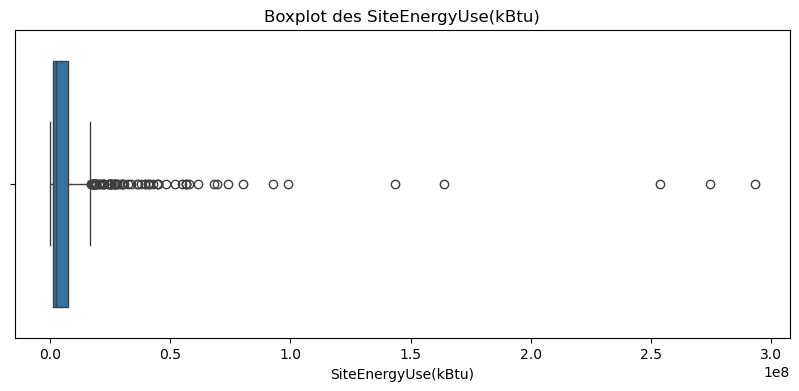

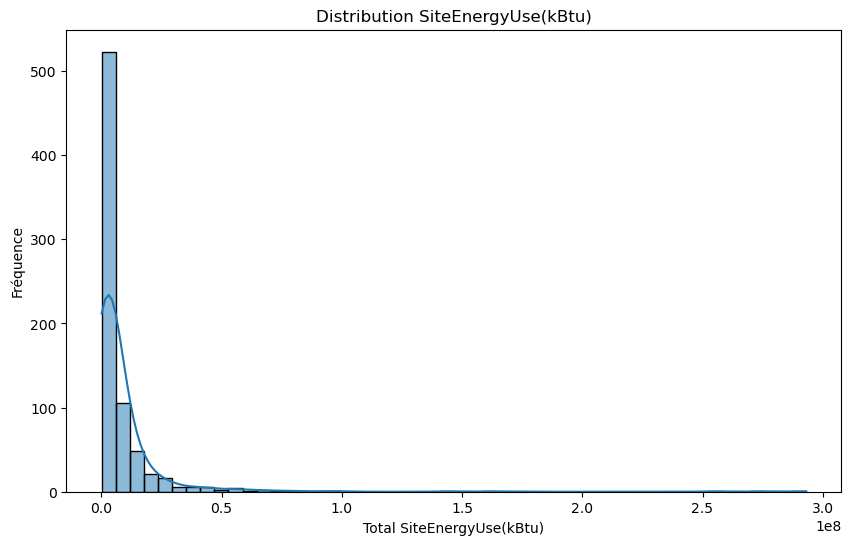

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot des SiteEnergyUse(kBtu)')
plt.show()

# Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=50, kde=True)
plt.title('Distribution SiteEnergyUse(kBtu)')
plt.xlabel('Total SiteEnergyUse(kBtu)')
plt.ylabel('Fréquence')
plt.show()

#### Distribution de y_test

In [19]:
y_test.describe()

count    1.880000e+02
mean     8.674318e+06
std      2.445541e+07
min      7.971180e+04
25%      1.218686e+06
50%      2.674356e+06
75%      7.388602e+06
max      2.916144e+08
Name: SiteEnergyUse(kBtu), dtype: float64

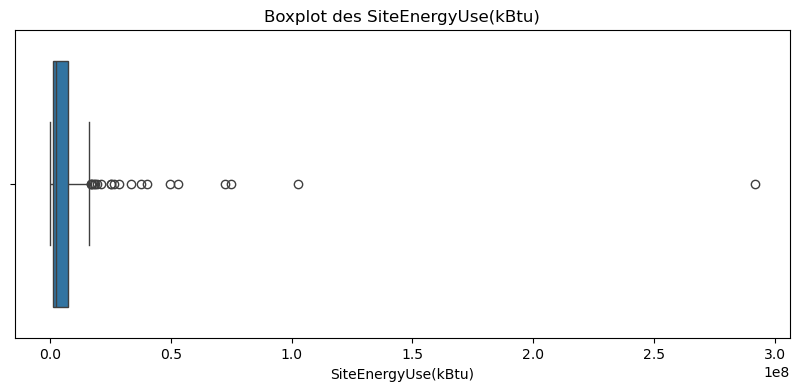

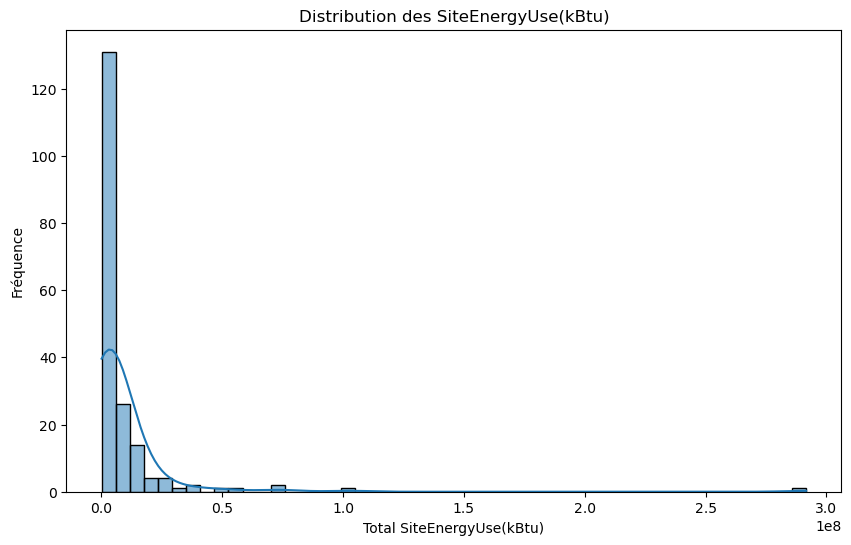

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_test)
plt.title('Boxplot des SiteEnergyUse(kBtu)')
plt.show()

# Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=50, kde=True)
plt.title('Distribution des SiteEnergyUse(kBtu)')
plt.xlabel('Total SiteEnergyUse(kBtu)')
plt.ylabel('Fréquence')
plt.show()

#### Distribution des variables de X_train

In [21]:
X_train.describe()

age_propriete  Proportion_Electricité  Proportion_Gaz  \
count     751.000000              751.000000      751.000000   
mean       61.918775                0.724900        0.250240   
std        31.600254                0.266483        0.266193   
min        10.000000                0.000000        0.000000   
25%        37.000000                0.520000        0.000000   
50%        57.000000                0.770000        0.160000   
75%        88.000000                1.000000        0.465000   
max       125.000000                1.000000        1.000000   

       NumberofBuildings  NumberofFloors  PropertyGFABuilding(s)  \
count         751.000000      751.000000            7.510000e+02   
mean            1.049268        4.994674            1.097906e+05   
std             0.512740        7.422307            1.764963e+05   
min             1.000000        1.000000            1.630000e+04   
25%             1.000000        1.000000            3.030750e+04   
50%             1.000000        3.000000            4.892500e+04   
75%             1.000000        5.000000            1.081370e+05   
max             9.000000       76.000000            1.632820e+06   

       LargestPropertyUseTypeGFA  
count               7.510000e+02  
mean                1.043837e+05  
std                 1.670242e+05  
min                 8.061000e+03  
25%                 2.749700e+04  
50%                 4.707900e+04  
75%                 1.037320e+05  
max                 1.680937e+06

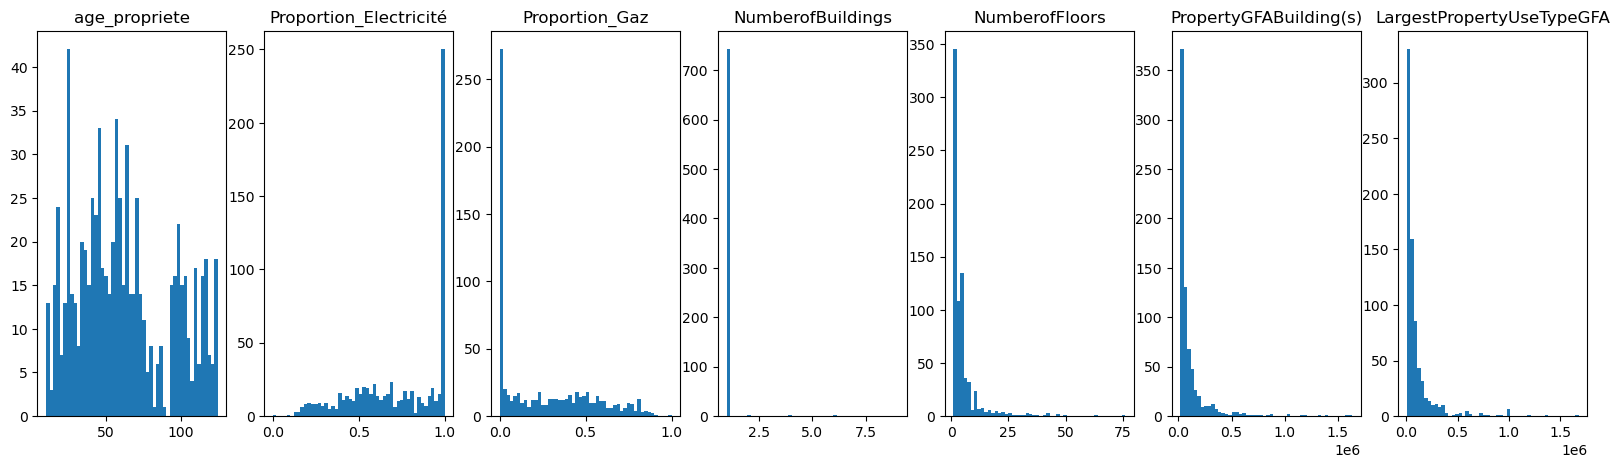

In [22]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(1, 7, figsize=(20, 5))  # fig et axs doivent être définis avant

variables = ['age_propriete','Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA']

for i, column in enumerate(variables):
    axs[i].hist(X_train[column], bins=50)
    axs[i].set_title(column)

plt.show()

#### Distribution des variables de X_test

In [23]:
X_test.describe()

age_propriete  Proportion_Electricité  Proportion_Gaz  \
count     188.000000              188.000000      188.000000   
mean       63.526596                0.744681        0.238670   
std        32.134649                0.253116        0.250112   
min        11.000000                0.020000        0.000000   
25%        38.750000                0.570000        0.000000   
50%        59.500000                0.795000        0.150000   
75%        87.000000                1.000000        0.410000   
max       125.000000                1.000000        0.980000   

       NumberofBuildings  NumberofFloors  PropertyGFABuilding(s)  \
count         188.000000      188.000000            1.880000e+02   
mean            1.047872        5.132979            1.189962e+05   
std             0.465776        8.027918            2.087172e+05   
min             1.000000        1.000000            1.620000e+04   
25%             1.000000        2.000000            2.923700e+04   
50%             1.000000        3.000000            5.260950e+04   
75%             1.000000        5.000000            1.041710e+05   
max             7.000000       56.000000            1.765970e+06   

       LargestPropertyUseTypeGFA  
count               1.880000e+02  
mean                1.116913e+05  
std                 1.978716e+05  
min                 1.109300e+04  
25%                 2.792575e+04  
50%                 4.994500e+04  
75%                 1.037180e+05  
max                 1.639334e+06

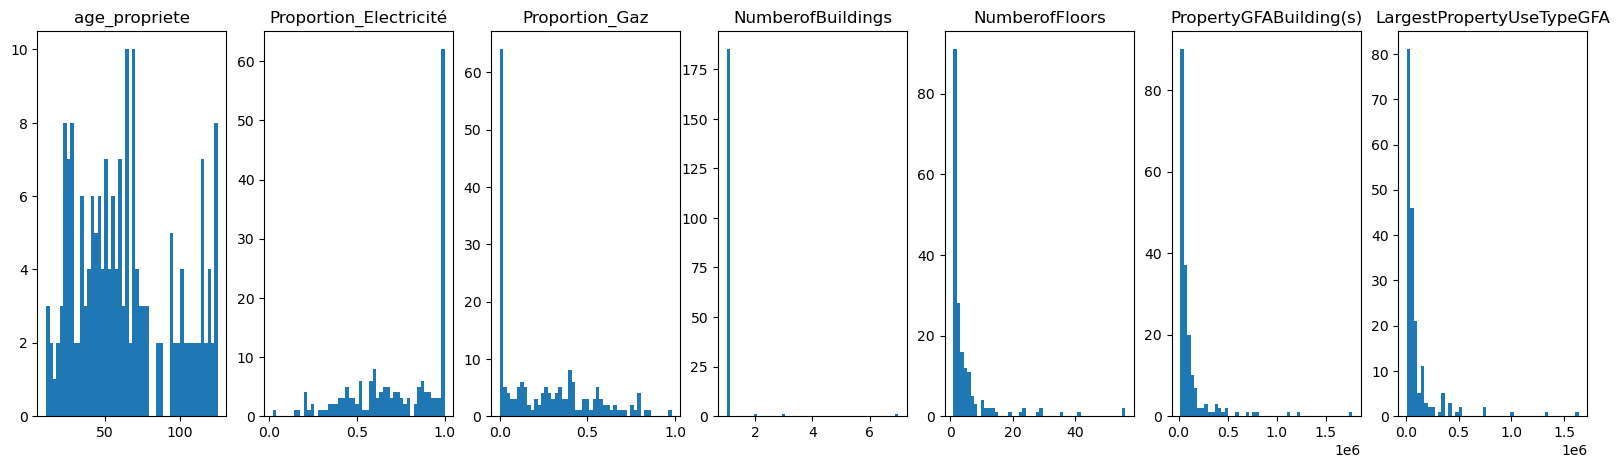

In [24]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(1, 7, figsize=(20, 5))  # fig et axs doivent être définis avant

for i, column in enumerate(variables):
    axs[i].hist(X_test[column], bins=50)
    axs[i].set_title(column)

plt.show()

### Étape 2 : Créer et entraîner un modèle linéaire simple
Une fois les données séparées, nous passons à la création du modèle. Pour ce premier modèle, nous choisissons une régression linéaire, qui est un modèle simple et efficace pour établir une ligne de base. L'objectif ici est d’entraîner le modèle sur l'ensemble d'entraînement en ajustant les coefficients des variables indépendantes pour minimiser l'erreur entre les prédictions et les valeurs réelles. Ce modèle sera ensuite évalué sur l'ensemble de test.

In [25]:
# Colonnes numériques : Sélectionner toutes les colonnes de type numérique dans X_train
var_numeriques = X_train.select_dtypes(include=['number']).columns.tolist()

# Colonnes catégorielles à encoder :
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

# Prétraitement des données explicatives (X)
preprocessing_v1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Création du pipeline avec le modèle
pipeline_lr_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement aux données
    ('model', LinearRegression())  # Appliquer le modèle de régression linéaire
])

# Entraîner le modèle : ajuster le pipeline aux données d'entraînement X_train et y_train
pipeline_lr_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode'])])),
                ('model', LinearRegression())])

### Étape 3 : Évaluer le modèle / validation croisée
Après avoir entraîné le modèle, il est important de l’évaluer en utilisant l'ensemble de test. Cela permet de mesurer la performance du modèle sur des données qu’il n’a pas vues pendant l’entraînement. On utilise des métriques classiques pour évaluer la qualité du modèle, telles que :<br>
R² (R-squared) : mesure la proportion de la variance expliquée par le modèle.<br>
MAE (Mean Absolute Error) : l’erreur absolue moyenne entre les prédictions et les valeurs réelles.<br>
RMSE (Root Mean Squared Error) : la racine carrée de l’erreur quadratique moyenne.<br>
Ces métriques permettent de comprendre dans quelle mesure le modèle est capable de prédire les résultats.<br>

La validation croisée est une technique utilisée pour évaluer la robustesse du modèle. Elle consiste à diviser les données d’entraînement en plusieurs sous-ensembles appelés folds (généralement 5 ou 10). À chaque itération, le modèle est entraîné sur n-1 folds et testé sur le fold restant. Ce processus est répété pour chaque fold, et la performance du modèle est mesurée à chaque fois. L'avantage de la validation croisée est qu’elle permet de s’assurer que le modèle est stable et qu’il ne souffre pas de sur-apprentissage (overfitting) sur une partie spécifique des données. La moyenne des résultats obtenus sur les différents folds donne une évaluation plus précise de la capacité du modèle à généraliser.

In [26]:
# Dictionnaire de scoring 
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2',
    'MAPE': make_scorer(mean_absolute_percentage_error)  # Utilisation directe de MAPE
}

# Créer les bins pour la stratification
y_train_bins = pd.qcut(y_train, q=125, labels=False)

# Créer l'objet StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v1,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4992670.631167228
RMSE moyen sur la validation croisée: 13304361.978222834
R² moyen sur la validation croisée: 0.543465313049664
MAPE moyen sur la validation croisée: 1.6503549341736132


### Conclusion

In [27]:
# On ne garde que les colonnes numériques pour le calcul du VIF
# Cela exclut les colonnes booléennes issues du One-Hot Encoding
# car le VIF n'est pas approprié pour les variables catégorielles encodées
X_train_numeric = X_train.select_dtypes(include=[np.number])

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Afficher les résultats
print(vif_data)

                    Variable        VIF
0              age_propriete   4.594047
1     Proportion_Electricité   5.768906
2             Proportion_Gaz   2.539369
3          NumberofBuildings   6.267234
4             NumberofFloors   4.149102
5     PropertyGFABuilding(s)  16.628903
6  LargestPropertyUseTypeGFA  18.395089


Le VIF mesure à quel point la variance d'une variable explicative est gonflée à cause de la colinéarité avec les autres variables du modèle. En d'autres termes, il indique combien plus de "variabilité" chaque variable a en raison de la corrélation avec les autres variables. Un VIF élevé (supérieur à 10, voire 5 dans certains cas) indique une forte colinéarité et suggère que la variable pourrait être redondante par rapport aux autres.

Les variables PropertyGFABuilding(s) et LargestPropertyUseTypeGFA présentent des VIF très élevés, indiquant une colinéarité importante avec d'autres variables. <br>
Étant donné que vous avez constaté que les variables PropertyGFABuilding(s) et LargestPropertyUseTypeGFA sont fortement corrélées lors de l'analyse bivariée, l'élevé VIF pour ces deux variables est tout à fait logique. Cela renforce l'idée qu'il y a une redondance d'information entre elles, ce qui peut nuire à la stabilité et à la fiabilité du modèle.<br>

Il serait prudent de considérer leur **élimination**, de les combiner, ou d'appliquer des techniques comme la **réduction de dimensionnalité**.<br>
Les autres variables ont des VIF raisonnables, ce qui suggère qu'elles n'introduisent pas une colinéarité excessive dans le modèle.

In [28]:
# Suppression de la colonne
X_train_numeric = X_train_numeric.drop(columns=['LargestPropertyUseTypeGFA'])
print(X_train_numeric.columns)

Index(['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)'],
      dtype='object')


In [29]:
# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Afficher les résultats
print(vif_data)

                 Variable       VIF
0           age_propriete  4.568306
1  Proportion_Electricité  5.610791
2          Proportion_Gaz  2.516439
3       NumberofBuildings  5.663586
4          NumberofFloors  3.831639
5  PropertyGFABuilding(s)  3.967194


In [30]:
# Suppression de la colonne
X_train_numeric = X_train_numeric.drop(columns=['Proportion_Electricité'])
print(X_train_numeric.columns)

Index(['age_propriete', 'Proportion_Gaz', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFABuilding(s)'],
      dtype='object')


In [31]:
# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Afficher les résultats
print(vif_data)

                 Variable       VIF
0           age_propriete  3.277242
1          Proportion_Gaz  1.957527
2       NumberofBuildings  3.639464
3          NumberofFloors  3.613854
4  PropertyGFABuilding(s)  3.927800


En supprimant la variable LargestPropertyUseTypeGFA on constate une amélioration des VIF.

### Indépendance des erreurs et homoscedasticité (Graphique des résidus)

L’hypothèse d’indépendance stipule que les résidus (les erreurs entre les valeurs observées et prédites) doivent être indépendants les uns des autres. Cela signifie que la valeur d’un résidu ne doit pas dépendre de celle des autres.<br>
Si les résidus ne sont pas indépendants (par exemple, s’ils sont corrélés), cela peut indiquer un problème comme une dépendance dans les données (par exemple, une série chronologique où les observations sont liées dans le temps). Cela peut biaiser les coefficients et rendre les tests statistiques invalides.

L'homoscédasticité est une condition importante pour la régression linéaire. Elle signifie que les résidus du modèle doivent avoir une variance constante quelle que soit la valeur des prédictions.
Les erreurs doivent être "également dispersées" autour de la ligne de régression pour toutes les valeurs prédites.
L'homoscédasticité garantit que le modèle attribue un poids égal à toutes les observations.
Si elle est violée, le modèle pourrait sous-estimer ou surestimer la fiabilité de certains coefficients, rendant les prédictions moins fiables.

#### Test de Durbin-Watson

La statistique Durbin-Watson mesure l'autocorrélation des résidus d'un modèle de régression linéaire. Elle évalue si les erreurs sont indépendantes les unes des autres. Ce test détecte l’autocorrélation dans les résidus.<br>
Les résultats du test varient entre 0 et 4 :<br>
Proche de 2 : Pas d’autocorrélation.<br>
Proche de 0 : Autocorrélation positive.<br>
Proche de 4 : Autocorrélation négative.<br>

In [33]:
# Calcul des prédictions sur le jeu d'entraînement
y_test_pred = pipeline_lr_v1.predict(X_test)

# Calcul des résidus
residuals = y_test - y_test_pred

# Calcul de la statistique Durbin-Watson
dw_stat = durbin_watson(residuals)

print(f"Statistique Durbin-Watson : {dw_stat:.2f}")

Statistique Durbin-Watson : 1.61


#### Graphique des résidus

Le graphique des résidus est un outil visuel utilisé pour évaluer la qualité d'un modèle de régression. Il représente :

- L'axe horizontal : Les valeurs prédites par le modèle.
- L'axe vertical : Les résidus, c'est-à-dire la différence entre les valeurs observées (réelles) et les valeurs prédites par le modèle.

Idéalement, les résidus devraient être répartis de manière aléatoire autour de la ligne horizontale à 0. Cela indiquerait que :

Le modèle n'a pas de biais systématique.
La variance des erreurs est constante (homoscédasticité).
Si une tendance ou un motif apparaît dans le graphique, cela peut indiquer des problèmes, comme une non-linéarité ou une non-homoscédasticité, et suggère que le modèle pourrait être amélioré.

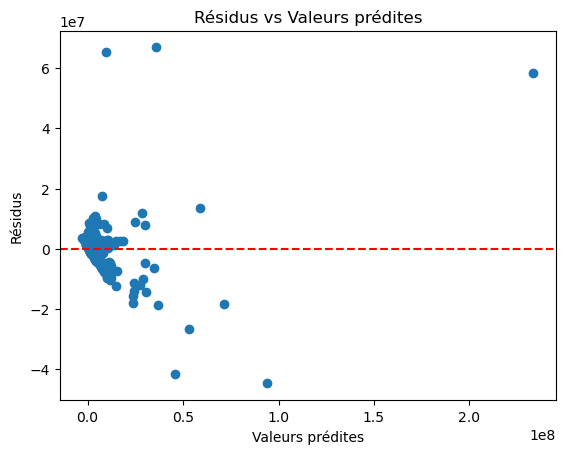

In [34]:
# Calculer les résidus (erreurs)
residuals = y_test - y_test_pred

# Tracer le graphique des résidus
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Ligne horizontale à zéro pour référence
plt.title('Résidus vs Valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

### Normalité des résidus (Histogramme et Q-Q plot)

La normalité des résidus signifie que les erreurs (différences entre les valeurs observées et prédites) dans un modèle de régression suivent une distribution normale ou gaussienne. En d'autres termes, ces erreurs devraient être réparties de manière symétrique autour de zéro, formant une "courbe en cloche".

Pourquoi est-ce important ?
- Fiabilité des tests statistiques : La normalité des résidus permet d'utiliser des tests statistiques courants pour évaluer la significativité du modèle.
- Précision des estimations : Elle assure que les estimations des paramètres du modèle sont les plus précises possibles.
- Validité des intervalles de confiance : Les intervalles de confiance et les prédictions sont plus fiables lorsque cette hypothèse est respectée.

Comment vérifier la normalité des résidus ?
Plusieurs méthodes sont couramment utilisées :
- Histogramme des résidus : Permet une visualisation de la distribution des erreurs
- Test de Shapiro-Wilk : Un test statistique qui évalue formellement la normalité (adapté ici, car notre échantillon de 1165 observations (80% de 1457) se situe dans la plage optimale pour ce test, qui est généralement recommandé pour des échantillons de moins de 2000 observations).
- Graphique Q-Q plot : Compare les quantiles des résidus aux quantiles théoriques d'une distribution normale.

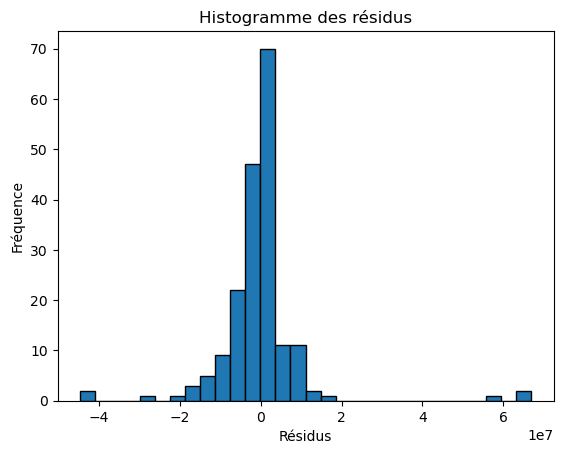

Statistique de Shapiro-Wilk : 0.6531
p-valeur : 0.0000
Les résidus ne suivent pas une distribution normale (on rejette H0).


In [35]:
# Tracer un histogramme des résidus
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Test de Shapiro-Wilk
stat, p_value = shapiro(residuals)

# Affichage des résultats
print(f"Statistique de Shapiro-Wilk : {stat:.4f}")
print(f"p-valeur : {p_value:.4f}")

# Interprétation
alpha = 0.05
if p_value > alpha:
    print("Les résidus suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les résidus ne suivent pas une distribution normale (on rejette H0).")

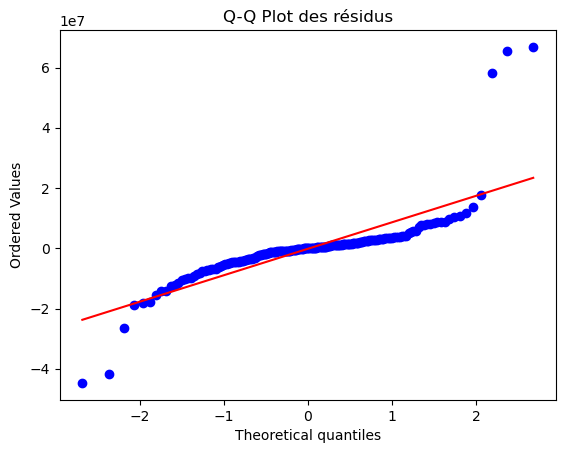

In [36]:
# Tracer un Q-Q plot pour les résidus
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des résidus')
plt.show()

Un Q-Q plot est un outil graphique qui permet de comparer la distribution de vos données avec une distribution théorique, généralement une distribution normale.

Axes :<br>
L'axe horizontal représente les quantiles théoriques (attendus si les données suivent une distribution normale).<br>
L'axe vertical représente les quantiles observés dans nos données.<br>

Ce qu’on attend :
Si nos données suivent une distribution normale, les points devraient s’aligner étroitement le long de la ligne diagonale (droite d’identité).

Déviations caractéristiques :
Si les points s’écartent significativement de la ligne diagonale, cela indique que les données ne suivent pas une distribution normale.
Éloignement aux extrémités (queues lourdes ou légères) : Les points qui s’éloignent de la ligne diagonale aux extrémités montrent que les queues de la distribution diffèrent de celles d’une normale. Cela peut indiquer une asymétrie, des valeurs extrêmes (outliers), ou des queues plus épaisses ou plus fines que celles d’une normale.

Dans notre graphique, les points suivent globalement la ligne diagonale au centre, ce qui montre que la distribution des résidus est assez proche de la normale dans la partie centrale. Cependant, aux extrémités (queues de la distribution), les points s'éloignent nettement de la ligne diagonale. Cela indique que les queues de notre distribution diffèrent de celles d’une distribution normale.

Signification :
Ces déviations aux extrémités suggèrent la présence de queues épaisses (grandes valeurs absolues des résidus) ou de valeurs extrêmes qui ne s’ajustent pas bien à une distribution normale. Cela pourrait indiquer des outliers ou des phénomènes non capturés par le modèle.

Conclusion
L'analyse du Q-Q plot montre que bien que les résidus soient approximativement normaux au centre de la distribution, les écarts significatifs aux extrémités révèlent une non-normalité dans les queues. Ces observations pourraient justifier des ajustements, comme l’application de transformations sur les variables ou l’examen plus approfondi des outliers pour améliorer l’ajustement du modèle.

Si les résidus montrent une non-normalité, cela peut indiquer que la relation entre la variable cible et les prédicteurs n'est pas linéaire ou que la variance des erreurs n'est pas constante. Voici des transformations possibles :

- Transformation logarithmique : Utiliser log(y) quand la variable cible contient des valeurs positives seulement.
- Racine carrée : Convient pour des données positives avec une distribution asymétrique.
- Box-Cox transformation : Recommandée quand les données sont positives, elle cherche automatiquement la meilleure transformation.
- Yeo-Johnson transformation : Fonctionne même si les données contiennent des valeurs négatives ou nulles.

In [37]:
# Afficher les 10 plus grandes valeurs des résidus triées par ordre décroissant (valeurs absolues)
print("\nLes 10 plus grandes valeurs des résidus triées par ordre décroissant (valeur absolue) :")
print(residuals.abs().sort_values(ascending=False).head(10))


Les 10 plus grandes valeurs des résidus triées par ordre décroissant (valeur absolue) :
1690    6.683540e+07
309     6.543221e+07
618     5.821036e+07
292     4.470528e+07
1613    4.172950e+07
293     2.663738e+07
225     1.879499e+07
271     1.828636e+07
319     1.795523e+07
194     1.766011e+07
Name: SiteEnergyUse(kBtu), dtype: float64


## Conclusion du premier modèle

Le modèle de régression linéaire initial présente des performances moyennes, avec un R² moyen sur la validation croisée	0.56, indiquant que le modèle explique 56% de la variance des données. <br>
Les principaux problèmes identifiés sont :<br>
- Non-linéarité des relations entre variables prédictives et cible
- Forte multicolinéarité entre certaines variables (PropertyGFABuilding(s) et LargestPropertyUseTypeGFA et proportion_elec et proprotion_gaz)
- Non-homoscédasticité des résidus
- Non-normalité des résidus, surtout dans les queues de distribution

Pour améliorer ce modèle, nous devrions :
- Appliquer des transformations non linéaires aux variables prédictives et à la cible (ex: logarithmique, racine carrée)
- Réduire la multicolinéarité en combinant ou supprimant des variables fortement corrélées
- Explorer des interactions entre variables, notamment pour les variables catégorielles significatives

# 2ème régression linéaire

## Etude des transformations sur la cible

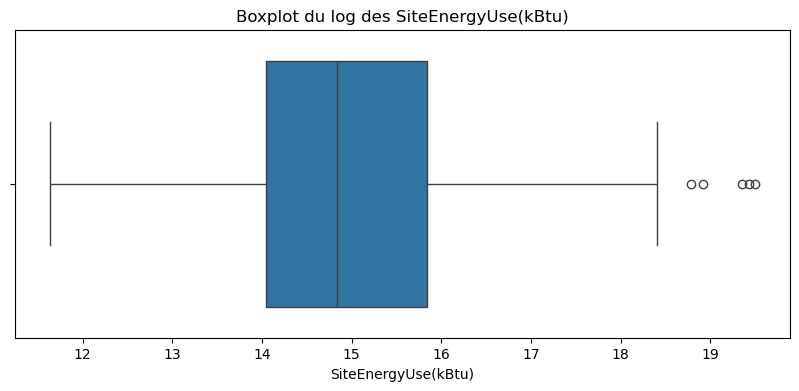

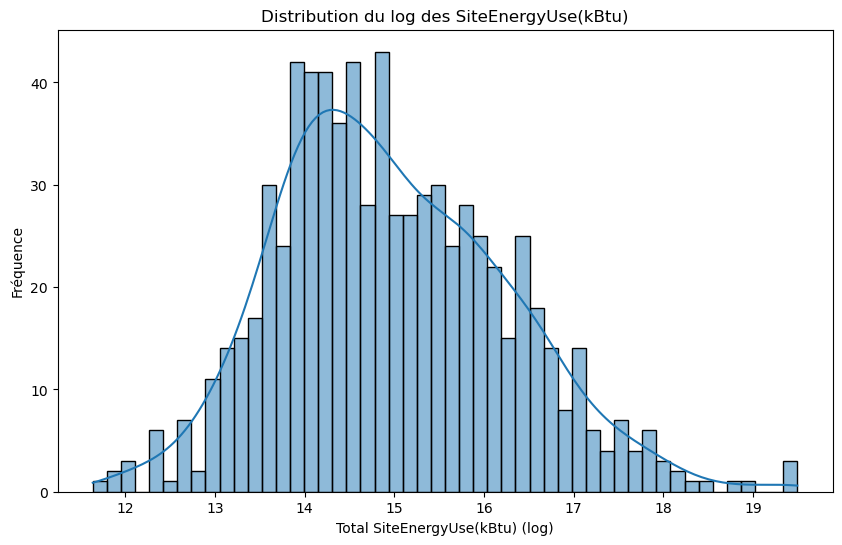

In [38]:
# Transformation logarithmique sur les Series Pandas
y_train_log = np.log1p(y_train)  # Transformation directe sur la Series

plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train_log)
plt.title('Boxplot du log des SiteEnergyUse(kBtu)')
plt.show()

# Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(y_train_log, bins=50, kde=True)
plt.title('Distribution du log des SiteEnergyUse(kBtu)')
plt.xlabel('Total SiteEnergyUse(kBtu) (log)')
plt.ylabel('Fréquence')
plt.show()

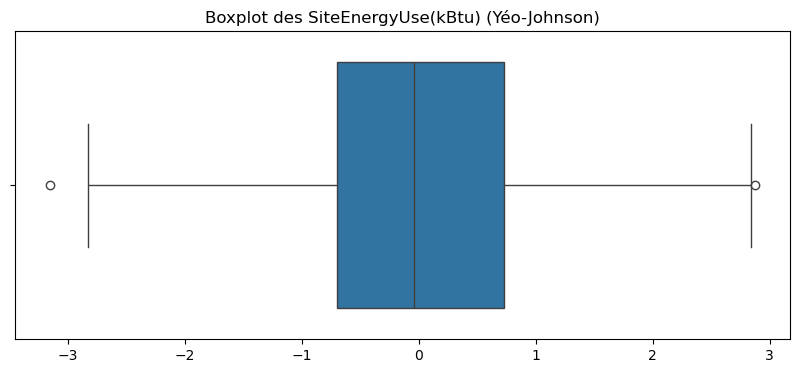

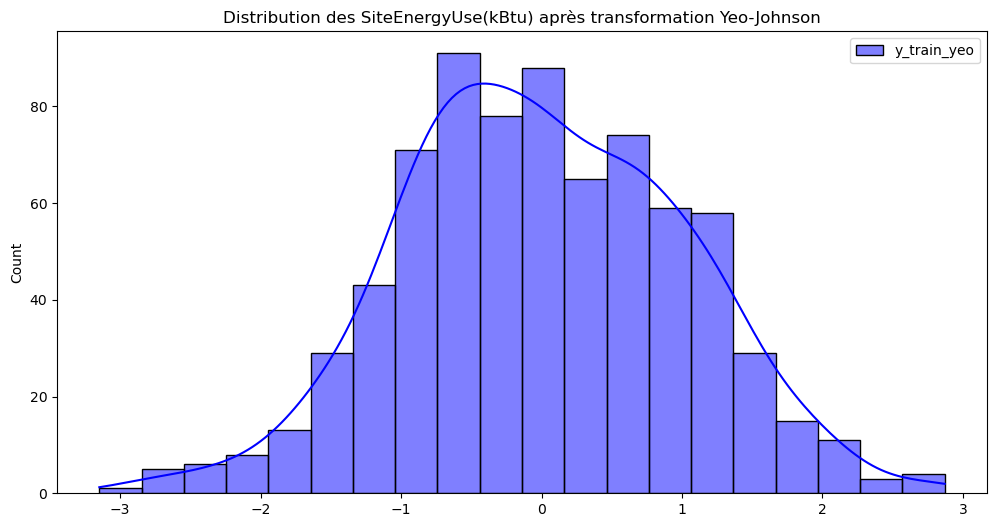

In [39]:
# Transformation Yeo-Johnson avec standardisation
transformer = PowerTransformer(method='yeo-johnson')
y_train_yeo = transformer.fit_transform(y_train.values.reshape(-1, 1))

# Boxplot des données transformées
plt.figure(figsize=(10, 4))
sns.boxplot(x=y_train_yeo.flatten())  # Utilisez .flatten() pour convertir en 1D
plt.title('Boxplot des SiteEnergyUse(kBtu) (Yéo-Johnson)')
plt.show()

# Distribution des données transformées
plt.figure(figsize=(12, 6))
sns.histplot(y_train_yeo.flatten(), kde=True, color='blue', label='y_train_yeo')  # Appliquer .flatten() ici aussi
plt.legend()
plt.title('Distribution des SiteEnergyUse(kBtu) après transformation Yeo-Johnson')
plt.show()

## Etude des transformation sur les variables explicatives

In [40]:
X_train_copie = X_train.copy()

In [41]:
X_test_copie = X_test.copy()

In [42]:
X_train_copie.shape

(751, 9)

In [43]:
X_train.shape

(751, 9)

In [44]:
# Supprimer les colonnes 'LargestPropertyUseTypeGFA' et 'Proportion_Electricité' de X_train et X_test
colonnes_a_supprimer = ['LargestPropertyUseTypeGFA', 'Proportion_Electricité']

X_train = X_train.drop(columns=colonnes_a_supprimer)
X_test = X_test.drop(columns=colonnes_a_supprimer)

In [45]:
# Sélectionner les variables numériques
var_numeriques = X_train.select_dtypes(include=['number']).columns.tolist()
X_train_numeriques = X_train[var_numeriques]

# Appliquer les transformations Log+1 et Racine carrée
X_train_log = np.log1p(X_train_numeriques)
X_train_sqrt = np.sqrt(X_train_numeriques)

# Afficher les statistiques descriptives (describe) avant et après les transformations
print("Statistiques descriptives avant transformation:")
print(X_train_numeriques.describe())

print("\nStatistiques descriptives après transformation Log+1:")
print(X_train_log.describe())

print("\nStatistiques descriptives après transformation Racine carrée:")
print(X_train_sqrt.describe())

Statistiques descriptives avant transformation:
       age_propriete  Proportion_Gaz  NumberofBuildings  NumberofFloors  \
count     751.000000      751.000000         751.000000      751.000000   
mean       61.918775        0.250240           1.049268        4.994674   
std        31.600254        0.266193           0.512740        7.422307   
min        10.000000        0.000000           1.000000        1.000000   
25%        37.000000        0.000000           1.000000        1.000000   
50%        57.000000        0.160000           1.000000        3.000000   
75%        88.000000        0.465000           1.000000        5.000000   
max       125.000000        1.000000           9.000000       76.000000   

       PropertyGFABuilding(s)  
count            7.510000e+02  
mean             1.097906e+05  
std              1.764963e+05  
min              1.630000e+04  
25%              3.030750e+04  
50%              4.892500e+04  
75%              1.081370e+05  
max              1.6

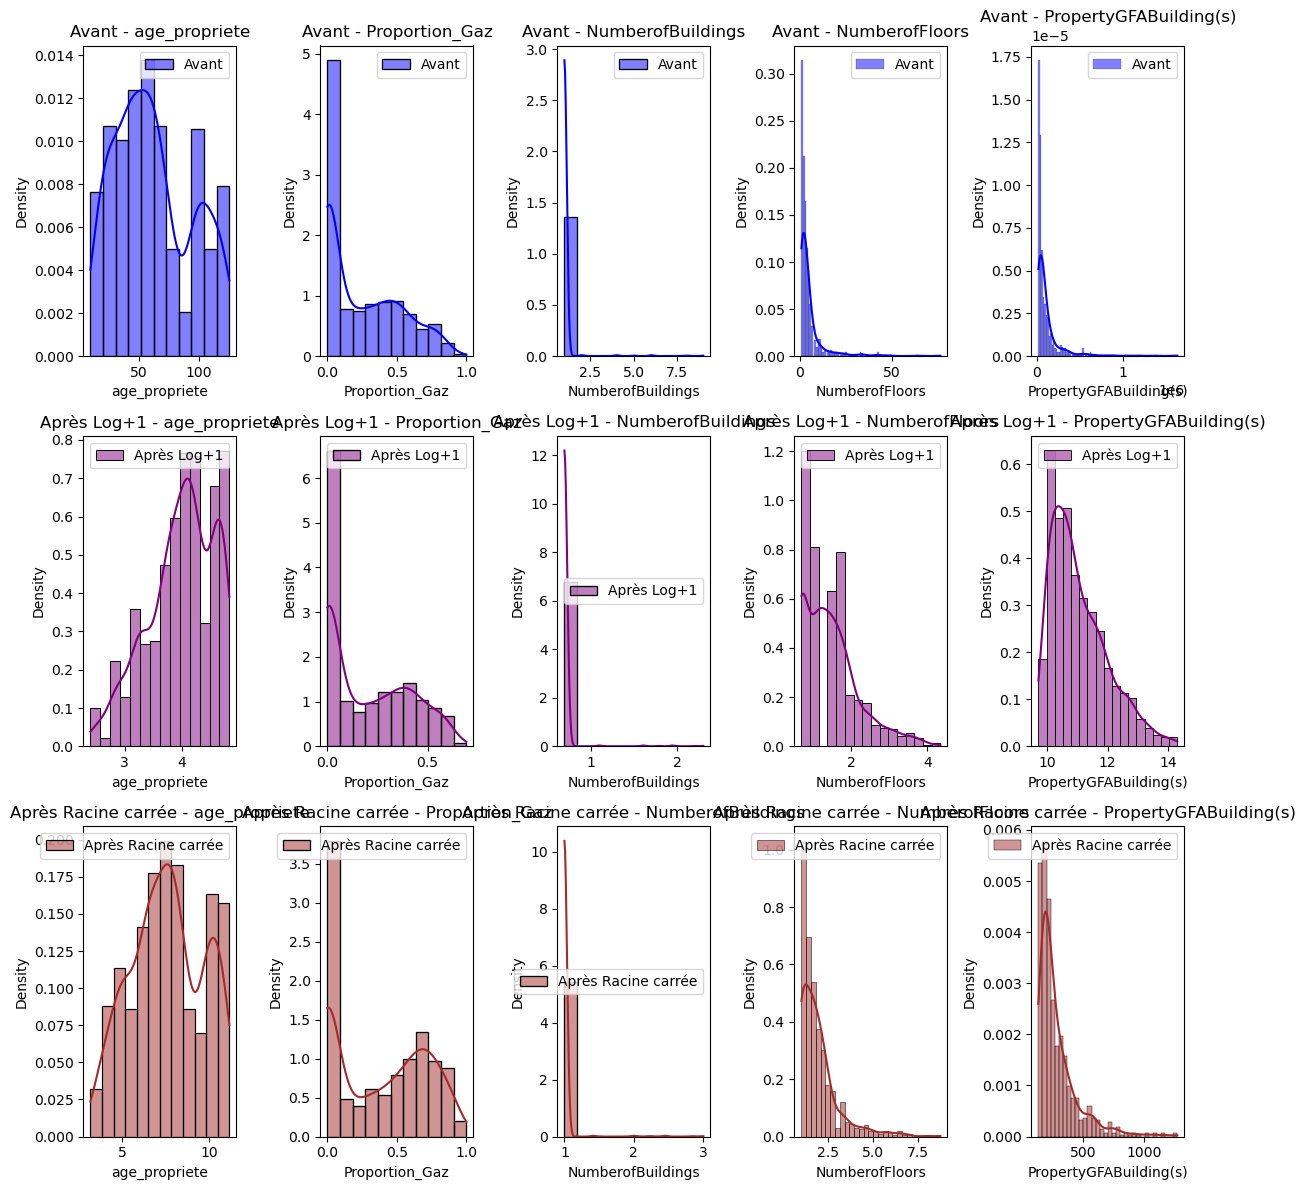

In [46]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables originales
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), i + 1)
    sns.histplot(X_train_numeriques[col], kde=True, color='blue', label='Avant', stat="density")
    plt.legend()
    plt.title(f'Avant - {col}')

# Ligne 2: Log+1 Transformation
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), len(X_train_numeriques.columns) + i + 1)
    sns.histplot(X_train_log[col], kde=True, color='purple', label='Après Log+1', stat="density")
    plt.legend()
    plt.title(f'Après Log+1 - {col}')

# Ligne 3: Racine carrée Transformation
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), 2 * len(X_train_numeriques.columns) + i + 1)
    sns.histplot(X_train_sqrt[col], kde=True, color='brown', label='Après Racine carrée', stat="density")
    plt.legend()
    plt.title(f'Après Racine carrée - {col}')

plt.tight_layout()
plt.show()

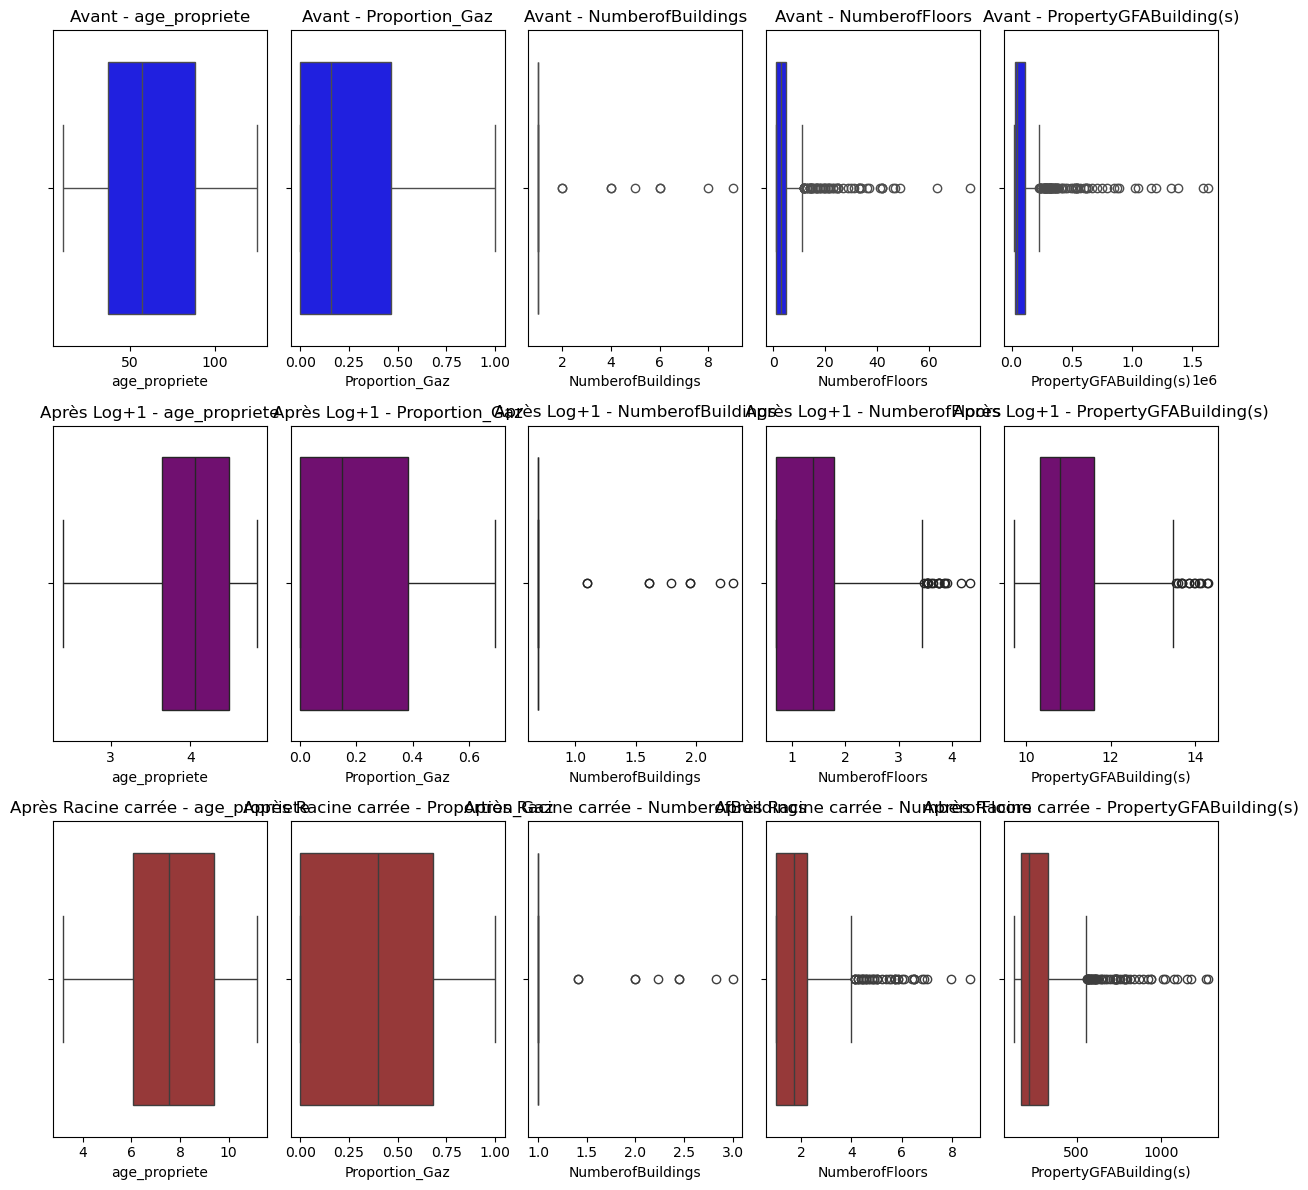

In [47]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables originales (boxplot)
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), i + 1)
    sns.boxplot(x=X_train_numeriques[col], color='blue')
    plt.title(f'Avant - {col}')

# Ligne 2: Log+1 Transformation (boxplot)
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), len(X_train_numeriques.columns) + i + 1)
    sns.boxplot(x=X_train_log[col], color='purple')
    plt.title(f'Après Log+1 - {col}')

# Ligne 3: Racine carrée Transformation (boxplot)
for i, col in enumerate(X_train_numeriques.columns):
    plt.subplot(3, len(X_train_numeriques.columns), 2 * len(X_train_numeriques.columns) + i + 1)
    sns.boxplot(x=X_train_sqrt[col], color='brown')
    plt.title(f'Après Racine carrée - {col}')

plt.tight_layout()
plt.show()

**age_propriete : Racine carrée**<br>
La transformation Racine carrée semble mieux atténuer l'impact des grandes valeurs tout en préservant la structure générale de la distribution. Elle aide à réduire l'écart entre les petites et grandes valeurs, sans les compresser de manière trop marquée, comme le ferait Log+1. Cela permet de rendre la distribution plus équilibrée sans la rendre excessivement asymétrique.

**Proportion_Gaz : Pas de transformation pour l'instant**<br>
Après examen des statistiques descriptives, ni la transformation Log+1 ni la transformation racine carrée (sqrt) n'apportent d'amélioration significative à la distribution de Proportion_Gaz. La variable reste concentrée autour de zéro, et sa médiane ainsi que son écart-type ne changent pas de manière substantielle. Étant donné qu'il s'agit déjà d'une proportion (allant de 0 à 1), il est préférable de conserver cette variable dans son état original pour préserver son interprétabilité. Nous évaluerons son impact sur le modèle avant de considérer d'éventuelles transformations.

**NumberofBuildings : Log**<br>
Log+1 est parfaitement adapté ici pour réduire la variance et traiter des variables où certaines valeurs pourraient être fortement biaisées par les petits nombres. Cela rend la distribution plus proche de la normale et facilite l'interprétation de la variable.

**NumberofFloors : Log**<br>
La transformation Log+1 a réussi à atténuer les outliers, rendant la distribution plus stable et plus représentative. Cela est particulièrement utile pour les données avec des valeurs extrêmes comme celles-ci (par exemple, 76 étages), qui peuvent fausser les analyses.

**PropertyGFABuilding(s) : Log**<br>
La transformation Log+1 fonctionne bien pour cette variable, car elle aide à réduire l'impact des valeurs extrêmes (par exemple, des propriétés de plusieurs centaines de milliers de mètres carrés) et à rendre la distribution plus homogène, comme tu l'as remarqué avec les outliers sur le box plot.

In [48]:
# Appliquer les transformations
scaler_standard = StandardScaler()
X_train_log_standard = scaler_standard.fit_transform(X_train_log)

scaler_minmax = MinMaxScaler()
X_train_log_minmax = scaler_minmax.fit_transform(X_train_log)

scaler_robust = RobustScaler()
X_train_log_robust = scaler_robust.fit_transform(X_train_log)

# Convertir les résultats des transformations en DataFrame
X_train_log_standard_df = pd.DataFrame(X_train_log_standard, columns=X_train_log.columns)
X_train_log_minmax_df = pd.DataFrame(X_train_log_minmax, columns=X_train_log.columns)
X_train_log_robust_df = pd.DataFrame(X_train_log_robust, columns=X_train_log.columns)

# Calculer les statistiques descriptives pour chaque transformation
describes_before = X_train_log.describe()
describes_standard = X_train_log_standard_df.describe()
describes_minmax = X_train_log_minmax_df.describe()
describes_robust = X_train_log_robust_df.describe()

# Afficher les résultats
print("Statistiques descriptives - Avant transformation:")
print(describes_before)
print("\nStatistiques descriptives - Après StandardScaler:")
print(describes_standard)
print("\nStatistiques descriptives - Après MinMaxScaler:")
print(describes_minmax)
print("\nStatistiques descriptives - Après RobustScaler:")
print(describes_robust)


Statistiques descriptives - Avant transformation:
       age_propriete  Proportion_Gaz  NumberofBuildings  NumberofFloors  \
count     751.000000      751.000000         751.000000      751.000000   
mean        3.994383        0.201977           0.705612        1.447747   
std         0.576103        0.203897           0.121598        0.722927   
min         2.397895        0.000000           0.693147        0.693147   
25%         3.637586        0.000000           0.693147        0.693147   
50%         4.060443        0.148420           0.693147        1.386294   
75%         4.488636        0.381849           0.693147        1.791759   
max         4.836282        0.693147           2.302585        4.343805   

       PropertyGFABuilding(s)  
count              751.000000  
mean                11.046396  
std                  0.929083  
min                  9.698982  
25%                 10.319181  
50%                 10.798064  
75%                 11.591162  
max               

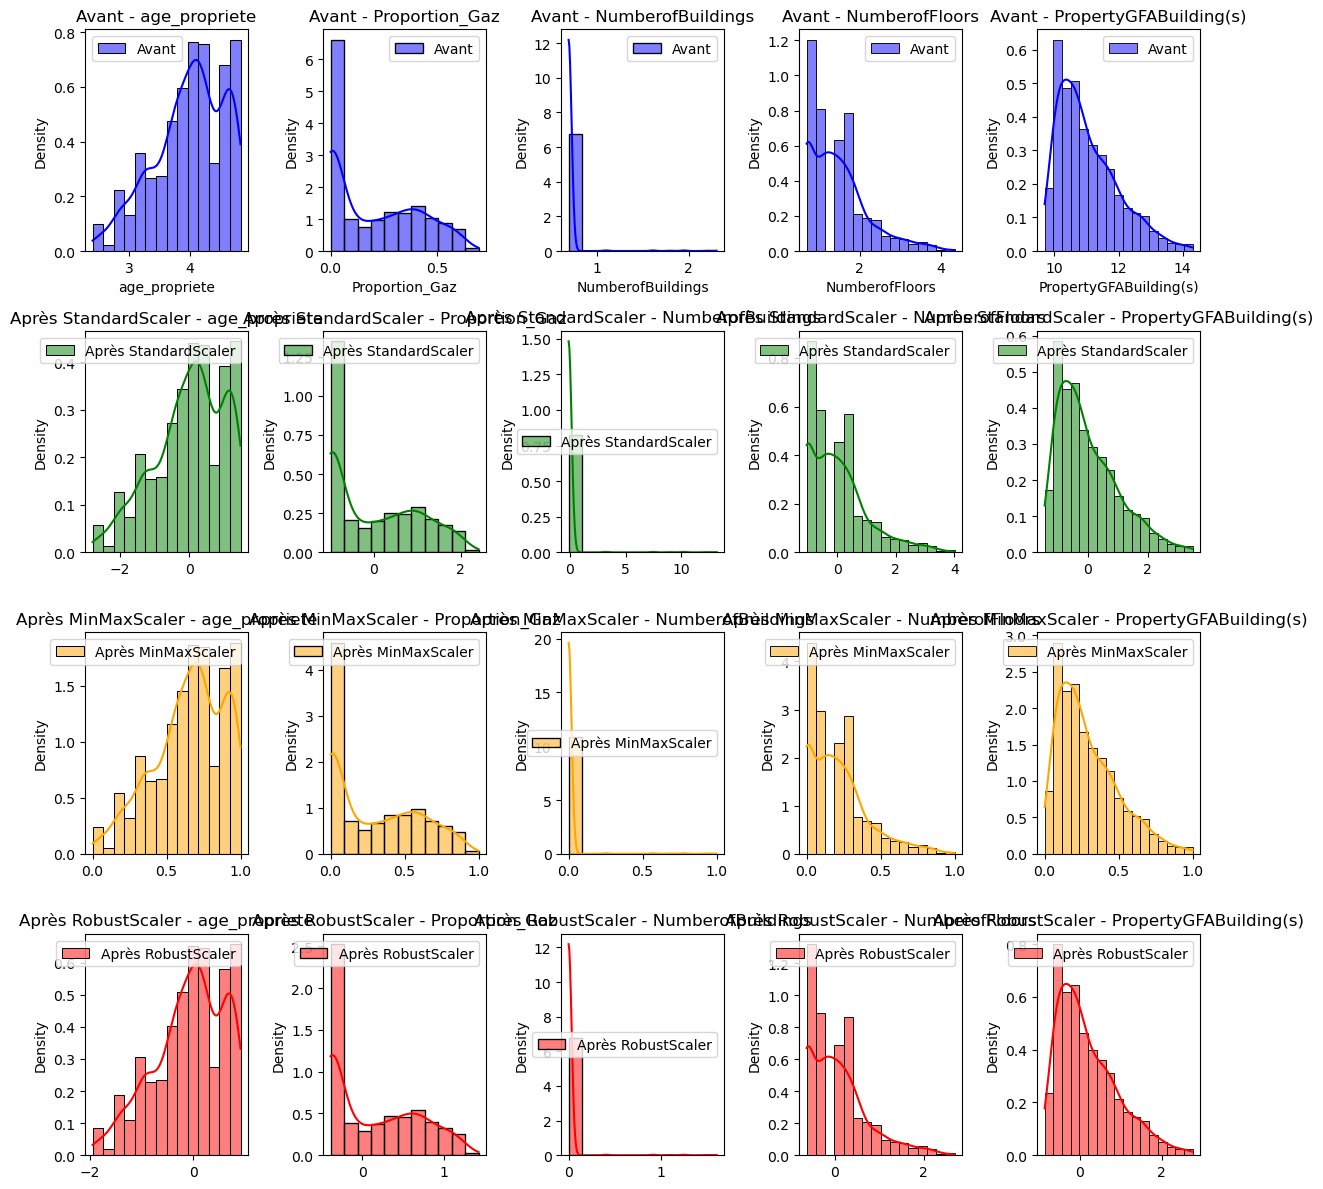

In [49]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables normales
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), i + 1)
    sns.histplot(X_train_log[col], kde=True, color='blue', label='Avant', stat="density")
    plt.legend()
    plt.title(f'Avant - {col}')

# Ligne 2: StandardScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), len(X_train_log.columns) + i + 1)
    sns.histplot(X_train_log_standard[:, i], kde=True, color='green', label='Après StandardScaler', stat="density")
    plt.legend()
    plt.title(f'Après StandardScaler - {col}')

# Ligne 3: MinMaxScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 2 * len(X_train_log.columns) + i + 1)
    sns.histplot(X_train_log_minmax[:, i], kde=True, color='orange', label='Après MinMaxScaler', stat="density")
    plt.legend()
    plt.title(f'Après MinMaxScaler - {col}')

# Ligne 4: RobustScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 3 * len(X_train_log.columns) + i + 1)
    sns.histplot(X_train_log_robust[:, i], kde=True, color='red', label='Après RobustScaler', stat="density")
    plt.legend()
    plt.title(f'Après RobustScaler - {col}')

plt.tight_layout()
plt.show()

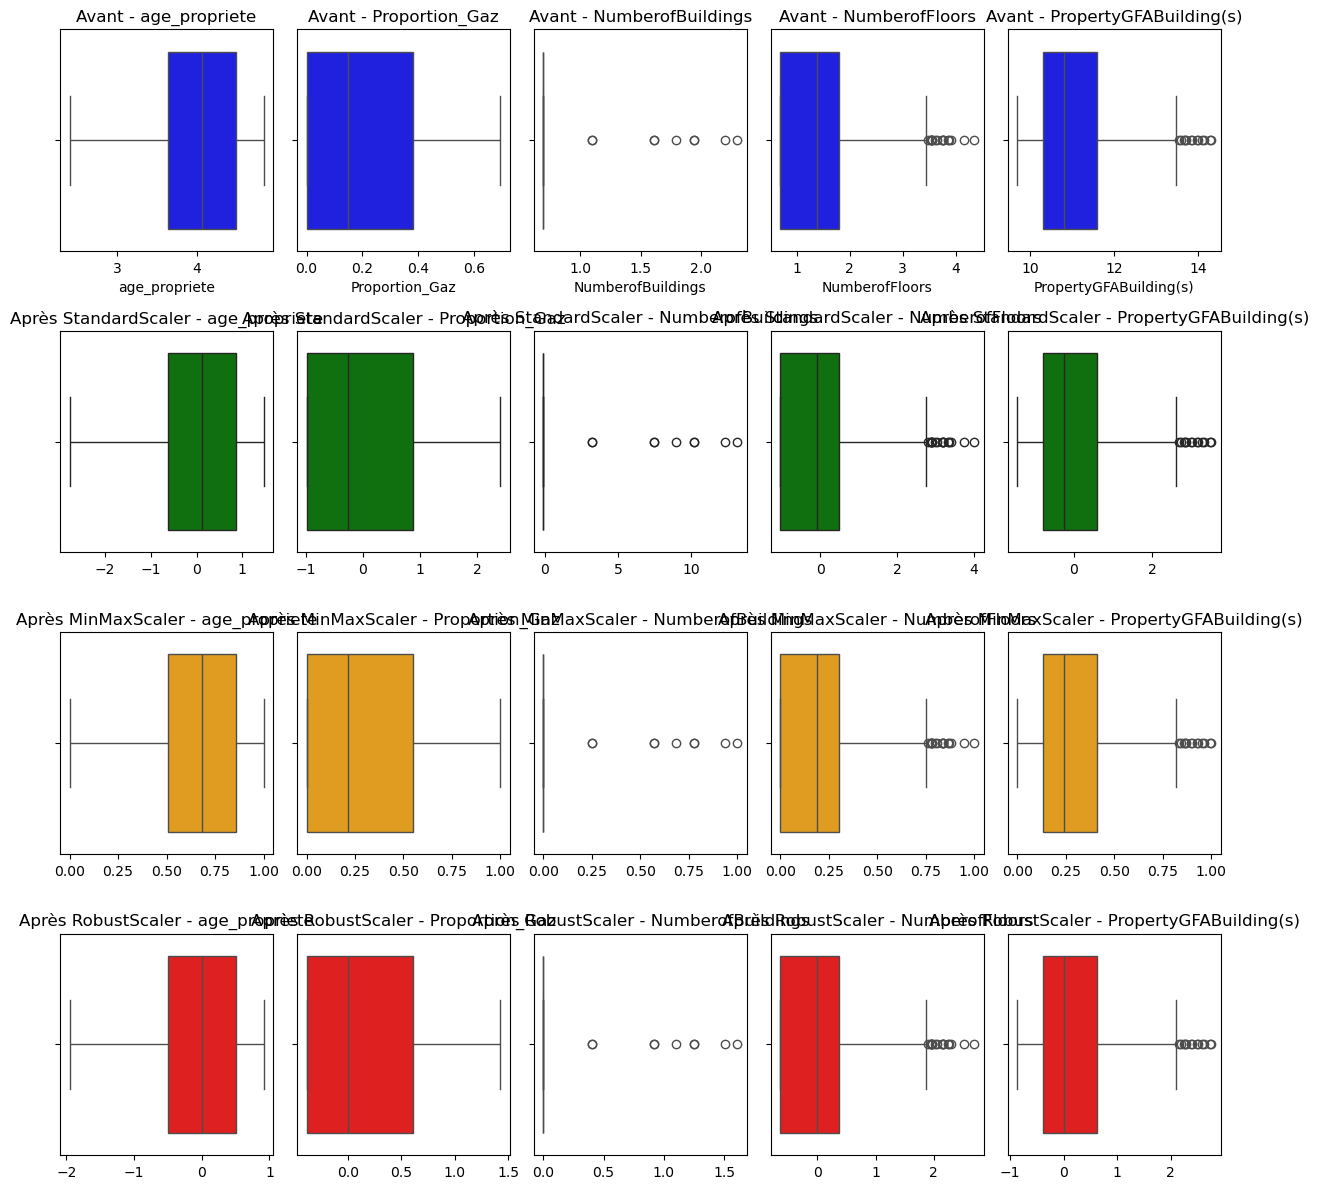

In [50]:
# Créer les subplots pour chaque ligne (une ligne pour chaque transformation)
plt.figure(figsize=(12, 12))

# Ligne 1: Variables normales
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), i + 1)
    sns.boxplot(x=X_train_log[col], color='blue')
    plt.title(f'Avant - {col}')

# Ligne 2: StandardScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), len(X_train_log.columns) + i + 1)
    sns.boxplot(x=X_train_log_standard[:, i], color='green')
    plt.title(f'Après StandardScaler - {col}')

# Ligne 3: MinMaxScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 2 * len(X_train_log.columns) + i + 1)
    sns.boxplot(x=X_train_log_minmax[:, i], color='orange')
    plt.title(f'Après MinMaxScaler - {col}')

# Ligne 4: RobustScaler
for i, col in enumerate(X_train_log.columns):
    plt.subplot(4, len(X_train_log.columns), 3 * len(X_train_log.columns) + i + 1)
    sns.boxplot(x=X_train_log_robust[:, i], color='red')
    plt.title(f'Après RobustScaler - {col}')

plt.tight_layout()
plt.show()

Dans le cadre de notre modèle de régression linéaire, nous allons appliquer différentes transformations aux variables pour optimiser leur utilisation et améliorer la performance du modèle.

**age_propriete : MinMaxScaler**<br>
Nous avons choisi d'appliquer le MinMaxScaler à la variable age_propriete, car celle-ci ne présente pas d'outliers significatifs. Cette transformation normalise les valeurs entre 0 et 1, facilitant ainsi l'interprétation des coefficients du modèle. En mettant cette variable sur une échelle uniforme, nous assurons une meilleure convergence du modèle et une interprétation plus intuitive des effets de l'âge sur la variable cible.

**Proportion_Gaz : Pas de transformation**<br>
La variable Proportion_Gaz est déjà exprimée sous forme de proportion, se situant entre 0 et 1. Par conséquent, il n'est pas nécessaire d'appliquer une transformation. En conservant cette variable dans son état original, nous préservons son interprétabilité en tant que proportion, ce qui est essentiel pour l'analyse.

**NumberofBuildings, NumberofFloors et PropertyGFABuilding(s) : RobustScaler**<br>
Pour les variables NumberofBuildings, NumberofFloors et PropertyGFABuilding(s), nous avons opté pour le RobustScaler en raison de la présence de valeurs extrêmes (outliers). Cette méthode permet de centrer les données autour de la médiane tout en réduisant l'impact des outliers grâce à l'utilisation de l'écart interquartile (IQR). En appliquant cette transformation, nous stabilisons les distributions de ces variables, ce qui contribue à améliorer la robustesse et la précision du modèle.

Conclusion<br>
Ces choix de transformation visent à optimiser les variables pour notre modèle de régression linéaire tout en garantissant leur interprétabilité. En adaptant les transformations aux caractéristiques spécifiques de chaque variable, nous cherchons à améliorer les performances du modèle et à faciliter l'analyse des résultats

## Préparation et entrainement du 2ème modèle

Le premier modèle a montré des résultats relativement faibles en termes de performance, avec un R² de 0,32, ce qui suggère une capacité limitée à expliquer la variance des émissions de CO2 (cible). De plus, l'analyse des résidus a révélé de grosses erreurs, avec des valeurs résiduelles élevées pour certaines observations, indiquant des cas où le modèle ne parvient pas à prédire de manière fiable.<br>

Pour ce second modèle, plusieurs étapes de prétraitement seront mises en place dans le but d'améliorer la performance et de réduire les erreurs résiduelles :<br>

**Gestion de la Multicolinéarité** :<br>
Une analyse de la multicolinéarité a révélé des variables fortement corrélées, notamment LargestPropertyUseTypeGFA et Proportion_Electricité, qui ont un VIF (Variance Inflation Factor) supérieur à 5. Ces variables seront retirées du modèle afin de réduire l'impact de la multicolinéarité et d'améliorer la stabilité des coefficients du modèle.

**Transformation de la Cible avec Yeo-Johnson** :<br>
Des valeurs extrêmes ont été observées dans la variable cible TotalGHGEmissions, ce qui peut influencer négativement les résultats. Afin de traiter ces valeurs extrêmes, une transformation Yeo-Johnson sera appliquée sur la cible. Cette méthode est préférée à la transformation logarithmique car elle gère mieux la distribution asymétrique. De plus, elle peut s'adapter aux valeurs positives, nulles ou proches de zéro, ce qui en fait une meilleure option que la transformation Box-Cox, qui nécessite des valeurs strictement positives.

**Transformation des Variables Numériques** :
- age_propriete: racine carrée + MinMaxScaler
- Proportion_Gaz : Pas de transformation pour l'instant
- NumberofBuildings : Log + RobustScaler
- NumberofFloors : Log + RobustScaler
- PropertyGFABuilding(s) : Log + RobustScaler

L'objectif est de créer un modèle plus robuste et précis en traitant les problèmes identifiés dans la première analyse, notamment la multicolinéarité et les valeurs extrêmes. Cette approche devrait permettre d'améliorer la performance du modèle.

In [51]:
X_test.shape

(188, 7)

In [52]:
X_train.shape

(751, 7)

In [53]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofFloors', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
    ]
)

log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v2 = Pipeline([
    ('preprocessing', preprocessing_v2),  # Appliquer le RobustScaler sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [54]:
# Entraînement du modèle sur X_train et y_train_yeo
pipeline_lr_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofFloors',
                                                   'NumberofBuild...
                                                  Pipeline(steps=[('sqrt',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                                       validate=True)),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [55]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v2,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3894524.7038512914
RMSE moyen sur la validation croisée: 12440466.077830592
R² moyen sur la validation croisée: 0.5842471656237848
MAPE moyen sur la validation croisée: 0.6123695408848956


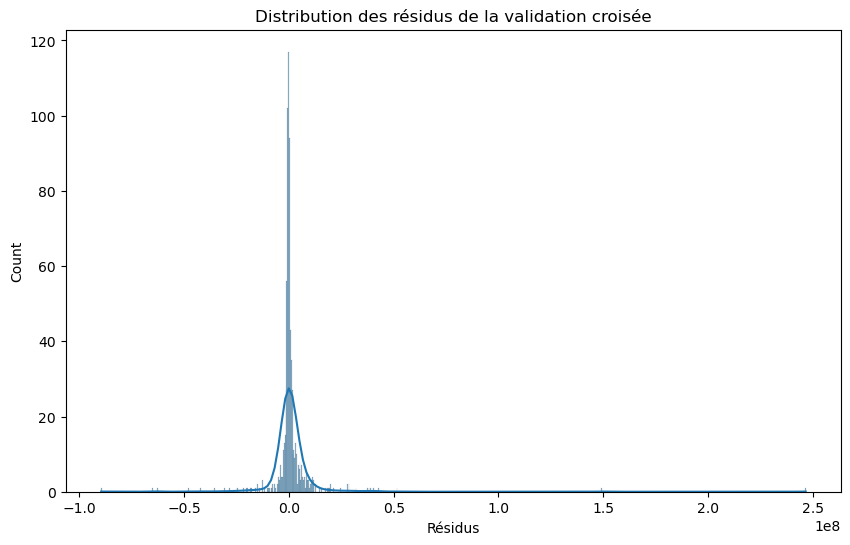

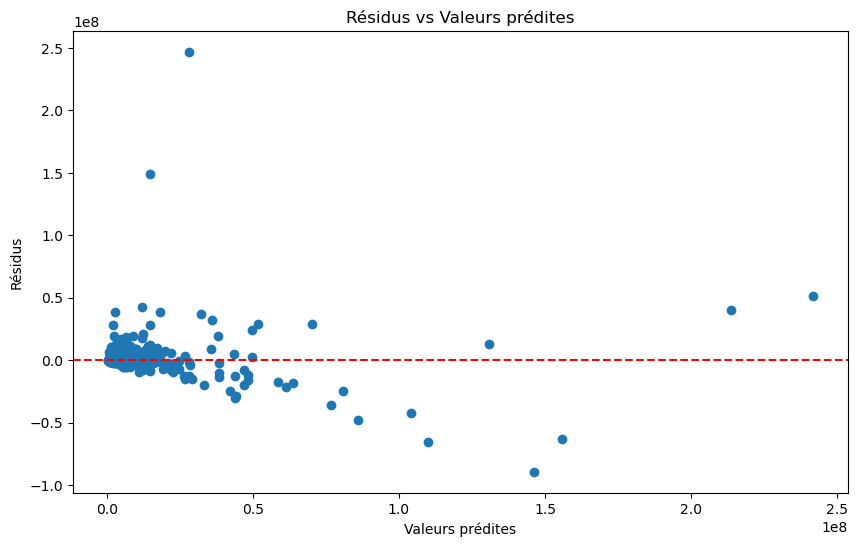

Statistiques des résidus :
Moyenne : 978041.7561711842
Écart-type : 13437177.204289658
Médiane : -25806.156056390144
Les 10 plus grands résidus (en valeur absolue) :
558     2.466218e+08
3264    1.490753e+08
490     8.962731e+07
221     6.537283e+07
559     6.286775e+07
170     5.143693e+07
577     4.814450e+07
308     4.297292e+07
233     4.236736e+07
124     4.023021e+07
Name: SiteEnergyUse(kBtu), dtype: float64


In [56]:
y_pred_cv = cross_val_predict(pipeline_lr_v2, X_train, y_train, cv=5)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus en valeur absolue
top_10_residus = residus_cv.abs().sort_values(ascending=False).head(10)

# Afficher les indices et les résidus correspondants
print("Les 10 plus grands résidus (en valeur absolue) :")
print(top_10_residus)

=> Amélioration des métriques

# 3ème régression linéaire

In [57]:
# Copier la colonne NumberofBuildings
X_Building = X_train[['NumberofBuildings']].copy()

# Initialiser le Binarizer avec un seuil de 1
binarizer_transformer = Binarizer(threshold=1)

# Appliquer la binarisation
X_Building['NumberofBuildings_binarized'] = binarizer_transformer.fit_transform(X_Building[['NumberofBuildings']])

# Vérifier la répartition des classes après binarisation
print(X_Building['NumberofBuildings_binarized'].value_counts().sort_index())

NumberofBuildings_binarized
0.0    742
1.0      9
Name: count, dtype: int64


In [58]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofFloors']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler
col_bin = ['NumberofBuildings']  
# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
binarizer_transformer = Binarizer(threshold=1)  # Binarisation
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v3 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('bin', binarizer_transformer, col_bin),  # Binarisation sur 'NumberofBuildings'
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v3 = Pipeline([
    ('preprocessing', preprocessing_v3),  # Appliquer le RobustScaler sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [59]:
# Entraînement du modèle sur X_train et y_train_yeo
pipeline_lr_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('bin', Binarizer(threshold=1),
                                                  ['NumberofBuildings']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Pr...
                                                  Pipeline(steps=[('sqrt',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                                       validate=True)),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [60]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v3,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4152546.42742344
RMSE moyen sur la validation croisée: 13637471.435428733
R² moyen sur la validation croisée: 0.5391871165655833
MAPE moyen sur la validation croisée: 0.6219707873409922


La version transformée (Log + RobustScaler) de NumberofBuildings est globalement plus performante :

Meilleur RMSE → Moins sensible aux grandes erreurs.<br>
Meilleur R² → Plus de variance expliquée.<br>
MAPE légèrement amélioré.<br>

La binarisation simplifie trop la variable, ce qui limite l'information transmise au modèle.<br>

Je vais conserver la version continue avec Log + RobustScaler, cette approche permet de mieux capturer les variations et d’améliorer les performances globales du modèle.

# 4ème régression linéaire

In [61]:
# Exemple avec ta colonne NumberofFloors
X_Floor = X_train[['NumberofFloors']].copy()

# Initialiser le discretizer avec 3 bins et la stratégie 'quantile'
kbins_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Ajuster (fit) et transformer les données
X_Floor['NumberofFloors_binned'] = kbins_discretizer.fit_transform(X_Floor[['NumberofFloors']])

# Vérifier la répartition des classes
print(X_Floor['NumberofFloors_binned'].value_counts().sort_index())

NumberofFloors_binned
0.0    206
1.0    247
2.0    298
Name: count, dtype: int64


In [62]:
# Afficher les bornes des intervalles créés par le discretizer
print(kbins_discretizer.bin_edges_)

[array([ 1.,  2.,  4., 76.])]


In [63]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v4 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v4 = Pipeline([
    ('preprocessing', preprocessing_v4),  # Appliquer le RobustScaler sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [64]:
# Entraînement du modèle sur X_train et y_train_yeo
pipeline_lr_v4.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings']),
                                                 ('sqrt_mi...
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [65]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v4,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3752061.0663170638
RMSE moyen sur la validation croisée: 11916381.438523937
R² moyen sur la validation croisée: 0.602229196895083
MAPE moyen sur la validation croisée: 0.6166009095368892


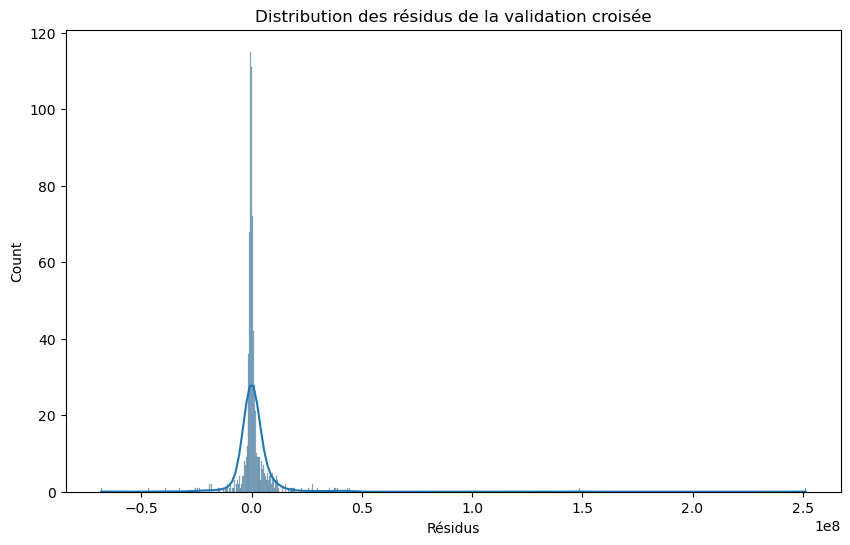

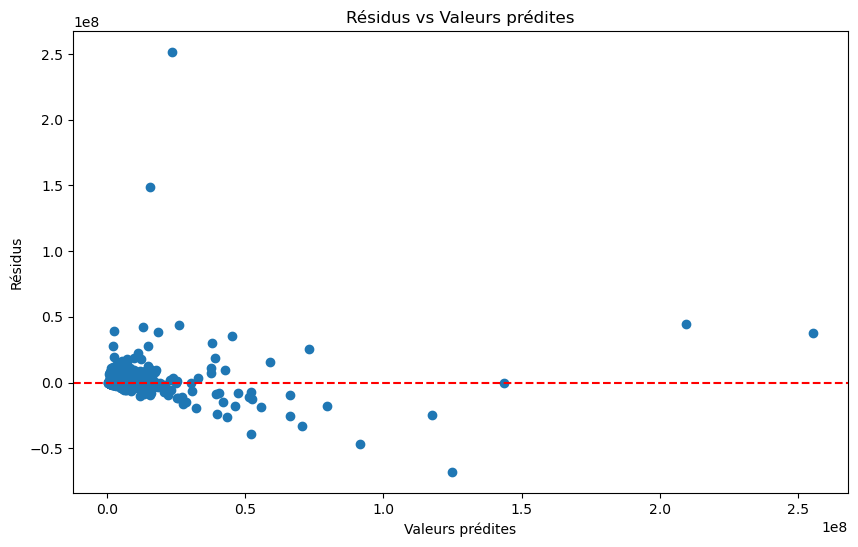

Statistiques des résidus :
Moyenne : 1165990.458393422
Écart-type : 12834040.137592824
Médiane : -39747.641073727515
Les 10 plus grands résidus (en valeur absolue) :
558     2.513212e+08
3264    1.484822e+08
490     6.825381e+07
221     4.675155e+07
124     4.423717e+07
231     4.360239e+07
308     4.219771e+07
3203    3.898438e+07
2835    3.888475e+07
262     3.810249e+07
Name: SiteEnergyUse(kBtu), dtype: float64


In [66]:
y_pred_cv = cross_val_predict(pipeline_lr_v4, X_train, y_train, cv=5)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus en valeur absolue
top_10_residus = residus_cv.abs().sort_values(ascending=False).head(10)

# Afficher les indices et les résidus correspondants
print("Les 10 plus grands résidus (en valeur absolue) :")
print(top_10_residus)

=> Discrétiser la variable NumberofFloors améliore les métriques

# 5ème régression linéaire 

In [67]:
# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_district_combined(X):
    X = X.copy()
    X['Usage_district_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['CouncilDistrictCode'].astype(str)
    return X

# Transformations personnalisées
usage_district_transformer = FunctionTransformer(create_usage_district_combined, validate=False)

# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v5 = Pipeline(steps=[
    ('combine_usage_district', usage_district_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_district_Combiné']),
            ('log_robust', Pipeline(steps=[
                ('log', log_transformer),
                ('robust', robust_transformer)
            ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
            ('sqrt_minmax', Pipeline(steps=[
                ('sqrt', sqrt_transformer),
                ('minmax', minmax_transformer)
            ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
            ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
            ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz
        ]
    ))
])

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v5 = Pipeline([
    ('preprocessing', preprocessing_v5),  # Appliquer le preprocessing sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [68]:
pipeline_lr_v5.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('combine_usage_district',
                                  FunctionTransformer(func=<function create_usage_district_combined at 0x0000025DEE0E37E0>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_district_Combiné']),
                                                                  ('log_robust',
                                                                   Pipeline(steps=[('l...
                                                                                    FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                                                        validate=True)),
                                                                                   ('minmax',
                                                                                    MinMaxScaler())]),
                                                                   ['age_propriete']),
                                                                  ('discretize',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3),
                                                                   ['NumberofFloors']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                                            validate=True)))])

In [69]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v5,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 8328001.232294147
RMSE moyen sur la validation croisée: 22068946.23180058
R² moyen sur la validation croisée: -0.19621529100660182
MAPE moyen sur la validation croisée: 0.9999910449753008


=> Combiner UsePropertyType et CouncilDistrictCode détériore les métriques 

# 6ème régression linéaire

In [70]:
# Colonnes à transformer
col_log_robust = ['PropertyGFABuilding(s)', 'NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler
col_log = ['Proportion_Gaz'] # log seul

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
log1_transformer = FunctionTransformer(np.log1p, validate=True)# transformation log+1 pour proportion_gaz
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v6 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', sqrt_transformer),
            ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
        ('log1', log1_transformer, col_log)  
    ]
)

log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v6 = Pipeline([
    ('preprocessing', preprocessing_v6),  # Appliquer le RobustScaler sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [71]:
# Entraînement du modèle sur X_train et y_train
pipeline_lr_v6.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings']),
                                                 ('sqrt_mi...
                                                  ['age_propriete']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('log1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [72]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v6,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3756315.6136148064
RMSE moyen sur la validation croisée: 11959563.347847153
R² moyen sur la validation croisée: 0.6005141814967142
MAPE moyen sur la validation croisée: 0.6139295857770776


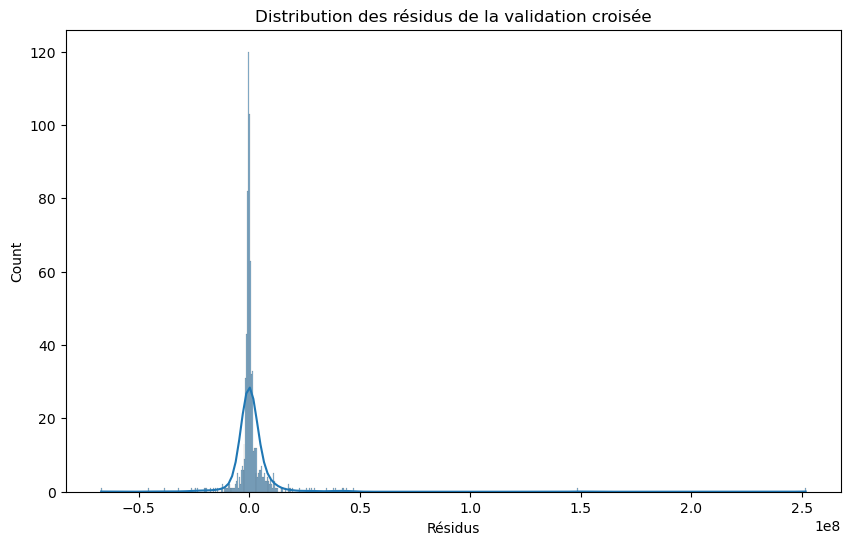

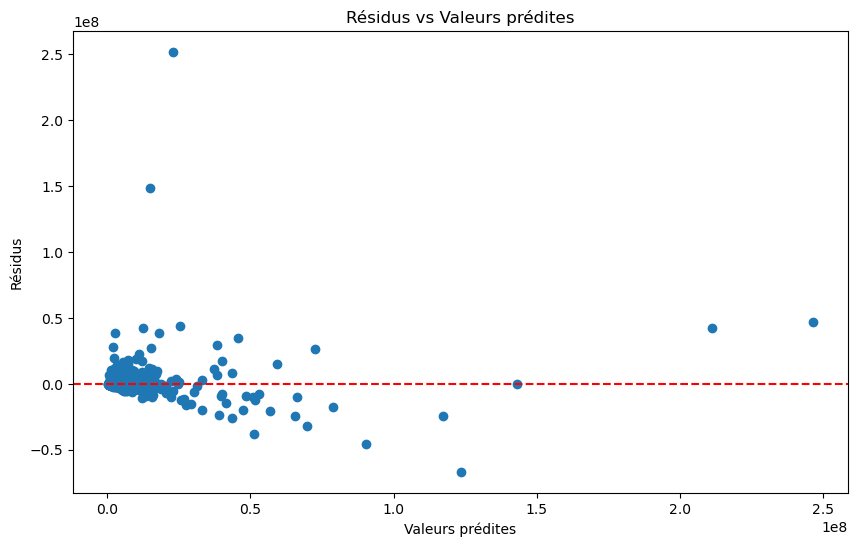

Statistiques des résidus :
Moyenne : 1173885.1881290753
Écart-type : 12860191.728166603
Médiane : -22643.858862920664
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.297538e+07  2.517068e+08
3264    163945984.0    1.517864e+07  1.487673e+08
490      56498868.0    1.234717e+08 -6.697278e+07
221      44683660.0    9.031273e+07 -4.562907e+07
124     253832464.0    2.110400e+08  4.279243e+07
231      69519808.0    2.557821e+07  4.394159e+07
308      55073120.0    1.269206e+07  4.238106e+07
3203     41680640.0    2.643650e+06  3.903699e+07
2835     13270687.0    5.147142e+07 -3.820073e+07
262      56485204.0    1.814133e+07  3.834387e+07


In [73]:
y_pred_cv = cross_val_predict(pipeline_lr_v6, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> Utiliser le log sur proportion_Gaz détériore les métriques

# 7ème régression linéaire

In [74]:
# Colonnes à transformer
col_log_robust = ['NumberofBuildings', 'PropertyGFABuilding(s)']  # Logarithme + RobustScaler 
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

var_cat = ['LargestPropertyUseType']#, 'CouncilDistrictCode'

# Transformation personnalisée
log_transformer = FunctionTransformer(np.log, validate=True)
log1_transformer = FunctionTransformer(np.log1p, validate=True)# transformation log+1 pour proportion_gaz
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
robust_transformer = RobustScaler()
minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v7 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
        ('log_robust', Pipeline(steps=[
            ('log', log_transformer),
            ('robust', robust_transformer)
        ]), col_log_robust),  # Log + RobustScaler sur les colonnes avec outliers
        ('sqrt_minmax', Pipeline(steps=[
           ('sqrt', sqrt_transformer),
           ('minmax', minmax_transformer)
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler sur age_propriete
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
        ('passthrough', 'passthrough', ['Proportion_Gaz'])  # Pas de transformation pour Proportion_Gaz  
    ]
)

log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v6 = Pipeline([
    ('preprocessing', preprocessing_v6),  # Appliquer le RobustScaler sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

# Construction du pipeline avec PolynomialFeatures
pipeline_lr_v7 = Pipeline([
    ('preprocessing', preprocessing_v7),  # Appliquer les transformations sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [75]:
# Entraînement du modèle sur X_train et y_train
pipeline_lr_v7.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['NumberofBuildings',
                                                   'PropertyGFABuilding(s)']),
                                                 ('sqrt_minmax',
                                                  Pipeline(steps=[...
                                                                   MinMaxScaler())]),
                                                  ['age_propriete']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors']),
                                                 ('passthrough', 'passthrough',
                                                  ['Proportion_Gaz'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [76]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v7,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3757506.803903392
RMSE moyen sur la validation croisée: 12073840.778146852
R² moyen sur la validation croisée: 0.5951401128563925
MAPE moyen sur la validation croisée: 0.6076614122995013


=> La suppresion de CouncilDistrictCode détériore les métriques

# 8ème régression linéaire

In [77]:
# Exemple avec la colonne 'PropertyGFABuilding(s)' et les catégories de taille définies précédemment
X_taille = X_train[['PropertyGFABuilding(s)']].copy()

# Regrouper par les catégories de taille définies
X_taille['PropertyGFABuilding(s)_binned'] = pd.cut(X_taille['PropertyGFABuilding(s)'], 
                                                   bins=[0, 50000, 100000, 200000, X_taille['PropertyGFABuilding(s)'].max()], 
                                                   labels=[0, 1, 2, 3])

# Vérifier la répartition des classes
print(X_taille['PropertyGFABuilding(s)_binned'].value_counts().sort_index())

PropertyGFABuilding(s)_binned
0    381
1    164
2    111
3     95
Name: count, dtype: int64


In [78]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    return pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels).to_frame()

# Transformation personnalisée encapsulée
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)

# Colonnes à transformer
col_log_robust = ['NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler
col_binned = ['PropertyGFABuilding(s)']  # Colonne à découper manuellement

# Pipeline de prétraitement
preprocessing_v8 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
        ('log_robust', Pipeline(steps=[
            ('log', FunctionTransformer(np.log, validate=True)),
            ('robust', RobustScaler())
        ]), col_log_robust),  # Log + RobustScaler
        ('sqrt_minmax', Pipeline(steps=[
            ('sqrt', FunctionTransformer(np.sqrt, validate=True)),
            ('minmax', MinMaxScaler())
        ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler
        ('passthrough', 'passthrough', ['Proportion_Gaz']),  # Pas de transformation pour Proportion_Gaz
        ('binning', bin_transformer, col_binned),  # Création de la colonne binned
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
    ]
)

# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v8 = Pipeline([
    ('preprocessing', preprocessing_v8),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [79]:
# Entraînement du modèle sur X_train et y_train
pipeline_lr_v8.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType']),
                                                 ('log_robust',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       validate=True)),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['NumberofBuildings']),
                                                 ('sqrt_minmax',
                                                  Pipeline(steps=[('sqrt',
                                                                   FunctionTransform...
                                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEEB989A0>),
                                                  ['PropertyGFABuilding(s)']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [80]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v8,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4405746.061094751
RMSE moyen sur la validation croisée: 14976038.868827593
R² moyen sur la validation croisée: 0.46670420892010844
MAPE moyen sur la validation croisée: 0.6891473877644112


=> La discrétisation de PropertyGFABuilding(s) détériore les métriques

# 9ème regression linéaire

In [81]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

# Transformations personnalisées
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

# Colonnes à transformer
col_log_robust = ['NumberofBuildings']  # Logarithme + RobustScaler
col_sqrt_minmax = ['age_propriete']  # Racine carrée + MinMaxScaler

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['CouncilDistrictCode']

# Pipeline de prétraitement
preprocessing_v9 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('log_robust', Pipeline(steps=[
                ('log', FunctionTransformer(np.log, validate=True)),
                ('robust', RobustScaler())
            ]), col_log_robust),  # Log + RobustScaler
            ('sqrt_minmax', Pipeline(steps=[
                ('sqrt', FunctionTransformer(np.sqrt, validate=True)),
                ('minmax', MinMaxScaler())
            ]), col_sqrt_minmax),  # Racine carrée + MinMaxScaler
            ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
            ('passthrough', 'passthrough', ['Proportion_Gaz']),  # Pas de transformation pour Proportion_Gaz
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné'])  # OneHot sur 'Usage_Taille_Combiné'
        ]
    ))
])


# Construire le pipeline avec TransformedTargetRegressor pour la cible
pipeline_lr_v9 = Pipeline([
    ('preprocessing', preprocessing_v9),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [82]:
# Entraînement du modèle sur X_train et y_train
pipeline_lr_v9.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEEB98FE0>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEEB98E00>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('cat',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'...
                                                                   ['NumberofFloors']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Gaz']),
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [83]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_lr_v9,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)

# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4475265.013277632
RMSE moyen sur la validation croisée: 14803907.180012647
R² moyen sur la validation croisée: 0.48139537018657574
MAPE moyen sur la validation croisée: 0.6688569973217692


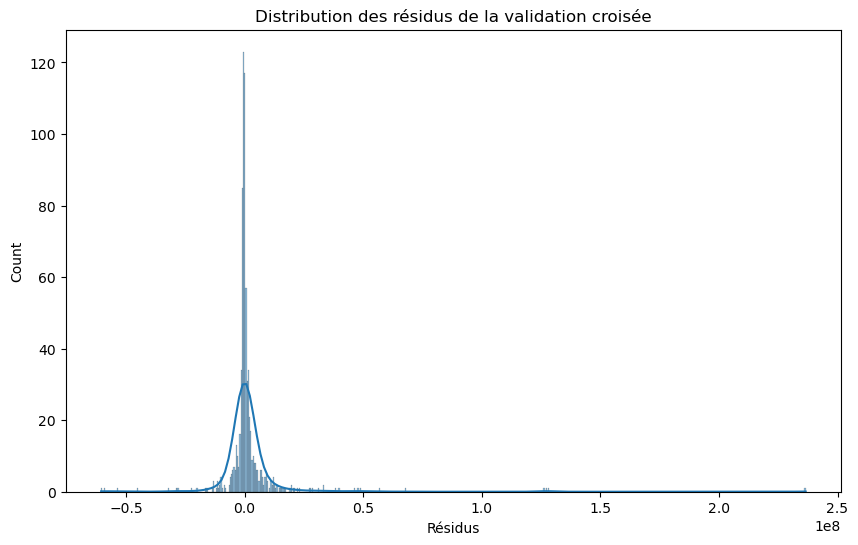

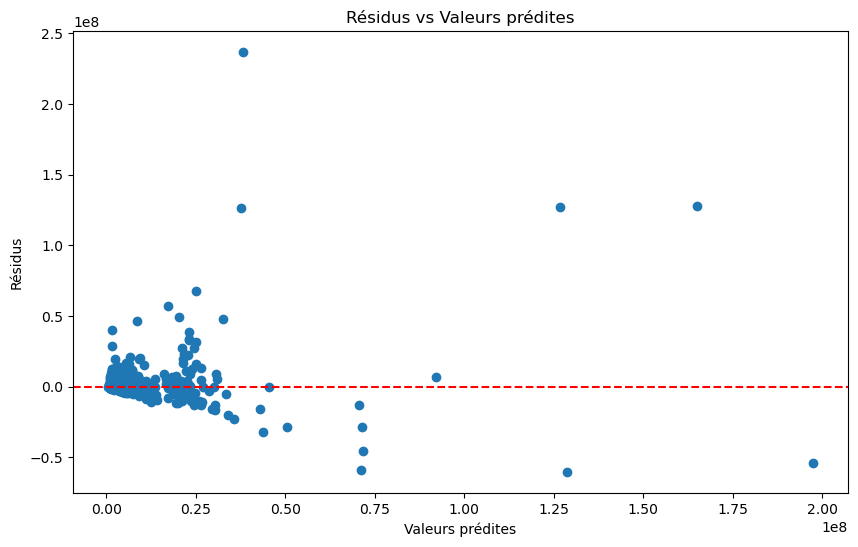

Statistiques des résidus :
Moyenne : 1580890.8814858415
Écart-type : 14416509.207974872
Médiane : -74983.92557987757
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    3.812071e+07  2.365615e+08
3264    163945984.0    3.764418e+07  1.263018e+08
490      56498868.0    2.516391e+07  3.133496e+07
221      44683660.0    2.168232e+07  2.300134e+07
124     253832464.0    1.266440e+08  1.271885e+08
231      69519808.0    2.043943e+07  4.908038e+07
308      55073120.0    8.586509e+06  4.648661e+07
3203     41680640.0    1.650454e+06  4.003019e+07
2835     13270687.0    2.653845e+07 -1.326776e+07
262      56485204.0    2.319838e+07  3.328682e+07


In [84]:
y_pred_cv = cross_val_predict(pipeline_lr_v9, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> Combiner le taille et l'usage principal du bâtiment détériore les métriques

# Conclusion des modèles de régression linéaire

| Modèle | R²  | MAE       | RMSE      | MAPE |
|--------|-----|-----------|-----------|------|
| 1      | 0.54 | 4 992 670 | 13 304 361 | 1.65 |
| 2      | 0.58 | 3 894 524 | 12 440 466 | 0.61 |
| 3      | 0.54 | 4 152 546 | 13 637 471 | 0.62 |
| **4**      | **0.60** | **3 752 061** | **11 916 381** | **0.62** |
| 5      | -0.2 | 8 328 001 | 22 068 946 | 1.00 |
| 6      | 0.60 | 3 756 315 | 11 959 563 | 0.61 |
| 7      | 0.60 | 3 757 506 | 12 073 840 | 0.61 |
| 8      | 0.47 | 4 405 746 | 14 976 038 | 0.69 |
| 9      | 0.48 | 4 475 265 | 14 803 907 | 0.67 |


Le modèle 4 semble être le meilleur choix.

- R² = 0.60 (le plus élevé)
- MAE = 3 752 061 (le plus bas)
- RMSE = 11 916 381 (le plus bas)
- MAPE = 0.62 (faible et proche des autres modèles performants)

Description des transformations du Modèle 4

- **Colonnes transformées par Logarithme + RobustScaler**<br>
PropertyGFABuilding(s) et NumberofBuildings<br>
Transformation : Application du logarithme pour atténuer l’impact des valeurs extrêmes, suivi du RobustScaler qui limite l'influence des outliers en utilisant la médiane et l'écart interquartile.<br>

- **Colonnes transformées par Racine carrée + MinMaxScaler**<br>
age_propriete<br>
Transformation : Racine carrée pour lisser les écarts + MinMaxScaler pour normaliser entre 0 et 1.<br>

- **Discrétisation**<br>
NumberofFloors<br>
Transformation : Découpage en 3 classes d'effectifs égaux avec KBinsDiscretizer (quantile).<br>

- **Encodage des variables catégorielles**<br>
UsePropertyType et CouncilDistrictCode<br>
Transformation : OneHotEncoder avec suppression de la première catégorie (drop='first') pour éviter la colinéarité.<br>

- **Transformation de la cible (y)**<br>
Utilisée pour atténuer l’impact des valeurs extrêmes.

- **Suppression des variables**
LargestPropertyUseTypeGFA car corrélée à PropertyGFABuilding(s)<br>
Proportion_Electricité car corrélée à Proportion_Gaz<br>


Malgré les améliorations apportées au modèle de régression linéaire (Modèle 6) grâce aux transformations adaptées des variables et à la gestion des valeurs extrêmes, plusieurs limites persistent :

**Relations Linéaires Limitées**<br>
La régression linéaire suppose des relations linéaires entre les variables explicatives et la cible. Or, les relations dans les données peuvent être plus complexes. 

**Manque de Flexibilité du Modèle**<br>
La régression linéaire, même avec des transformations avancées, reste limitée pour modéliser des relations non linéaires ou des interactions complexes. D’autres modèles plus flexibles (forêts aléatoires, gradient boosting) pourraient mieux capturer ces dynamiques.

**Perspectives d'Amélioration**<br>
Explorer des modèles non linéaires comme les forêts aléatoires ou les modèles de boosting pour mieux capturer la complexité des données.

En conclusion, bien que le modèle de régression linéaire ait bénéficié de transformations adaptées, ses limites structurelles réduisent sa capacité à généraliser efficacement. Une approche plus flexible et robuste pourrait permettre d’obtenir de meilleures performances.

# Random Forest regressor : test 1 

Le Random Forest Regressor est un modèle d'apprentissage supervisé basé sur les arbres de décision. Il appartient à la famille des méthodes d'ensemble, qui combinent plusieurs modèles pour améliorer les performances prédictives.

**Principe de Fonctionnement**<br>
Construction de plusieurs arbres de décision :<br>
Le modèle génère un grand nombre d'arbres de décision (d'où le terme forêt).<br>
Chaque arbre est entraîné sur un échantillon aléatoire des données (tirage avec remplacement, appelé bootstrap).<br>

Décisions individuelles et agrégation :<br>
Pour la régression, chaque arbre prédit une valeur, et la prédiction finale est la moyenne des prédictions de tous les arbres.

Sélection aléatoire des variables :<br>
Lors de la construction de chaque arbre, un sous-ensemble aléatoire des variables explicatives est utilisé pour diviser les nœuds, ce qui limite la corrélation entre les arbres et réduit le risque de surapprentissage.

Avantages<br>
Robuste contre l'overfitting : Le fait de combiner plusieurs arbres réduit le risque de surapprentissage, contrairement à un seul arbre de décision.<br>

Gestion des données complexes : Efficace pour modéliser des relations non linéaires et des interactions entre variables.<br>
Flexible : Gère aussi bien les variables numériques que catégorielles.<br>
Résistant aux valeurs manquantes et aux outliers.<br>

Inconvénients<br>
Moins interprétable qu'un arbre de décision simple, car il est basé sur des centaines d'arbres.<br>
Temps de calcul plus élevé, surtout quand le nombre d'arbres ou de variables est important.<br>
Besoin d'ajustement d'hyperparamètres pour équilibrer biais et variance.<br>

Principaux Hyperparamètres à Régler<br>
n_estimators : Nombre d'arbres dans la forêt. Plus il est élevé, plus le modèle est robuste (mais plus lent).<br>
max_depth : Profondeur maximale des arbres. Contrôle la complexité du modèle.<br>
min_samples_split : Nombre minimal d'échantillons pour diviser un nœud.<br>
min_samples_leaf : Nombre minimal d'échantillons dans une feuille.<br>
max_features : Nombre de variables considérées à chaque division (sqrt ou log2 par défaut).<br>

Le Random Forest Regressor est particulièrement adapté lorsque :<br>
- Les données présentent des relations non linéaires complexes.<br>
- On cherche un modèle robuste avec peu de réglages nécessaires.<br>
- On veut éviter le surapprentissage tout en gardant de bonnes performances.<br>

En résumé, le Random Forest Regressor est un modèle puissant et flexible qui excelle dans la prédiction sur des jeux de données complexes, tout en limitant le surapprentissage.

In [85]:
X_train = X_train_copie.copy() # Pour rajouter les colonnes supprimées pour le modèle de régression

In [86]:
X_test = X_test_copie.copy()

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 3133 to 2707
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     751 non-null    category
 1   CouncilDistrictCode        751 non-null    category
 2   age_propriete              751 non-null    float64 
 3   Proportion_Electricité     751 non-null    float64 
 4   Proportion_Gaz             751 non-null    float64 
 5   NumberofBuildings          751 non-null    float64 
 6   NumberofFloors             751 non-null    int64   
 7   PropertyGFABuilding(s)     751 non-null    int64   
 8   LargestPropertyUseTypeGFA  751 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 48.7 KB


In [88]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 2704 to 1811
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     188 non-null    category
 1   CouncilDistrictCode        188 non-null    category
 2   age_propriete              188 non-null    float64 
 3   Proportion_Electricité     188 non-null    float64 
 4   Proportion_Gaz             188 non-null    float64 
 5   NumberofBuildings          188 non-null    float64 
 6   NumberofFloors             188 non-null    int64   
 7   PropertyGFABuilding(s)     188 non-null    int64   
 8   LargestPropertyUseTypeGFA  188 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 12.4 KB


In [89]:
# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

# Prétraitement des données explicatives (X)
preprocessing_v1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Création du pipeline avec le modèle
# Le pipeline applique d'abord le prétraitement, puis entraîne un modèle de régression linéaire
pipeline_rf_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement aux données
    ('model', RandomForestRegressor(random_state=42)) 
])

In [90]:
pipeline_rf_v1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [91]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_rf_v1,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4102248.237219007
RMSE moyen sur la validation croisée: 12887027.456476385
R² moyen sur la validation croisée: 0.5949645932818153
MAPE moyen sur la validation croisée: 0.9458791044161664


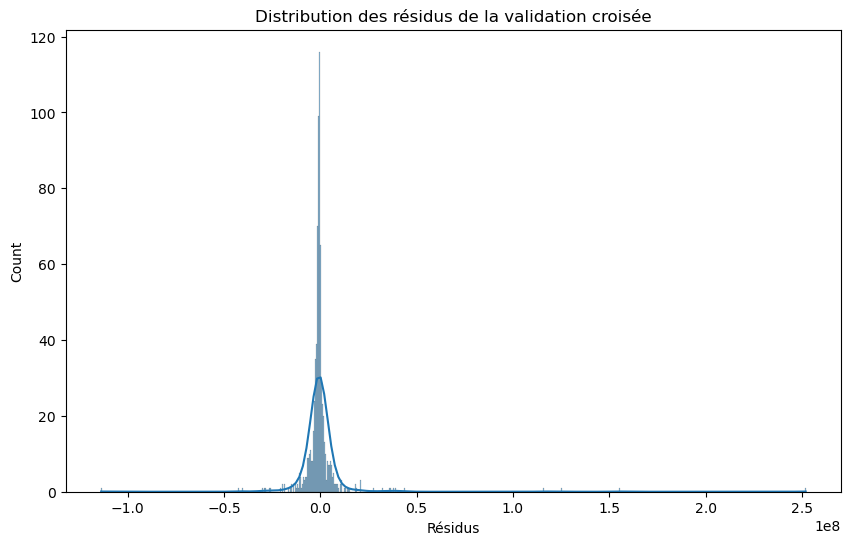

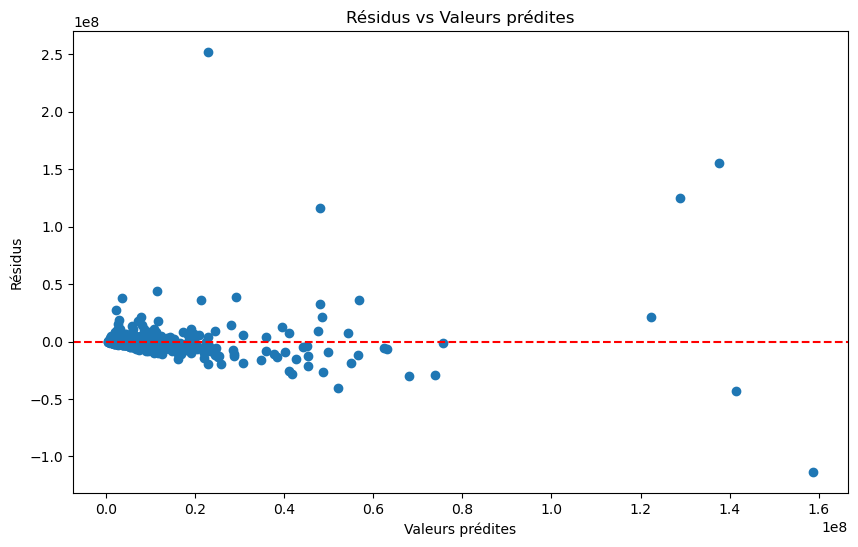

Statistiques des résidus :
Moyenne : 120419.61599558314
Écart-type : 14651611.022848573
Médiane : -510695.71485099965
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.282794e+07  2.518543e+08
170     293090784.0    1.375489e+08  1.555418e+08
124     253832464.0    1.289124e+08  1.249201e+08
3264    163945984.0    4.809044e+07  1.158555e+08
308      55073120.0    1.145770e+07  4.361542e+07
98       68090728.0    2.917499e+07  3.891574e+07
3203     41680640.0    3.642200e+06  3.803844e+07
3187     57764408.0    2.125143e+07  3.651298e+07
559      92937640.0    5.679046e+07  3.614718e+07
49       80469216.0    4.811319e+07  3.235603e+07


In [92]:
y_pred_cv = cross_val_predict(pipeline_rf_v1, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

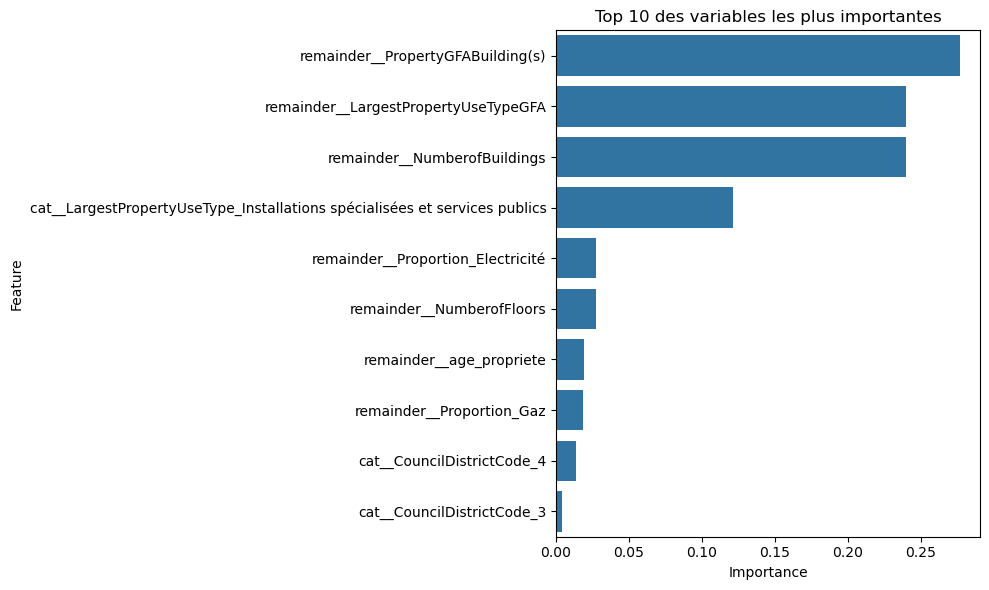

In [93]:
# Adapter le pipeline aux données d'entraînement
pipeline_rf_v1.fit(X_train, y_train)

# Extraire le modèle Random Forest du pipeline
rf_model = pipeline_rf_v1.named_steps['model']

# Récupérer les noms des colonnes après encodage
# Cette méthode retourne toutes les colonnes après le prétraitement
feature_names = pipeline_rf_v1.named_steps['preprocessing'].get_feature_names_out()

# Récupérer les importances des variables depuis le modèle RandomForest
feature_importances = rf_model.feature_importances_

# Créer un DataFrame pour associer noms des variables et importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 des variables les plus importantes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Random Forest regressor : test 2

In [94]:
col_minmax = ['age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings', 'LargestPropertyUseTypeGFA', 'NumberofFloors']  

# Colonnes catégorielles à encoder 
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

minmax_transformer = MinMaxScaler()

# Prétraitement des données explicatives (X)
preprocessing_v13 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('minmax', minmax_transformer, col_minmax),
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v2 = Pipeline([
    ('preprocessing', preprocessing_v13),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True 
    ))
])

In [95]:
pipeline_rf_v2.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'LargestPropertyUseTypeGFA',
                                                   'NumberofFloors'])])),
                ('model',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [96]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_rf_v2,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3697326.4923263146
RMSE moyen sur la validation croisée: 12988342.47438772
R² moyen sur la validation croisée: 0.5991293501558987
MAPE moyen sur la validation croisée: 0.610148825594066


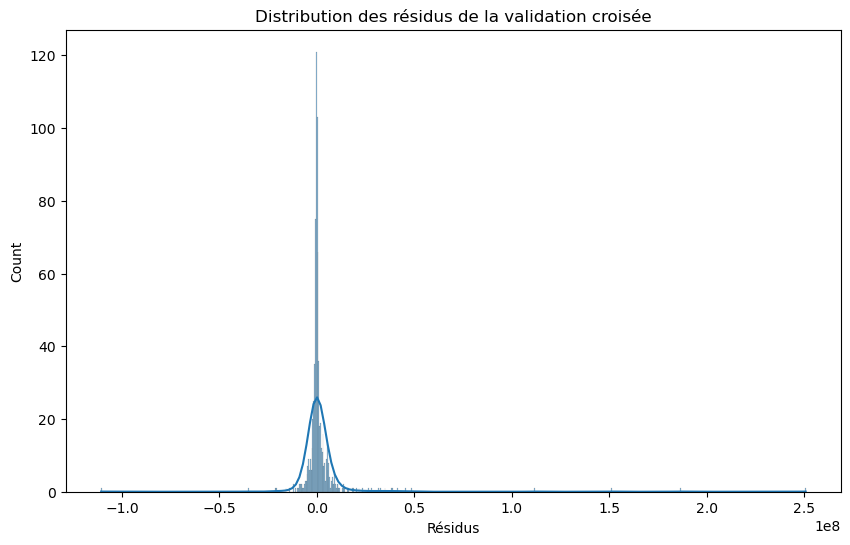

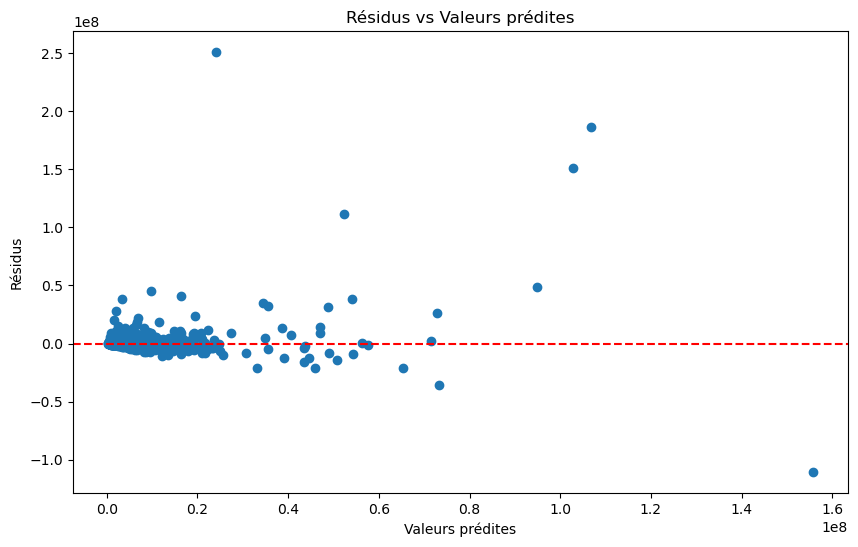

Statistiques des résidus :
Moyenne : 1582619.4362412847
Écart-type : 15065749.992955556
Médiane : -70493.17122625234
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.400036e+07  2.506818e+08
170     293090784.0    1.068179e+08  1.862729e+08
124     253832464.0    1.028340e+08  1.509984e+08
3264    163945984.0    5.226737e+07  1.116786e+08
167     143423024.0    9.476543e+07  4.865760e+07
308      55073120.0    9.690319e+06  4.538280e+07
3187     57764408.0    1.646829e+07  4.129612e+07
559      92937640.0    5.417829e+07  3.875935e+07
3203     41680640.0    3.354094e+06  3.832655e+07
231      69519808.0    3.442653e+07  3.509328e+07


In [97]:
y_pred_cv = cross_val_predict(pipeline_rf_v2, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

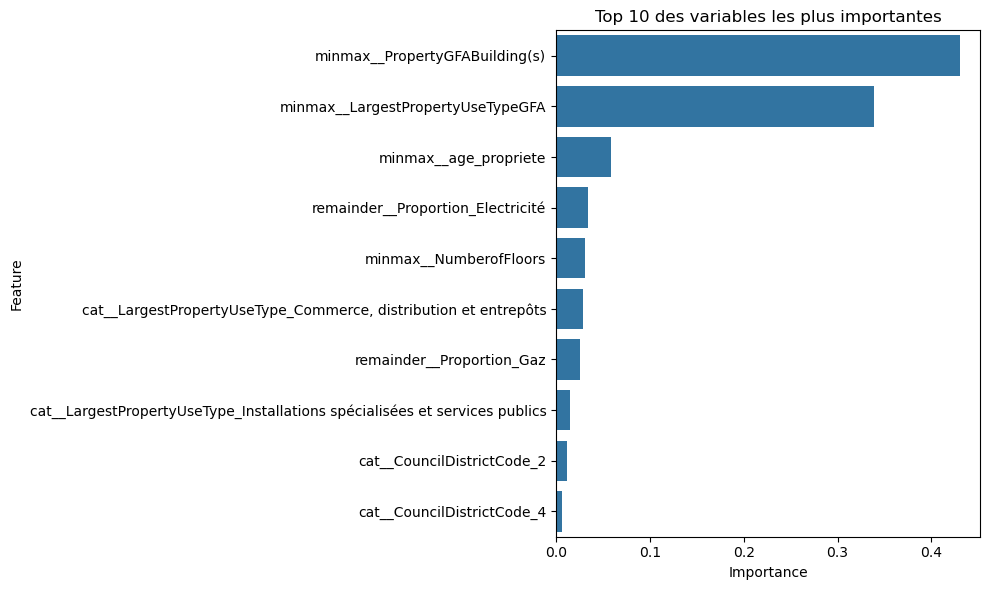

In [98]:
# Extraire le modèle RandomForest du pipeline
rf_model = pipeline_rf_v2.named_steps['model'].regressor_

# Récupérer les importances des variables depuis le modèle RandomForest
feature_importances = rf_model.feature_importances_

# Récupérer les noms des colonnes après encodage
feature_names = pipeline_rf_v2.named_steps['preprocessing'].get_feature_names_out()

# Créer un DataFrame pour associer noms des variables et importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 des variables les plus importantes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

L'application de la transformation MinMax sur les variables numériques dans pipeline_rf_v2 semble avoir eu un impact positif sur les résultats du modèle, surtout en termes de réduction des erreurs (MAE et RMSE) et d'amélioration du R².

Cela montre que l'utilisation de la normalisation peut être bénéfique lorsque les variables ont des échelles différentes, ce qui permet à l'algorithme (comme Random Forest) de mieux capter les relations sous-jacentes dans les données.

# Random Forest regressor : test 3

In [99]:
col_minmax = ['age_propriete', 'PropertyGFABuilding(s)', 'NumberofBuildings', 'LargestPropertyUseTypeGFA']  

# Colonnes catégorielles à encoder
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

minmax_transformer = MinMaxScaler()

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v10 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('minmax', minmax_transformer, col_minmax),
        ('discretize', floor_discretizer, ['NumberofFloors']),
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v3 = Pipeline([
    ('preprocessing', preprocessing_v10),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  
    ))
])

In [100]:
pipeline_rf_v3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['age_propriete',
                                                   'PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'LargestPropertyUseTypeGFA']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors'])])),
                ('model',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [101]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_rf_v3,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3672925.62639929
RMSE moyen sur la validation croisée: 12864590.245819118
R² moyen sur la validation croisée: 0.6089997984399125
MAPE moyen sur la validation croisée: 0.6128000557648667


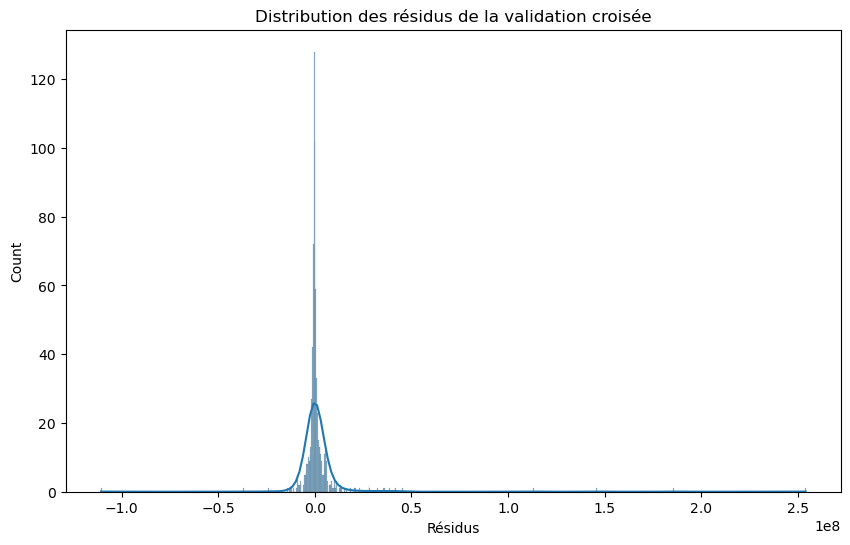

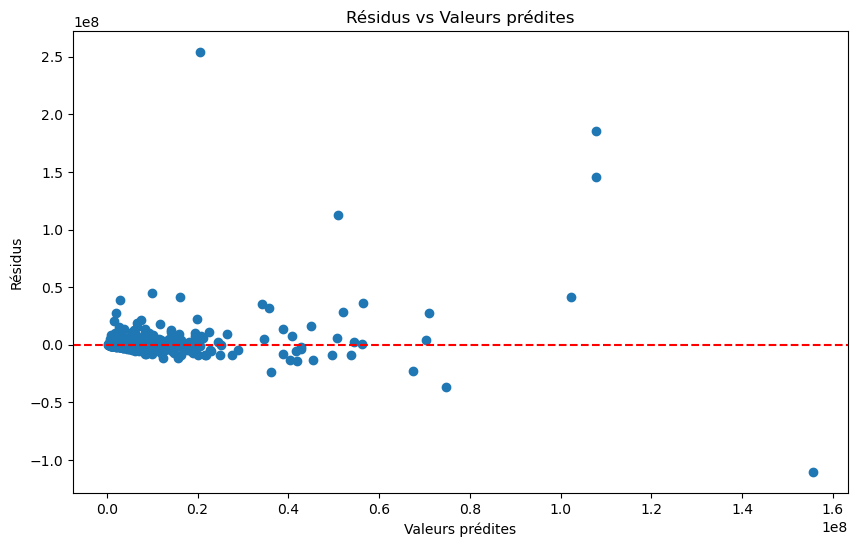

Statistiques des résidus :
Moyenne : 1587059.8483897366
Écart-type : 15032367.575849991
Médiane : -58945.52382788819
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.064327e+07  2.540389e+08
170     293090784.0    1.077151e+08  1.853757e+08
124     253832464.0    1.078278e+08  1.460046e+08
3264    163945984.0    5.087558e+07  1.130704e+08
308      55073120.0    9.939395e+06  4.513373e+07
3187     57764408.0    1.603594e+07  4.172846e+07
167     143423024.0    1.023040e+08  4.111906e+07
3203     41680640.0    2.885027e+06  3.879561e+07
559      92937640.0    5.649189e+07  3.644575e+07
231      69519808.0    3.430742e+07  3.521239e+07


In [102]:
y_pred_cv = cross_val_predict(pipeline_rf_v3, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La discrétisation de NumberofFloors a amélioré les métriques

# Random Forest regressor : test 4

In [103]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
col_minmax = ['age_propriete', 'NumberofBuildings', 'LargestPropertyUseTypeGFA']#, 'NumberofFloors']  

# Colonnes catégorielles à encoder : Spécifier les colonnes 'LargestPropertyUseType' et 'CouncilDistrictCode' à encoder
var_cat = ['CouncilDistrictCode']

Var_sans_transfo = ['Proportion_Electricité', 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

# Prétraitement des données explicatives (X)
preprocessing_v15 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('minmax', minmax_transformer, col_minmax),
            ('discretize', floor_discretizer, ['NumberofFloors']),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
            ('passthrough', 'passthrough', Var_sans_transfo)
        ],
    ))
])
# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v4 = Pipeline([
    ('preprocessing', preprocessing_v15),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  
    ))
])

In [104]:
pipeline_rf_v4.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEAB5AF20>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEAB5B7E0>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('cat',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'...
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité',
                                                                    'Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [105]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_rf_v4,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3633104.718091546
RMSE moyen sur la validation croisée: 12356791.284802282
R² moyen sur la validation croisée: 0.6397600432779029
MAPE moyen sur la validation croisée: 0.6313891740794816


=> Combinaison district et usage du batiment a amélioré les métriques

# Random Forest regressor : test 5

In [106]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

col_minmax = ['age_propriete', 'LargestPropertyUseTypeGFA']  # , 'NumberofFloors'
col_bin = ['NumberofBuildings']  
Var_sans_transfo = ['Proportion_Electricité', 'Proportion_Gaz']

minmax_transformer = MinMaxScaler()
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)
binarizer_transformer = Binarizer(threshold=1)  # Binarisation


# Prétraitement des données explicatives (X)
preprocessing_v16 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            #('bin', binarizer_transformer, col_bin),  # Binarisation sur 'NumberofBuildings'
            #('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('minmax', minmax_transformer, col_minmax),
            ('discretize', floor_discretizer, ['NumberofFloors']),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
            ('passthrough', 'passthrough', Var_sans_transfo)
        ]
    ))
])
# Pipeline avec Random Forest et transformation de la cible
pipeline_rf_v5 = Pipeline([
    ('preprocessing', preprocessing_v16),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  
    ))
])

In [107]:
pipeline_rf_v5.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEDB9F9C0>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEDB9D6C0>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('minmax',
                                                                   MinMaxScaler(),
                                                                   ['age_propriete',
                                                                    'LargestPropert...
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité',
                                                                    'Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [108]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_rf_v5,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3590607.3224314214
RMSE moyen sur la validation croisée: 12062271.179900002
R² moyen sur la validation croisée: 0.6459930041573845
MAPE moyen sur la validation croisée: 0.6405830471908519


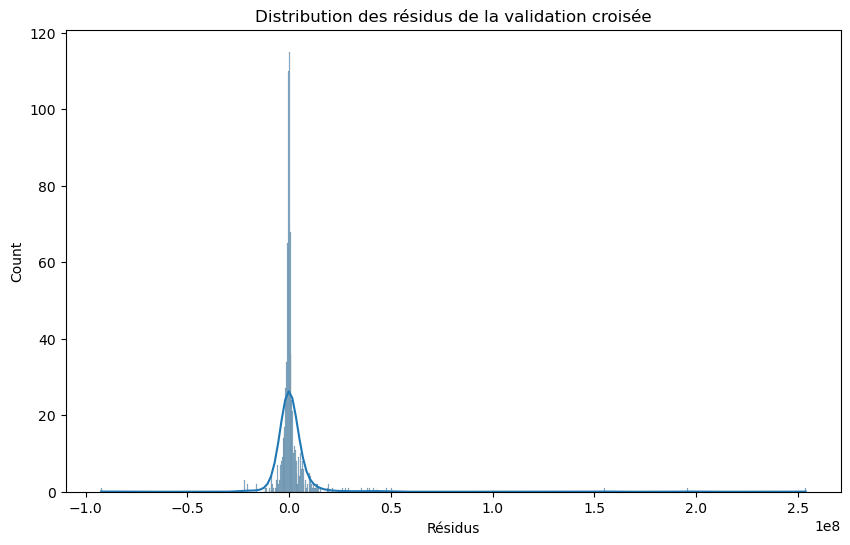

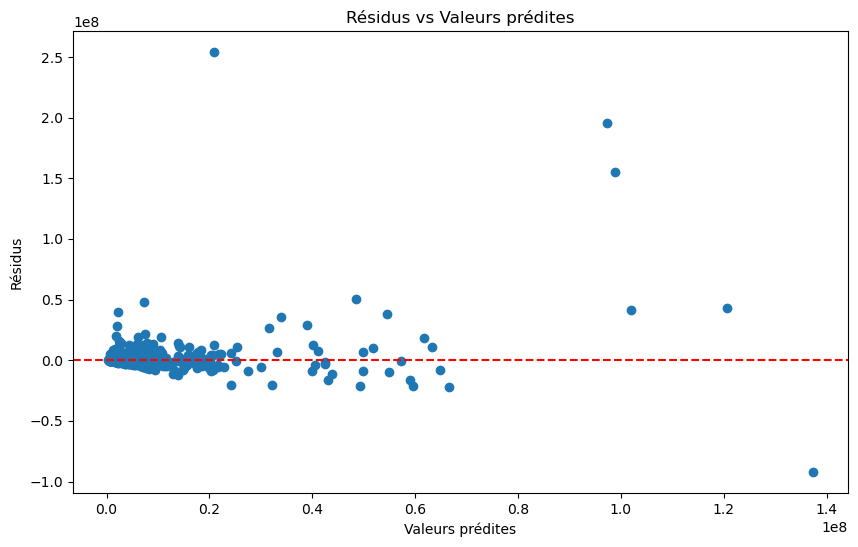

Statistiques des résidus :
Moyenne : 1496197.6942227213
Écart-type : 14691733.561247945
Médiane : -32817.83319276082
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.081288e+07  2.538693e+08
170     293090784.0    9.729543e+07  1.957954e+08
124     253832464.0    9.885814e+07  1.549743e+08
1672     98960776.0    4.844246e+07  5.051832e+07
308      55073120.0    7.307962e+06  4.776516e+07
3264    163945984.0    1.206587e+08  4.328729e+07
167     143423024.0    1.020327e+08  4.139031e+07
3203     41680640.0    2.283353e+06  3.939729e+07
559      92937640.0    5.450891e+07  3.842873e+07
231      69519808.0    3.391503e+07  3.560478e+07


In [109]:
y_pred_cv = cross_val_predict(pipeline_rf_v5, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La suppression du nombre de bâtiments a amélioré les métriques.

# XGBoost (Extreme Gradient Boosting) : test 1

XGBoost (Extreme Gradient Boosting) est une bibliothèque open-source de machine learning largement utilisée pour les tâches de régression et de classification. Elle fait partie des modèles de boosting, une technique d'ensemble learning qui combine plusieurs modèles de base, généralement des arbres de décision, pour améliorer les performances prédictives.

Boosting : Contrairement aux méthodes comme le bagging (par exemple, Random Forest), qui créent plusieurs modèles indépendants, le boosting construit des modèles de manière séquentielle. Chaque modèle est ajusté pour corriger les erreurs du précédent. XGBoost suit cette approche en utilisant des arbres de décision comme modèles de base, ce qui lui permet d'améliorer la précision globale de la prédiction.

Efficacité : XGBoost est conçu pour être rapide et efficace, en particulier lorsqu'il est utilisé avec de grands ensembles de données. Il optimise les calculs pour réduire le temps d'exécution tout en maximisant la précision des prédictions.

Contrôle de la complexité du modèle : XGBoost offre de nombreux hyperparamètres permettant de réguler la complexité du modèle, comme la profondeur maximale des arbres ou le taux d'apprentissage. Ces réglages permettent d'éviter le surapprentissage (overfitting) tout en augmentant la capacité du modèle à généraliser.

Gestion des données manquantes : XGBoost gère de manière efficace les données manquantes en imputant automatiquement des valeurs manquantes lors de l'entraînement, ce qui simplifie le pré-traitement des données.

Polyvalence : XGBoost peut traiter des données numériques et catégorielles, et il est compatible avec des données de grande dimension, ce qui le rend adaptable à diverses applications en machine learning.

En résumé, XGBoost est un modèle de boosting puissant, efficace et flexible, qui excelle dans les prédictions complexes tout en offrant un large éventail de réglages pour optimiser les performances.

In [110]:
# Le pipeline avec XGBoost
pipeline_xgb_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  
    ('model', xgb.XGBRegressor(random_state=42))  # XGBoost pour régression
])

In [111]:
pipeline_xgb_v1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsamp...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [112]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_xgb_v1,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4673987.971906289
RMSE moyen sur la validation croisée: 15947521.003764506
R² moyen sur la validation croisée: 0.2924233880319188
MAPE moyen sur la validation croisée: 0.9173935454148623


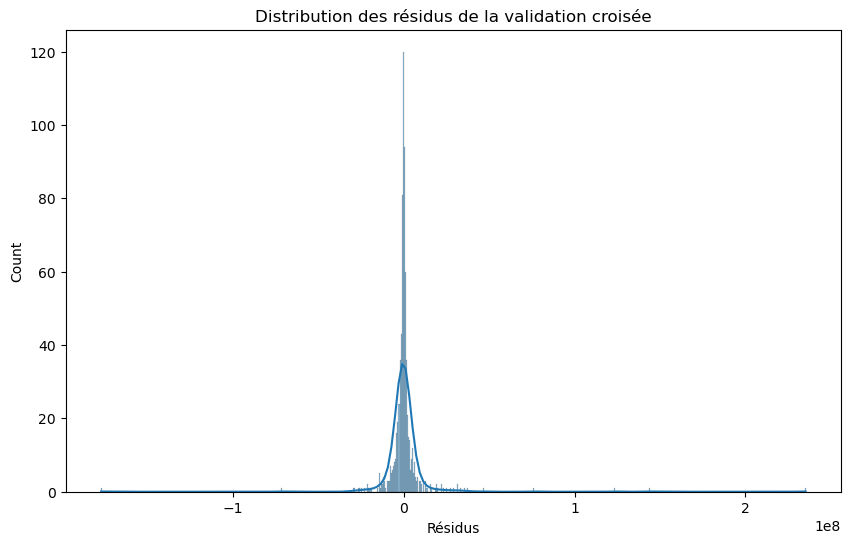

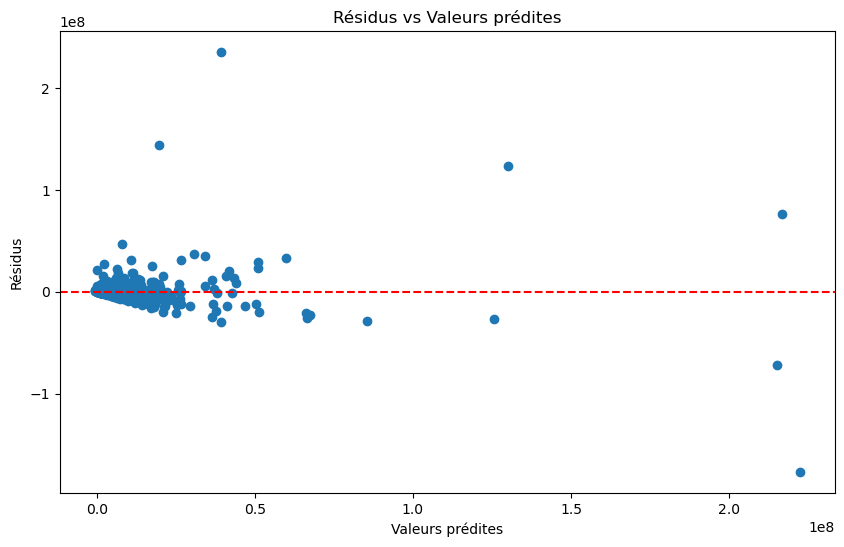

Statistiques des résidus :
Moyenne : 271282.0403388732
Écart-type : 14807715.324998187
Médiane : -344243.5
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite       Résidu
558     274682208.0      39347760.0  235334448.0
3264    163945984.0      19741654.0  144204330.0
124     253832464.0     130217552.0  123614912.0
170     293090784.0     216764048.0   76326736.0
308      55073120.0       8017189.0   47055931.0
98       68090728.0      30632270.0   37458458.0
231      69519808.0      34079804.0   35440004.0
559      92937640.0      59845864.0   33091776.0
3187     57764408.0      26545546.0   31218862.0
3203     41680640.0      10669168.0   31011472.0


In [113]:
y_pred_cv = cross_val_predict(pipeline_xgb_v1, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

# XGBoost (Extreme Gradient Boosting) : test 2

In [114]:
# Créer le transformateur Log pour la cible
log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

# Pipeline avec XGBoost et transformation logarithmique de la cible
pipeline_xgb_v2 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  # Vérifie que l'inverse est cohérent
    ))
])

In [115]:
pipeline_xgb_v2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode'])])),
                ('model',
                 TransformedTargetRegressor(regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylev...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [116]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_xgb_v2,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3961007.4983466067
RMSE moyen sur la validation croisée: 13448461.278160313
R² moyen sur la validation croisée: 0.5613083691726034
MAPE moyen sur la validation croisée: 0.6556050589451645


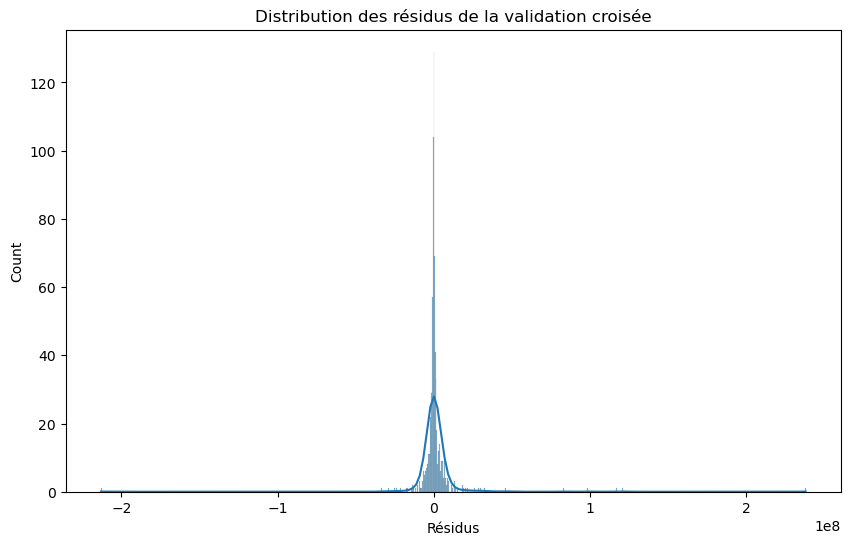

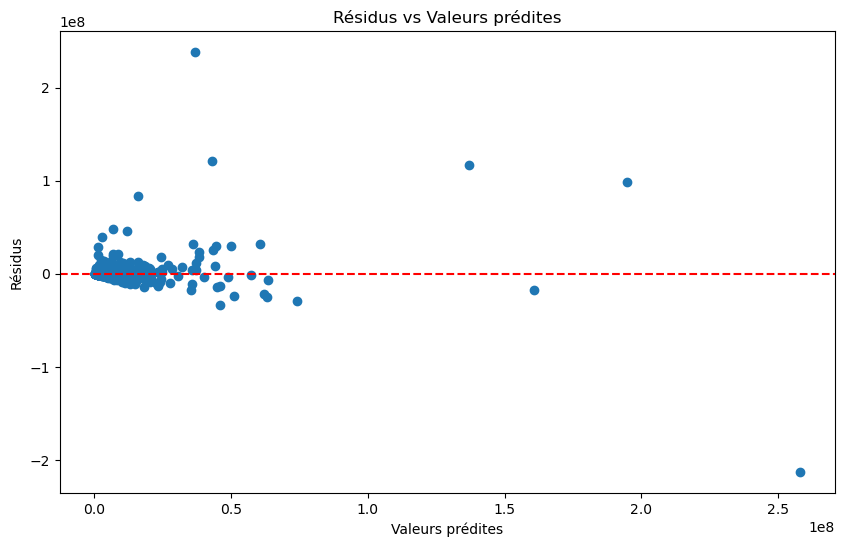

Statistiques des résidus :
Moyenne : 1112709.3035764315
Écart-type : 15173635.136816014
Médiane : -42014.5
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    3.677848e+07  2.379037e+08
3264    163945984.0    4.302588e+07  1.209201e+08
124     253832464.0    1.370720e+08  1.167604e+08
170     293090784.0    1.948502e+08  9.824054e+07
1672     98960776.0    1.578724e+07  8.317353e+07
308      55073120.0    6.929788e+06  4.814333e+07
3187     57764408.0    1.199025e+07  4.577416e+07
3203     41680640.0    2.629282e+06  3.905136e+07
559      92937640.0    6.042365e+07  3.251399e+07
98       68090728.0    3.607462e+07  3.201611e+07


In [117]:
y_pred_cv = cross_val_predict(pipeline_xgb_v2, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> L'application du Log sur la cible a amélioré les métriques

# XGBoost (Extreme Gradient Boosting) : test 3

In [118]:
# Colonnes catégorielles à encoder 
var_categorielle = ['LargestPropertyUseType']

# Prétraitement des données explicatives (X)
preprocessing_v13 = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['CouncilDistrictCode']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)
# Créer le transformateur Log pour la cible
log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

# Pipeline avec XGBoost et transformation logarithmique de la cible
pipeline_xgb_v3 = Pipeline([
    ('preprocessing', preprocessing_v13),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  
    ))
])

In [119]:
pipeline_xgb_v3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['CouncilDistrictCode']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType'])])),
                ('model',
                 TransformedTargetRegressor(regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=No...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [120]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_xgb_v3,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4057708.461903455
RMSE moyen sur la validation croisée: 14699967.29329888
R² moyen sur la validation croisée: 0.4514381264104775
MAPE moyen sur la validation croisée: 0.6613030731296987


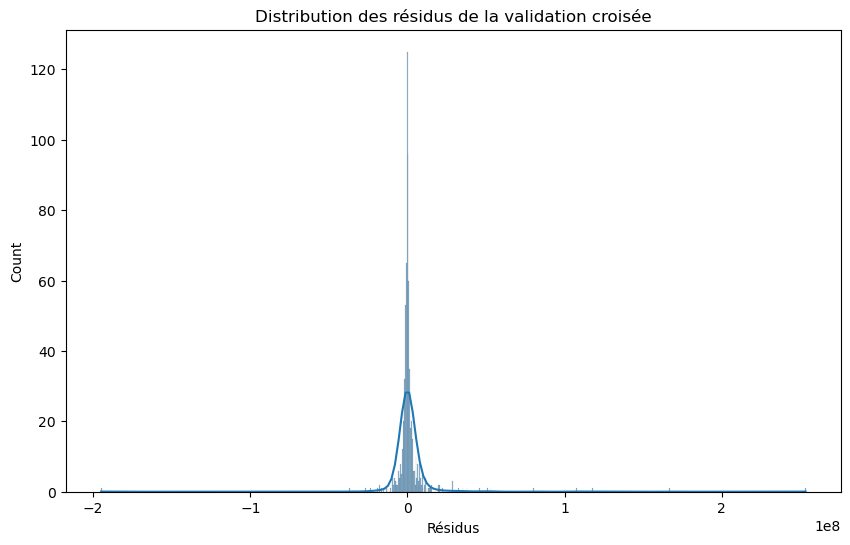

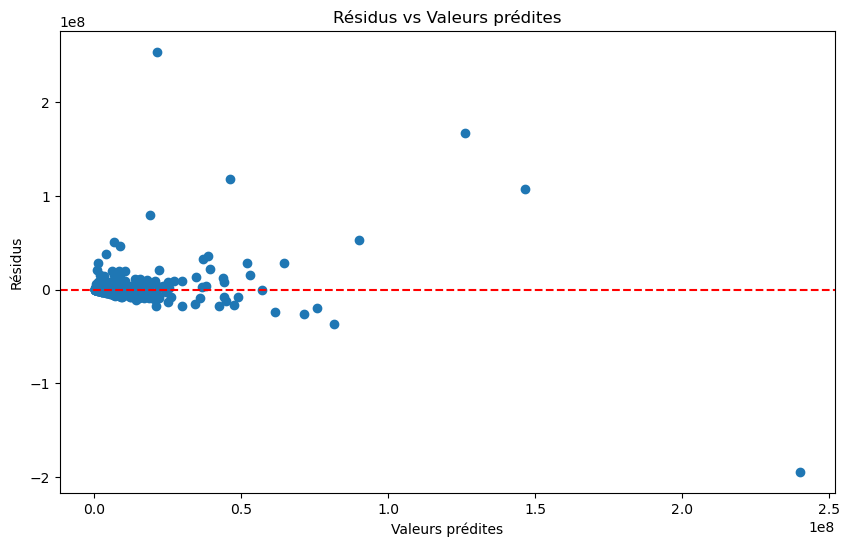

Statistiques des résidus :
Moyenne : 1358398.7922165778
Écart-type : 15904927.437817538
Médiane : -3187.75
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.122786e+07  2.534544e+08
170     293090784.0    1.262567e+08  1.668341e+08
3264    163945984.0    4.629653e+07  1.176495e+08
124     253832464.0    1.464771e+08  1.073554e+08
1672     98960776.0    1.893790e+07  8.002288e+07
167     143423024.0    9.003818e+07  5.338484e+07
3187     57764408.0    6.664230e+06  5.110018e+07
308      55073120.0    8.858146e+06  4.621497e+07
3203     41680640.0    3.962605e+06  3.771804e+07
477      74130576.0    3.865262e+07  3.547795e+07


In [121]:
y_pred_cv = cross_val_predict(pipeline_xgb_v3, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=>La suppression du district a détérioré les métriques

# XGBoost (Extreme Gradient Boosting) : test 4

In [122]:
# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
# Colonnes catégorielles à encoder 
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

# Prétraitement des données explicatives (X)
preprocessing_v11 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)
# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v4 = Pipeline([
    ('preprocessing', preprocessing_v11),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True  
    ))
])

In [123]:
# Ajuster le transformeur sur les données
preprocessing_v11.fit(X_train)

print(preprocessing_v11.get_feature_names_out())

['cat__LargestPropertyUseType_Commerce, distribution et entrepôts'
 'cat__LargestPropertyUseType_Hôtellerie et lieux de culte'
 'cat__LargestPropertyUseType_Installations spécialisées et services publics'
 'cat__CouncilDistrictCode_2' 'cat__CouncilDistrictCode_3'
 'cat__CouncilDistrictCode_4' 'cat__CouncilDistrictCode_5'
 'cat__CouncilDistrictCode_6' 'cat__CouncilDistrictCode_7'
 'discretize__NumberofFloors' 'remainder__age_propriete'
 'remainder__Proportion_Electricité' 'remainder__Proportion_Gaz'
 'remainder__NumberofBuildings' 'remainder__PropertyGFABuilding(s)'
 'remainder__LargestPropertyUseTypeGFA']


In [124]:
pipeline_xgb_v4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors'])])),
                ('model',
                 TransformedTargetRegressor(regr...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [125]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_xgb_v4,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 3954203.1689720317
RMSE moyen sur la validation croisée: 12947256.53959674
R² moyen sur la validation croisée: 0.5868265786040656
MAPE moyen sur la validation croisée: 0.6535891147181829


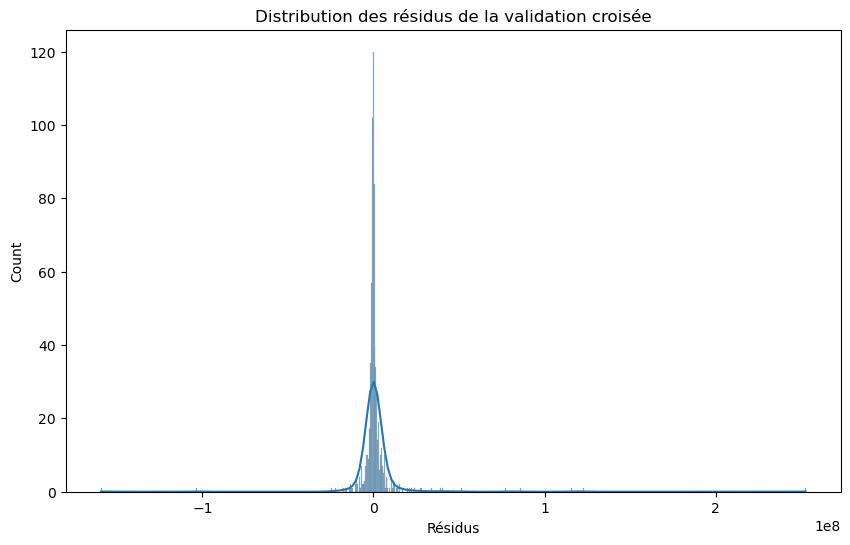

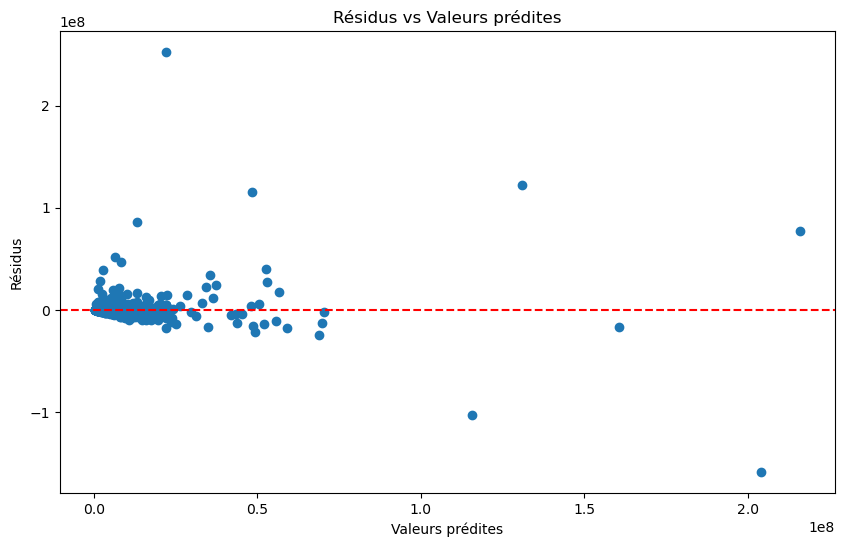

Statistiques des résidus :
Moyenne : 1127289.2788593876
Écart-type : 14851311.887862528
Médiane : 5837.8125
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.216693e+07  2.525153e+08
124     253832464.0    1.310423e+08  1.227902e+08
3264    163945984.0    4.826627e+07  1.156797e+08
1672     98960776.0    1.313558e+07  8.582520e+07
170     293090784.0    2.158759e+08  7.721491e+07
3187     57764408.0    6.384610e+06  5.137980e+07
308      55073120.0    8.360379e+06  4.671274e+07
559      92937640.0    5.264136e+07  4.029628e+07
3203     41680640.0    2.773656e+06  3.890698e+07
231      69519808.0    3.532563e+07  3.419418e+07


In [126]:
y_pred_cv = cross_val_predict(pipeline_xgb_v4, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La discrétisation du nombre d'étages a amélioré les métriques

# XGBoost (Extreme Gradient Boosting) : test 5

In [127]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

# Transformations personnalisées
bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Colonnes catégorielles à encoder 
var_categorielle = ['CouncilDistrictCode']#'LargestPropertyUseType', 


# Pipeline de prétraitement
preprocessing_v12 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('drop', 'drop', ['LargestPropertyUseType', 'PropertyGFABuilding(s)']),
            ('discretize', floor_discretizer, ['NumberofFloors']),  # Découpe en classes sur 'NumberofFloors'
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
        ],
        remainder='passthrough',
        force_int_remainder_cols=False
    ))
])

# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v5 = Pipeline([
    ('preprocessing', preprocessing_v12),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [128]:
pipeline_xgb_v5

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEE1F7E20>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEE1F7560>)),
                                 ('transformations',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [129]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_xgb_v5,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4286660.650933757
RMSE moyen sur la validation croisée: 15706122.77869386
R² moyen sur la validation croisée: 0.3531108367964954
MAPE moyen sur la validation croisée: 0.6899141798120039


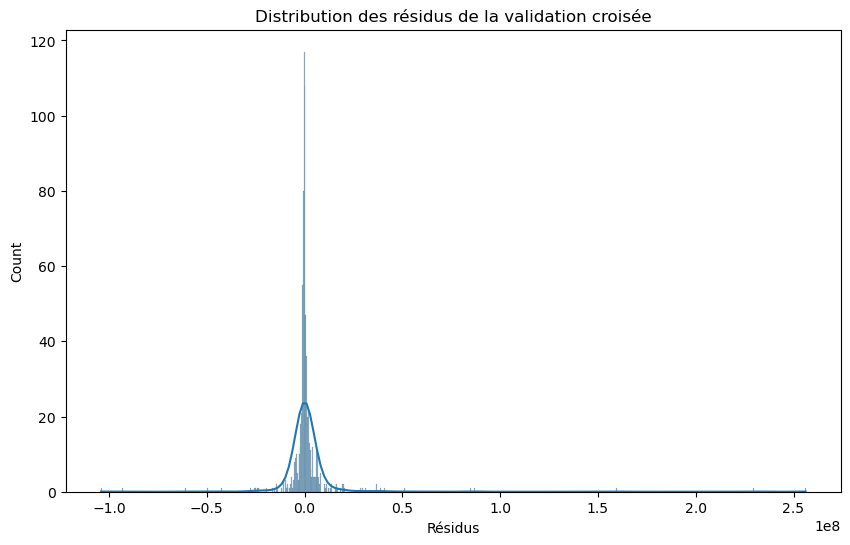

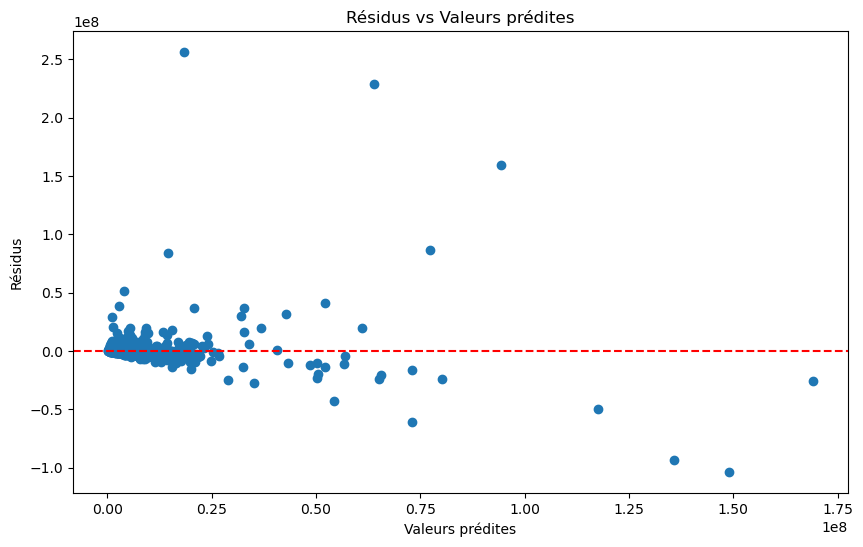

Statistiques des résidus :
Moyenne : 1133045.9149695742
Écart-type : 16825312.871820893
Médiane : -29050.25
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0     18480580.00  2.562016e+08
170     293090784.0     63826056.00  2.292647e+08
124     253832464.0     94372888.00  1.594596e+08
3264    163945984.0     77281696.00  8.666429e+07
1672     98960776.0     14545359.00  8.441542e+07
308      55073120.0      3966968.25  5.110615e+07
559      92937640.0     52227816.00  4.070982e+07
3203     41680640.0      2812357.50  3.886828e+07
3187     57764408.0     20703508.00  3.706090e+07
231      69519808.0     32691376.00  3.682843e+07


In [130]:
y_pred_cv = cross_val_predict(pipeline_xgb_v5, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La combinaison de la taille et de l'usage principal du bâtiment a détérioré les métriques.

# XGBoost (Extreme Gradient Boosting) : test 6

In [131]:
# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Colonnes catégorielles à encoder 
var_categorielle = ['CouncilDistrictCode', 'LargestPropertyUseType']#'LargestPropertyUseType', 

# Pipeline de prétraitement
preprocessing_v18 = ColumnTransformer(
        transformers=[
            ('drop', 'drop', ['LargestPropertyUseTypeGFA', 'Proportion_Electricité']),#'age_propriete',
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
            ('discretize', floor_discretizer, ['NumberofFloors'])  # Découpe en classes sur 'NumberofFloors'
        ],
        remainder='passthrough',
        force_int_remainder_cols=False
    )

# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v6 = Pipeline([
    ('preprocessing', preprocessing_v18),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True
    ))
])

In [132]:
# Ajuster le transformeur sur les données
preprocessing_v18.fit(X_train)

print(preprocessing_v18.get_feature_names_out())

['cat__CouncilDistrictCode_2' 'cat__CouncilDistrictCode_3'
 'cat__CouncilDistrictCode_4' 'cat__CouncilDistrictCode_5'
 'cat__CouncilDistrictCode_6' 'cat__CouncilDistrictCode_7'
 'cat__LargestPropertyUseType_Commerce, distribution et entrepôts'
 'cat__LargestPropertyUseType_Hôtellerie et lieux de culte'
 'cat__LargestPropertyUseType_Installations spécialisées et services publics'
 'discretize__NumberofFloors' 'remainder__age_propriete'
 'remainder__Proportion_Gaz' 'remainder__NumberofBuildings'
 'remainder__PropertyGFABuilding(s)']


In [133]:
pipeline_xgb_v6.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['LargestPropertyUseTypeGFA',
                                                   'Proportion_Electricité']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode',
                                                   'LargestPropertyUseType']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [134]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_xgb_v6,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4065932.1763365394
RMSE moyen sur la validation croisée: 12587009.109056301
R² moyen sur la validation croisée: 0.6258683594449457
MAPE moyen sur la validation croisée: 0.664639431496023


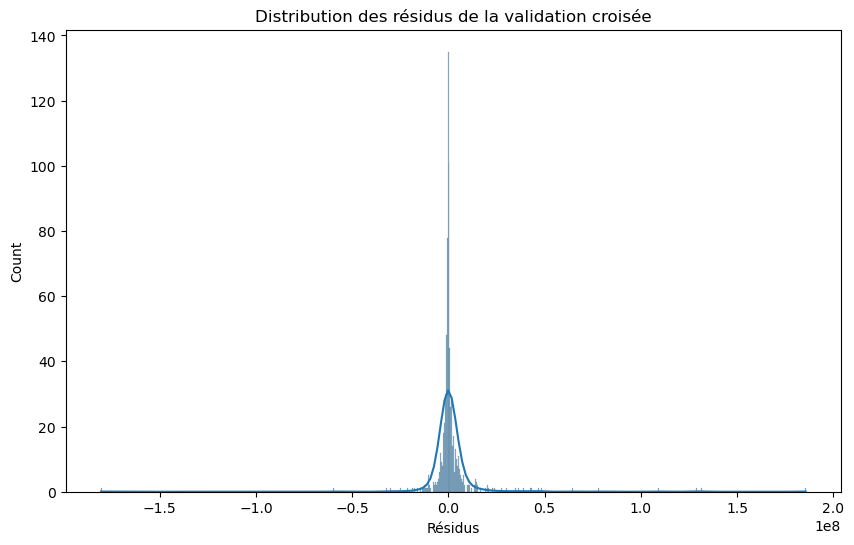

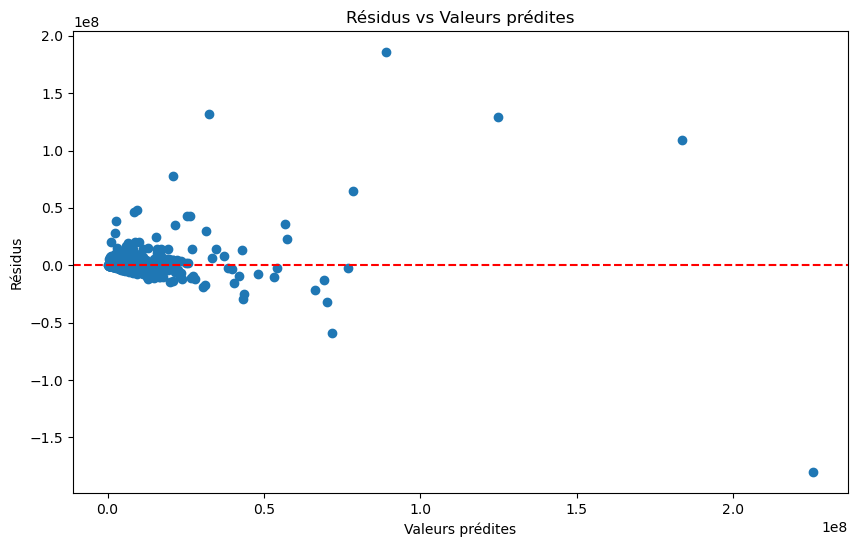

Statistiques des résidus :
Moyenne : 1262970.4263710387
Écart-type : 14417328.761340115
Médiane : -44062.28120000003
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite       Résidu
558     274682208.0      89000408.0  185681800.0
3264    163945984.0      32295904.0  131650080.0
124     253832464.0     124824328.0  129008136.0
170     293090784.0     183737456.0  109353328.0
1672     98960776.0      20817348.0   78143428.0
167     143423024.0      78509488.0   64913536.0
3187     57764408.0       9432550.0   48331858.0
308      55073120.0       8339380.5   46733739.5
231      69519808.0      26228456.0   43291352.0
98       68090728.0      25333880.0   42756848.0


In [135]:
y_pred_cv = cross_val_predict(pipeline_xgb_v6, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La suppression des variables de la taille de l'usage principal du bâtiment et de la proportion d'électricité a amélioré les métriques.

# XGBoost (Extreme Gradient Boosting) : test 7

In [136]:
# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_district_combined(X):
    X = X.copy()
    X['Usage_district_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['CouncilDistrictCode'].astype(str)
    return X

# Transformations personnalisées
usage_district_transformer = FunctionTransformer(create_usage_district_combined, validate=False)


# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Colonnes catégorielles à encoder 
var_categorielle = ['CouncilDistrictCode', 'LargestPropertyUseType']#'LargestPropertyUseType', 

# Pipeline de prétraitement
preprocessing_v19 =  Pipeline(steps=[
    ('combine_usage_district', usage_district_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_district_Combiné']),
            ('drop', 'drop', ['LargestPropertyUseTypeGFA', 'Proportion_Electricité', 'CouncilDistrictCode', 'LargestPropertyUseType', ]),#'age_propriete',
            #('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
            ('discretize', floor_discretizer, ['NumberofFloors'])  # Découpe en classes sur 'NumberofFloors'
        ],
        remainder='passthrough',
        force_int_remainder_cols=False
    ))])

# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v7 = Pipeline([
    ('preprocessing', preprocessing_v19),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True
    ))
])

In [137]:
pipeline_xgb_v7

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('combine_usage_district',
                                  FunctionTransformer(func=<function create_usage_district_combined at 0x0000025DEAF79F80>)),
                                 ('transformations',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usag...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [138]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_xgb_v7,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4237405.952400829
RMSE moyen sur la validation croisée: 14761634.083207935
R² moyen sur la validation croisée: 0.5013292841428312
MAPE moyen sur la validation croisée: 0.6793027278353695


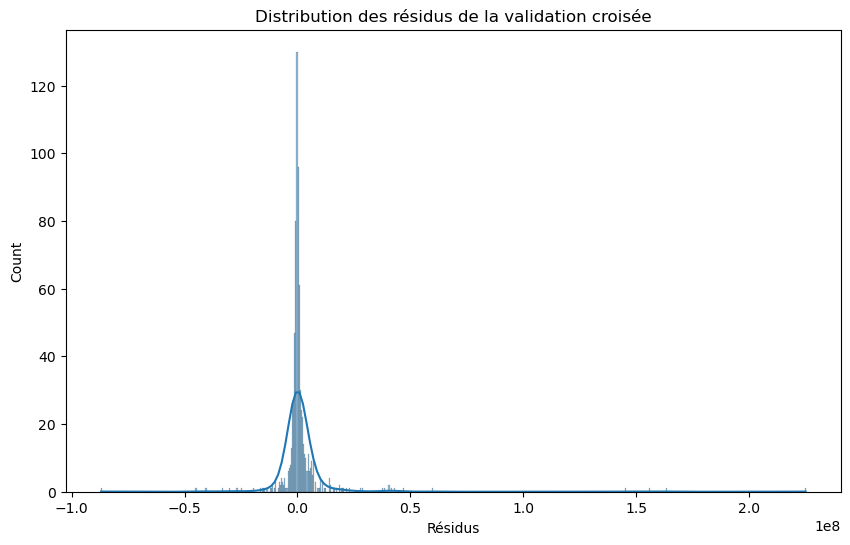

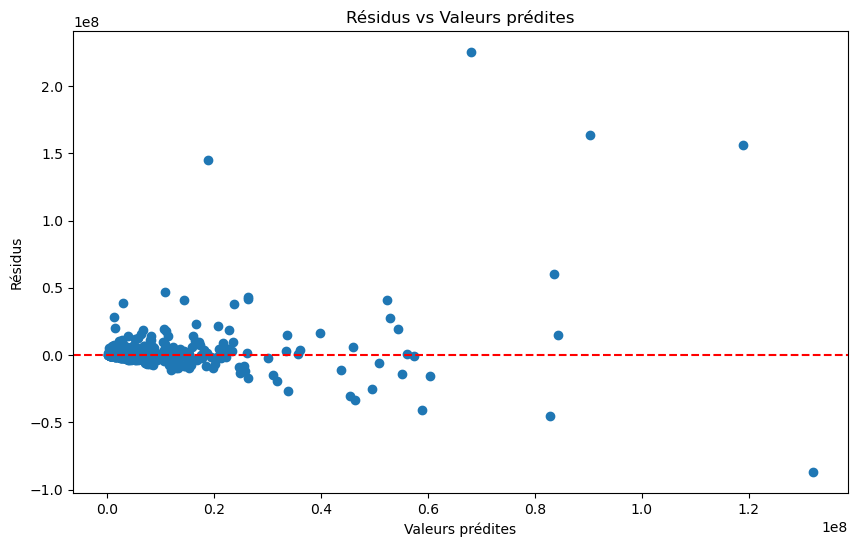

Statistiques des résidus :
Moyenne : 1539936.3770409785
Écart-type : 14852879.246804193
Médiane : -17428.75
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite       Résidu
170     293090784.0      68064664.0  225026120.0
124     253832464.0      90354728.0  163477736.0
558     274682208.0     118823208.0  155859000.0
3264    163945984.0      18974704.0  144971280.0
167     143423024.0      83491336.0   59931688.0
3187     57764408.0      10893513.0   46870895.0
231      69519808.0      26278080.0   43241728.0
98       68090728.0      26460148.0   41630580.0
308      55073120.0      14399391.0   40673729.0
559      92937640.0      52288916.0   40648724.0


In [139]:
y_pred_cv = cross_val_predict(pipeline_xgb_v7, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La combinaison de l'usage principal du bâtiment et du district a détérioré les métriques.

# SVR (Support Vector Regression): test 1

Dans cette section, nous allons explorer l'utilisation de Support Vector Regression (SVR) pour modéliser les relations complexes et non linéaires entre les variables de notre jeu de données. SVR, une extension de l'algorithme SVM (Support Vector Machine), est particulièrement adapté lorsqu'il existe des modèles non linéaires sous-jacents dans les données, tout en étant capable de gérer des erreurs et des variations au sein des données d'entrée.

L'un des avantages clés de SVR est sa capacité à trouver un compromis entre la précision du modèle et la tolérance aux erreurs, en contrôlant la largeur de la marge d'erreur autorisée via des hyperparamètres comme C et epsilon. Cela permet à SVR d'obtenir des prédictions robustes même en présence de données bruitées ou de relations complexes, tout en maintenant un bon pouvoir de généralisation.

Dans le cadre de notre analyse, l'application de SVR sera particulièrement utile. Nous allons appliquer cette méthode à notre modèle afin d'évaluer son efficacité par rapport à d'autres techniques de régression.

In [140]:
# Le pipeline avec XGBoost
pipeline_svr_v1 = Pipeline([
    ('preprocessing', preprocessing_v1),  
    ('model', SVR())  
])

In [141]:
pipeline_svr_v1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode'])])),
                ('model', SVR())])

In [142]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_svr_v1,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 6994215.414136371
RMSE moyen sur la validation croisée: 21140169.8792186
R² moyen sur la validation croisée: -0.08198633047178543
MAPE moyen sur la validation croisée: 1.320081374481886


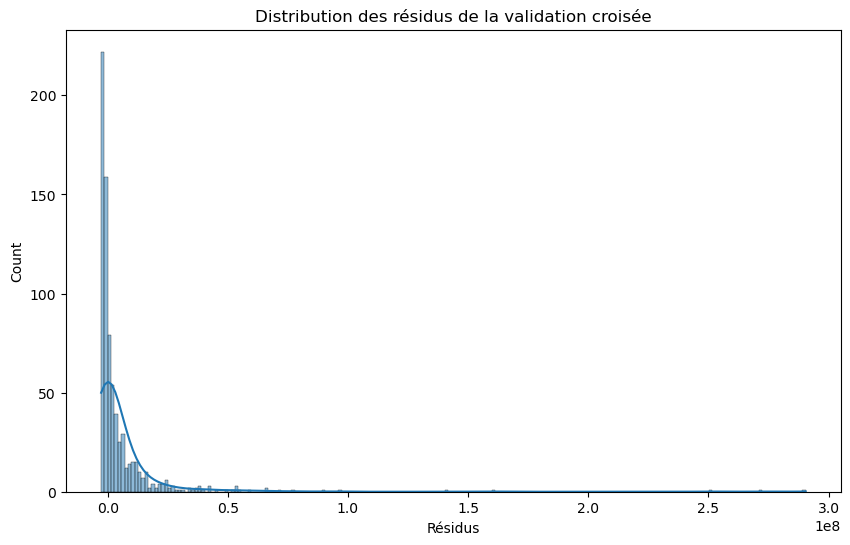

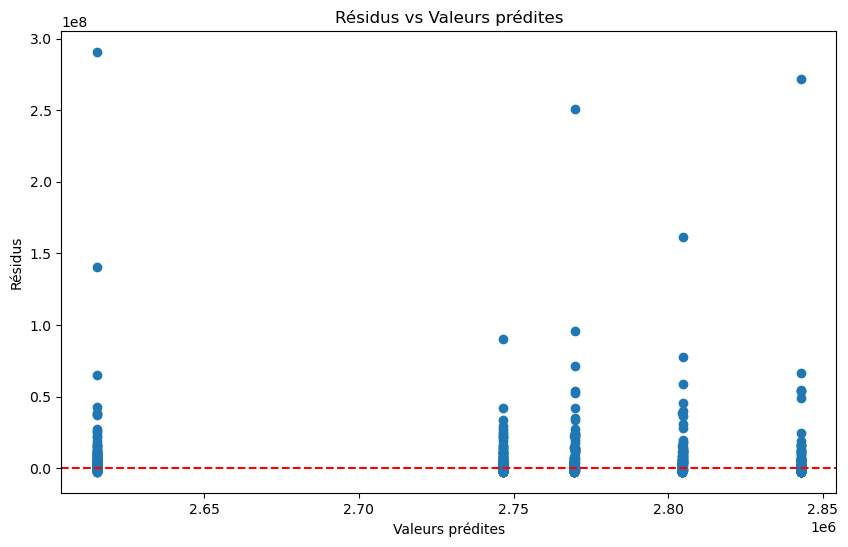

Statistiques des résidus :
Moyenne : 5572187.021599732
Écart-type : 21683108.999385156
Médiane : -13870.85047941329
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
170     293090784.0    2.615325e+06  2.904755e+08
558     274682208.0    2.842945e+06  2.718393e+08
124     253832464.0    2.769703e+06  2.510628e+08
3264    163945984.0    2.804615e+06  1.611414e+08
167     143423024.0    2.615340e+06  1.408077e+08
1672     98960776.0    2.769732e+06  9.619104e+07
559      92937640.0    2.746592e+06  9.019105e+07
49       80469216.0    2.804618e+06  7.766460e+07
477      74130576.0    2.769699e+06  7.136088e+07
231      69519808.0    2.842916e+06  6.667689e+07


In [143]:
y_pred_cv = cross_val_predict(pipeline_svr_v1, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

# SVR (Support Vector Regression): test 2

In [144]:
# Créer le transformateur Log pour la cible
log_transformer_y = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v2 = Pipeline([
    ('preprocessing', preprocessing_v1),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [145]:
pipeline_svr_v2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode'])])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [146]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_svr_v2,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4295326.668132779
RMSE moyen sur la validation croisée: 16253225.368656343
R² moyen sur la validation croisée: 0.4000627388733734
MAPE moyen sur la validation croisée: 0.7557097364409231


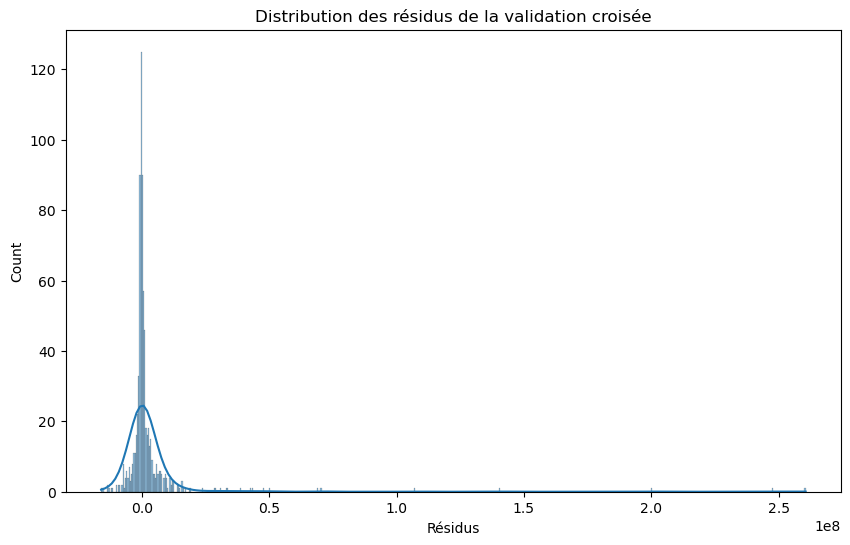

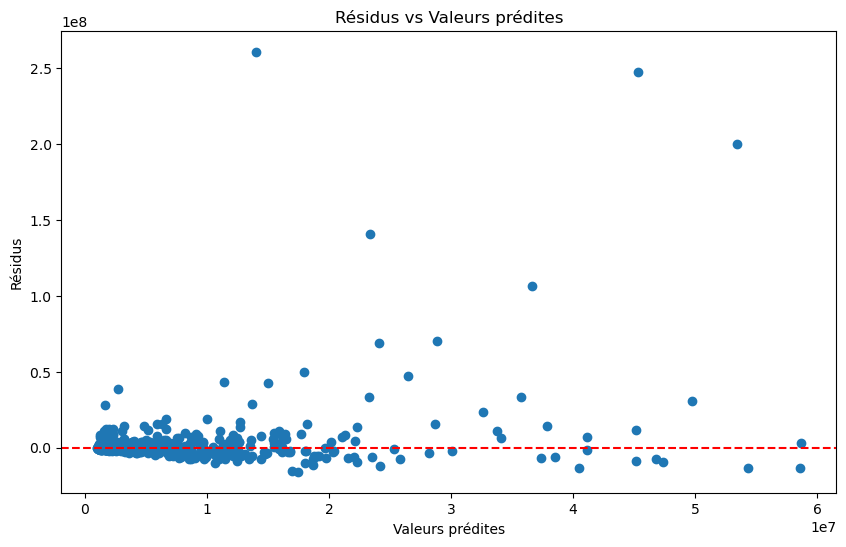

Statistiques des résidus :
Moyenne : 2502824.229740921
Écart-type : 17628520.871490076
Médiane : -12604.559036763385
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    1.405997e+07  2.606222e+08
170     293090784.0    4.531458e+07  2.477762e+08
124     253832464.0    5.344966e+07  2.003828e+08
3264    163945984.0    2.334916e+07  1.405968e+08
167     143423024.0    3.666256e+07  1.067605e+08
1672     98960776.0    2.884770e+07  7.011307e+07
559      92937640.0    2.406935e+07  6.886829e+07
98       68090728.0    1.797649e+07  5.011423e+07
477      74130576.0    2.651439e+07  4.761619e+07
308      55073120.0    1.136504e+07  4.370808e+07


In [147]:
y_pred_cv = cross_val_predict(pipeline_svr_v2, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> L'utilisation du log sur la cible a amélioré les métriques

# SVR (Support Vector Regression): test 3

In [148]:
var_categorielle = ['CouncilDistrictCode', 'LargestPropertyUseType']

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v13 = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['PropertyGFABuilding(s)']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v3 = Pipeline([
    ('preprocessing', preprocessing_v13),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=True
    ))
])

In [149]:
pipeline_svr_v3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['PropertyGFABuilding(s)']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode',
                                                   'LargestPropertyUseType'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [150]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_svr_v3,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4210815.889880823
RMSE moyen sur la validation croisée: 15999480.16974144
R² moyen sur la validation croisée: 0.42580546774632755
MAPE moyen sur la validation croisée: 0.7878026632500648


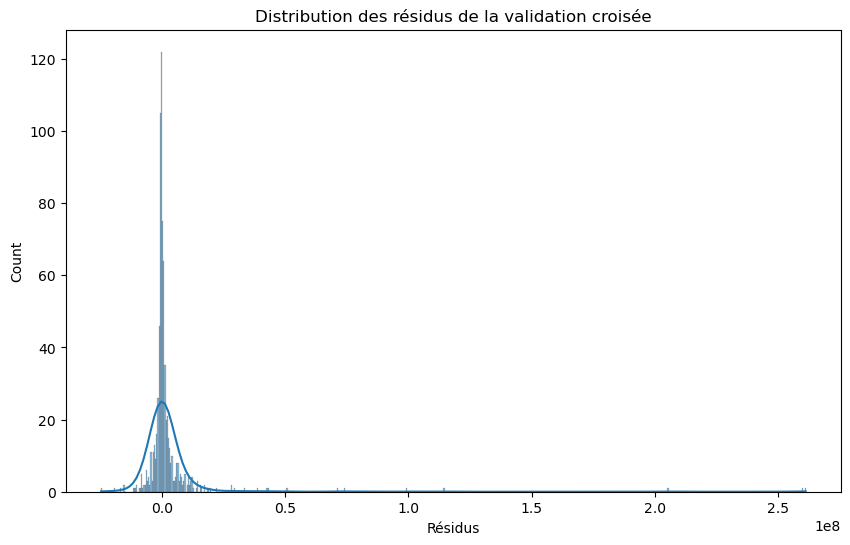

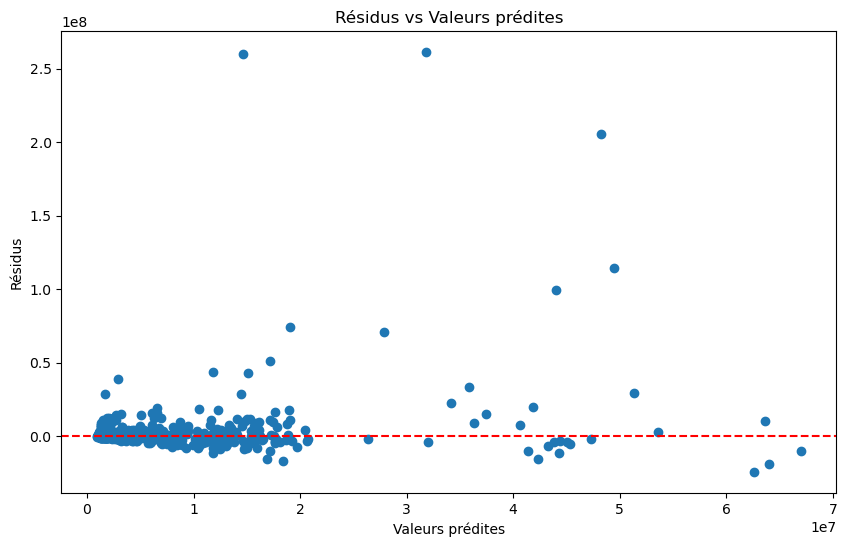

Statistiques des résidus :
Moyenne : 2369227.195417219
Écart-type : 17598401.79573135
Médiane : 37232.09601842519
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
170     293090784.0    3.185069e+07  2.612401e+08
558     274682208.0    1.461156e+07  2.600706e+08
124     253832464.0    4.827948e+07  2.055530e+08
3264    163945984.0    4.949990e+07  1.144461e+08
167     143423024.0    4.396807e+07  9.945495e+07
559      92937640.0    1.903273e+07  7.390491e+07
1672     98960776.0    2.788446e+07  7.107632e+07
98       68090728.0    1.719787e+07  5.089286e+07
308      55073120.0    1.178709e+07  4.328603e+07
3187     57764408.0    1.506538e+07  4.269902e+07


In [151]:
y_pred_cv = cross_val_predict(pipeline_svr_v3, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La suppression de la taille du bâtiment a amélioré les métriques

# SVR (Support Vector Regression): test 4

In [152]:
# Colonnes catégorielles à encoder 
var_categorielle = ['LargestPropertyUseType', 'CouncilDistrictCode']

# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Prétraitement des données explicatives (X)
preprocessing_v14 = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['PropertyGFABuilding(s)']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
        ('discretize', floor_discretizer, ['NumberofFloors']),
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v4 = Pipeline([
    ('preprocessing', preprocessing_v14),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=True  # Désactiver la vérification stricte
    ))
])

In [153]:
pipeline_svr_v4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['PropertyGFABuilding(s)']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['LargestPropertyUseType',
                                                   'CouncilDistrictCode']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=3),
                                                  ['NumberofFloors'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [154]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_svr_v4,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4210811.430322466
RMSE moyen sur la validation croisée: 15999383.90260548
R² moyen sur la validation croisée: 0.42581299478593787
MAPE moyen sur la validation croisée: 0.7878316456972716


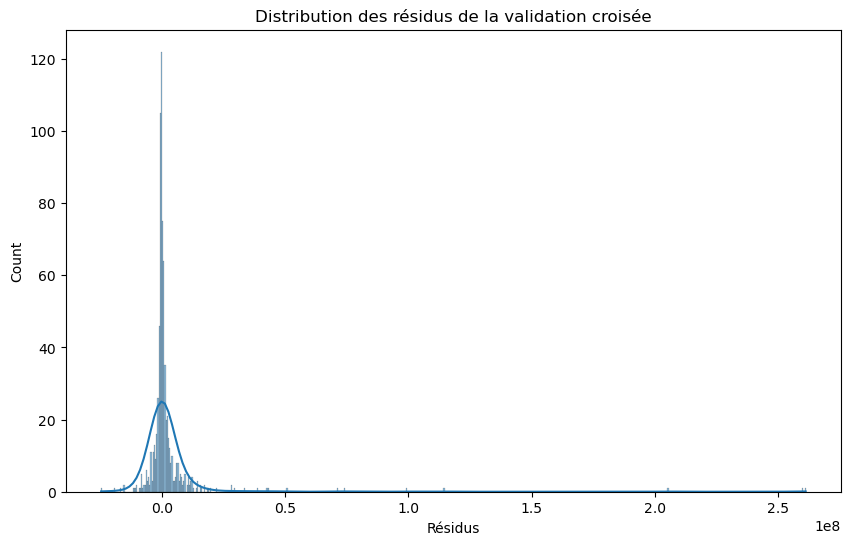

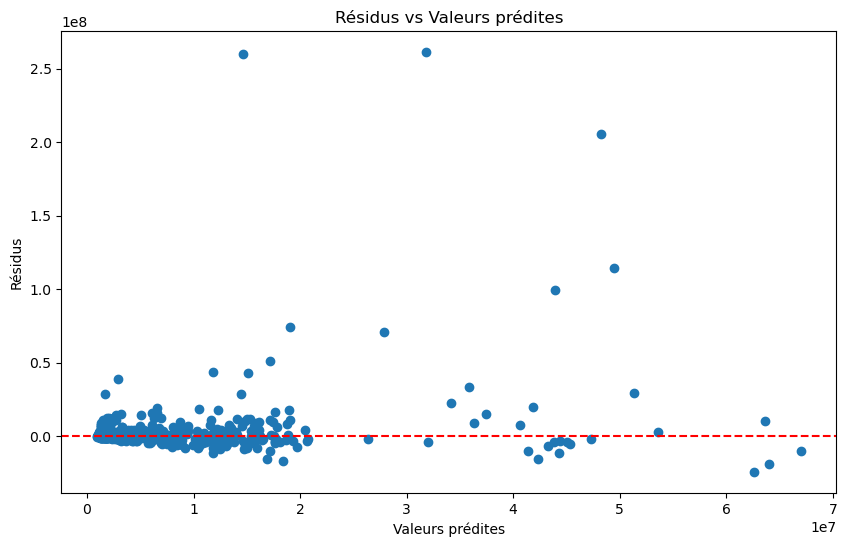

Statistiques des résidus :
Moyenne : 2369218.3522078656
Écart-type : 17598412.128740545
Médiane : 37233.08659951063
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
170     293090784.0    3.185070e+07  2.612401e+08
558     274682208.0    1.461048e+07  2.600717e+08
124     253832464.0    4.827938e+07  2.055531e+08
3264    163945984.0    4.949986e+07  1.144461e+08
167     143423024.0    4.396807e+07  9.945496e+07
559      92937640.0    1.903272e+07  7.390492e+07
1672     98960776.0    2.788448e+07  7.107629e+07
98       68090728.0    1.719787e+07  5.089286e+07
308      55073120.0    1.178709e+07  4.328603e+07
3187     57764408.0    1.506455e+07  4.269986e+07


In [155]:
y_pred_cv = cross_val_predict(pipeline_svr_v4, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La discrétisation du nombre d'étage n'a pas amélioré les métriques

# SVR (Support Vector Regression): test 5

In [156]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

# Colonnes catégorielles à encoder 
var_cat = ['CouncilDistrictCode']

bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

# Prétraitement des données explicatives (X)
preprocessing_v15 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('drop', 'drop', ['PropertyGFABuilding(s)', 'LargestPropertyUseType']),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
        ],
        remainder='passthrough',
        force_int_remainder_cols=False
    ))
])

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v5 = Pipeline([
    ('preprocessing', preprocessing_v15),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=True  # Désactiver la vérification stricte
    ))
])

In [157]:
pipeline_svr_v5

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEEC64B80>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEEC663E0>)),
                                 ('transformations',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('...
                                                                    'LargestPropertyUseType']),
                                                                  ('cat',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['CouncilDistrictCode']),
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné'])]))])),
                ('model',
                 TransformedTargetRegressor(regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [158]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_svr_v5,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4210315.925779654
RMSE moyen sur la validation croisée: 15996570.893790137
R² moyen sur la validation croisée: 0.4260592047040431
MAPE moyen sur la validation croisée: 0.7877530044196421


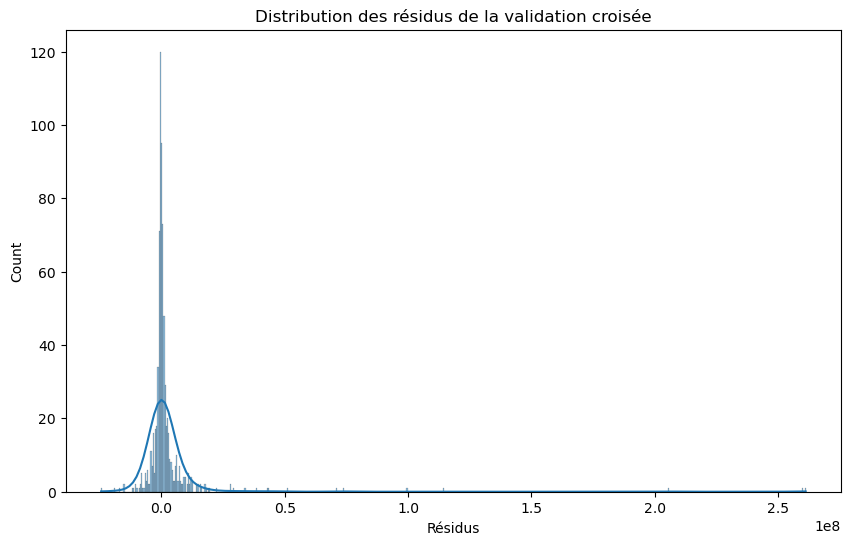

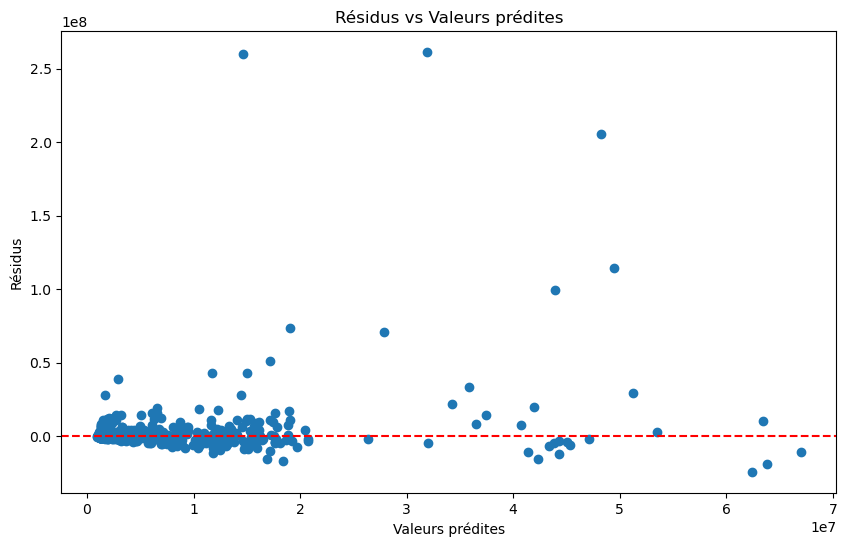

Statistiques des résidus :
Moyenne : 2369532.4571634135
Écart-type : 17597972.149805572
Médiane : 36734.48093272094
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
170     293090784.0    3.189054e+07  2.612002e+08
558     274682208.0    1.460920e+07  2.600730e+08
124     253832464.0    4.822967e+07  2.056028e+08
3264    163945984.0    4.950105e+07  1.144449e+08
167     143423024.0    4.395230e+07  9.947072e+07
559      92937640.0    1.900738e+07  7.393026e+07
1672     98960776.0    2.789221e+07  7.106857e+07
98       68090728.0    1.719823e+07  5.089250e+07
308      55073120.0    1.177691e+07  4.329621e+07
3187     57764408.0    1.505442e+07  4.270999e+07


In [159]:
y_pred_cv = cross_val_predict(pipeline_svr_v5, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

=> La combinaison de la taille et de l'usage principal du bâtiment a amélioré les métriques

# SVR (Support Vector Regression): test 6

In [160]:
# Fonction personnalisée pour le binning
def bin_property_gfa(X):
    bins = [0, 50000, 100000, 200000, X['PropertyGFABuilding(s)'].max()]
    labels = [0, 1, 2, 3]
    X = X.copy()
    X['PropertyGFABuilding(s)_binned'] = pd.cut(X['PropertyGFABuilding(s)'], bins=bins, labels=labels)
    return X

# Fonction pour créer la colonne combinée 'Usage_Taille_Combiné'
def create_usage_taille_combined(X):
    X = X.copy()
    X['Usage_Taille_Combiné'] = X['LargestPropertyUseType'].astype(str) + ' ' + X['PropertyGFABuilding(s)_binned'].astype(str)
    return X

# Colonnes catégorielles à encoder 
var_cat = ['CouncilDistrictCode']

bin_transformer = FunctionTransformer(bin_property_gfa, validate=False)
usage_taille_transformer = FunctionTransformer(create_usage_taille_combined, validate=False)

col_bin = ['NumberofBuildings']  

binarizer_transformer = Binarizer(threshold=1)  # Binarisation

# Prétraitement des données explicatives (X)
preprocessing_v16 = Pipeline(steps=[
    ('binning', bin_transformer),  # Binning sur PropertyGFABuilding(s)
    ('combine_usage_size', usage_taille_transformer),  # Combinaison des colonnes
    ('transformations', ColumnTransformer(
        transformers=[
            ('drop', 'drop', ['PropertyGFABuilding(s)', 'LargestPropertyUseType']),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_cat),
            ('bin', binarizer_transformer, col_bin),  # Binarisation sur 'NumberofBuildings'
            ('onehot_usage_taille', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Usage_Taille_Combiné']),
        ],
        remainder='passthrough',
        force_int_remainder_cols=False
    ))
])

# Pipeline avec Random Forest et transformation de la cible
pipeline_svr_v6 = Pipeline([
    ('preprocessing', preprocessing_v16),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=SVR(),
        transformer=log_transformer_y,
        check_inverse=False  # Désactiver la vérification stricte
    ))
])

In [161]:
pipeline_svr_v6

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEDC42700>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEDC420C0>)),
                                 ('transformations',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    remainder='passthrough',
                                                    transformers=[('...
                                                                   ['CouncilDistrictCode']),
                                                                  ('bin',
                                                                   Binarizer(threshold=1),
                                                                   ['NumberofBuildings']),
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné'])]))])),
                ('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=SVR(),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [162]:
# Validation croisée 
cv_results = cross_validate(
    pipeline_svr_v6,
    X_train,
    y_train,
    cv=stratified_cv.split(X_train, y_train_bins),  # Utilisez les bins pour la stratification, 
    scoring=scoring, 
    return_train_score=False)
# Afficher les résultats de la validation croisée pour chaque métrique
print(f"MAE moyen sur la validation croisée: {-cv_results['test_MAE'].mean()}")
print(f"RMSE moyen sur la validation croisée: {-cv_results['test_RMSE'].mean()}")
print(f"R² moyen sur la validation croisée: {cv_results['test_R2'].mean()}")
print(f"MAPE moyen sur la validation croisée: {cv_results['test_MAPE'].mean()}")

MAE moyen sur la validation croisée: 4210357.0739312265
RMSE moyen sur la validation croisée: 15996587.200950783
R² moyen sur la validation croisée: 0.42605774854087997
MAPE moyen sur la validation croisée: 0.7877592923146398


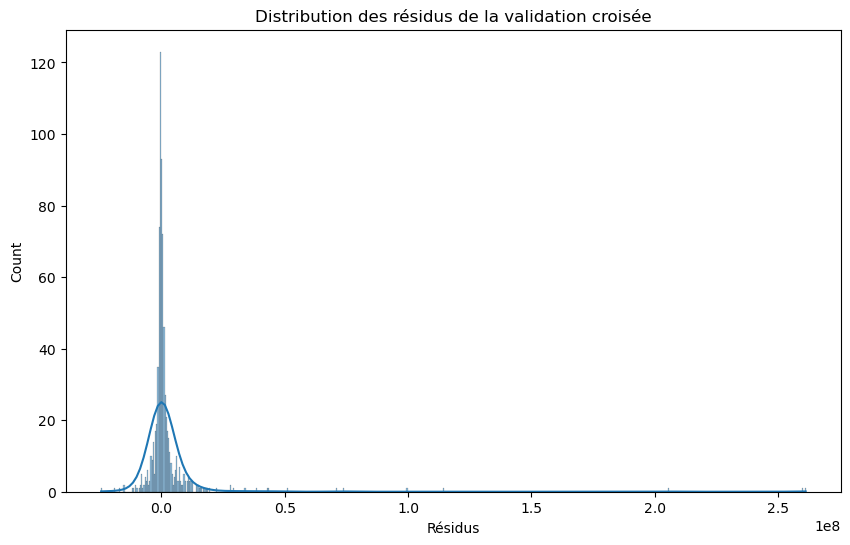

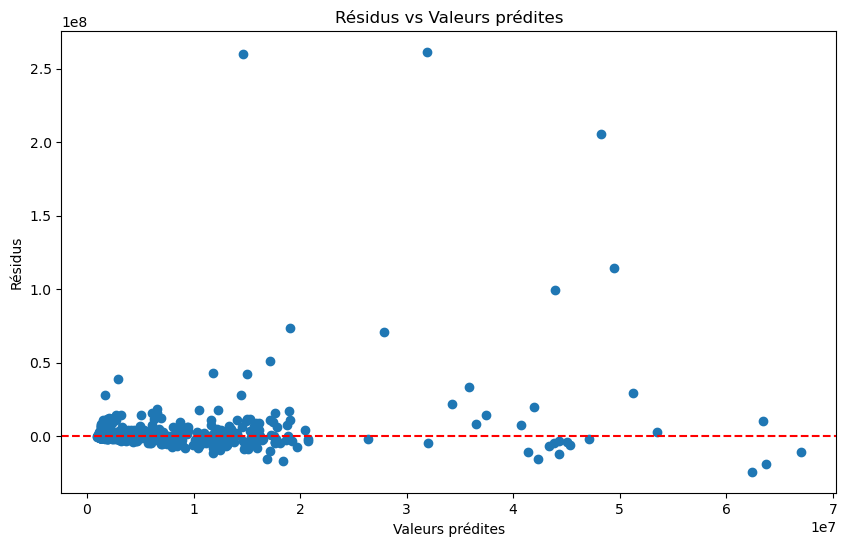

Statistiques des résidus :
Moyenne : 2369743.3899119115
Écart-type : 17598178.15200193
Médiane : 36538.31165386038
Détail des 10 plus grands résidus :
      Valeur réelle  Valeur prédite        Résidu
170     293090784.0    3.189059e+07  2.612002e+08
558     274682208.0    1.460921e+07  2.600730e+08
124     253832464.0    4.820896e+07  2.056235e+08
3264    163945984.0    4.950105e+07  1.144449e+08
167     143423024.0    4.395232e+07  9.947070e+07
559      92937640.0    1.900824e+07  7.392940e+07
1672     98960776.0    2.789114e+07  7.106964e+07
98       68090728.0    1.719816e+07  5.089257e+07
308      55073120.0    1.177895e+07  4.329417e+07
3187     57764408.0    1.505441e+07  4.270999e+07


In [163]:
y_pred_cv = cross_val_predict(pipeline_svr_v6, X_train, y_train, cv=5)

# Convertir y_pred_cv en pandas.Series avec l'index de y_train
y_pred_cv_series = pd.Series(y_pred_cv, index=y_train.index)

residus_cv = y_train - y_pred_cv

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_cv, kde=True)
plt.title("Distribution des résidus de la validation croisée")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv, residus_cv)
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_cv.mean()}")
print(f"Écart-type : {residus_cv.std()}")
print(f"Médiane : {np.median(residus_cv)}")

# Trouver les 10 plus grands résidus
top_10_residus = residus_cv.nlargest(10)

# Récupérer les valeurs prédites correspondantes aux plus grands résidus
valeurs_predites_top10 = y_pred_cv_series.loc[top_10_residus.index]

# Créer un DataFrame récapitulatif avec les valeurs réelles, prédites et les résidus
df_top10_residus = pd.DataFrame({
    'Valeur réelle': y_train.loc[top_10_residus.index],
    'Valeur prédite': valeurs_predites_top10,
    'Résidu': residus_cv.loc[top_10_residus.index]
})

# Afficher le tableau récapitulatif
print("Détail des 10 plus grands résidus :")
print(df_top10_residus)

# Conclusion des différents modèles

| Modèle  | R²  | MAE      | RMSE      | MAPE |
|---------|-----|----------|----------|------|
| lr_v4   | 0.60 | 3 752 061 | 11 916 381 | 0.62 |
| rf_v5   | 0.65 | 3 590 607 | 12 062 271 | 0.64 |
| xgb_v6  | 0.63 | 4 065 932 | 12 587 009 | 0.66 |
| svr_v5  | 0.43 | 4 210 315 | 15 996 570 | 0.79 |

Le modèle rf_v5 (Random Forest) semble offrir un bon compromis, mais il est nécessaire de comparer ses performances avec celles de xgb_v6 (XGBoost) pour faire un choix éclairé.

rf_v5 a un R² de 0.65, indiquant une bonne capacité de prédiction, et un MAE de 3 590 607, ce qui suggère qu'en moyenne, il fait moins d'erreurs absolues. Son RMSE de 12 062 271 est légèrement supérieur à celui de lr_v4, mais la différence reste modérée. Le MAPE de 0.64 est comparable à celui des autres modèles performants.

xgb_v6, quant à lui, a un R² de 0.63, un MAE de 4 065 932, un RMSE de 12 587 009, et un MAPE de 0.66. Bien que légèrement moins performant sur certaines métriques, il peut offrir une plus grande stabilité ou d'autres avantages en fonction des données.

Je vais donc analyser les résultats de rf_v5 et xgb_v6 plus en détail, en examinant les résidus pour choisir celui qui offrira le meilleur compromis en termes de précision et de robustesse.

## Analyse des performances du modèle Random Forest

In [164]:
def evaluation_model(model, X_train, y_train, X_test, y_test):
    """
    Évalue les performances d'un modèle sur les ensembles d'entraînement et de test.
    
    Paramètres :
    - model : Modèle entraîné.
    - X_train : Données explicatives d'entraînement.
    - y_train : Cibles d'entraînement.
    - X_test : Données explicatives de test.
    - y_test : Cibles de test.
    
    Retourne :
    - Un dictionnaire contenant les métriques R², MAE, RMSE, MAPE pour l'entraînement et le test.
    - Les prédictions pour l'ensemble d'entraînement et de test.
    """
    # Faire des prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculer les métriques pour l'ensemble d'entraînement
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    # Calculer les métriques pour l'ensemble de test
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    # Résumé des résultats
    metrics = {
        'R² (train)': r2_train,
        'MAE (train)': mae_train,
        'RMSE (train)': rmse_train,
        'MAPE (train)': mape_train,
        'R² (test)': r2_test,
        'MAE (test)': mae_test,
        'RMSE (test)': rmse_test,
        'MAPE (test)': mape_test
    }
    
    # Affichage des métriques
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    
    return metrics, y_train_pred, y_test_pred

In [165]:
metrics, y_train_pred, y_test_pred = evaluation_model(pipeline_rf_v5, X_train, y_train, X_test, y_test)
print(metrics)

R² (train): 0.86
MAE (train): 1569175.30
RMSE (train): 8049532.56
MAPE (train): 0.19
R² (test): 0.82
MAE (test): 3735999.69
RMSE (test): 10408489.00
MAPE (test): 0.79
{'R² (train)': 0.8619667163340976, 'MAE (train)': 1569175.2975804305, 'RMSE (train)': 8049532.562913096, 'MAPE (train)': 0.1909056201116664, 'R² (test)': 0.817886666644466, 'MAE (test)': 3735999.6942225327, 'RMSE (test)': 10408489.002637995, 'MAPE (test)': 0.7940320397130921}


## Analyse des résidus du modèle Random Forest

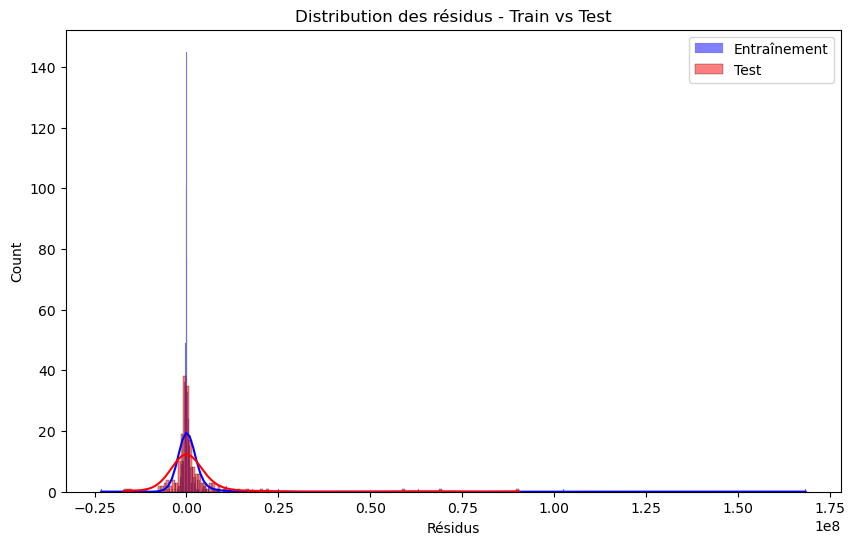

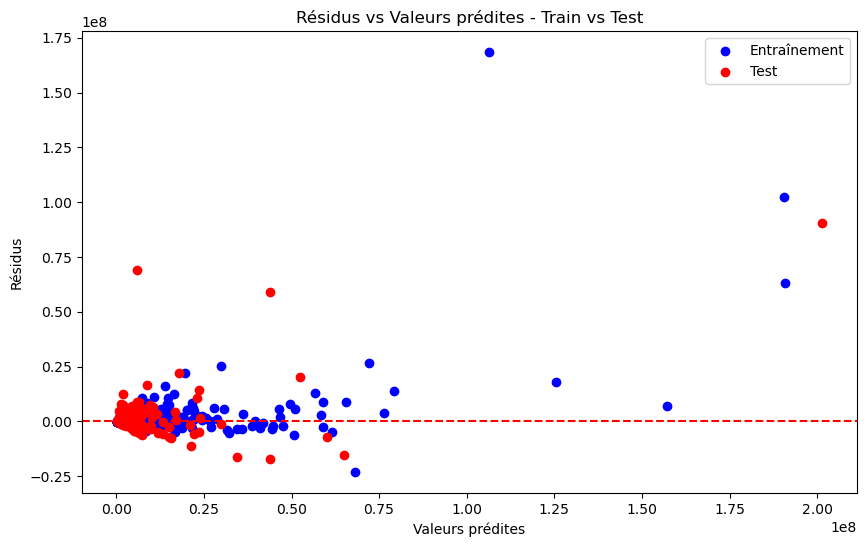

Statistiques des résidus sur l'entraînement :
Moyenne : 962073.7702264477
Écart-type : 7997158.728371169
Médiane : 2079.108112147893

Statistiques des résidus sur le test :
Moyenne : 1499115.687955934
Écart-type : 10327469.09498356
Médiane : -25231.758885761665

Détail des 10 plus grands résidus sur le test :
      Valeur réelle  Valeur prédite        Résidu
618     291614432.0    2.012852e+08  9.032923e+07
309      75073888.0    5.877159e+06  6.919673e+07
1690    102673696.0    4.381538e+07  5.885832e+07
205      40062888.0    1.779299e+07  2.226990e+07
2        72587024.0    5.249637e+07  2.009065e+07
293      26689658.0    4.373081e+07 -1.704116e+07
194      25453690.0    8.782251e+06  1.667144e+07
225      18221224.0    3.442390e+07 -1.620268e+07
292      49517704.0    6.498496e+07 -1.546725e+07
280      37785552.0    2.352407e+07  1.426148e+07


In [166]:
# Calcul des résidus
residus_train = y_train - y_train_pred
residus_test = y_test - y_test_pred

# Histogramme des résidus sur le train et le test
plt.figure(figsize=(10, 6))
sns.histplot(residus_train, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test, kde=True, color="red", label="Test")
plt.title("Distribution des résidus - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites pour les deux ensembles
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residus_train, color="blue", label="Entraînement")
plt.scatter(y_test_pred, residus_test, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus sur le train et le test
print("Statistiques des résidus sur l'entraînement :")
print(f"Moyenne : {residus_train.mean()}")
print(f"Écart-type : {residus_train.std()}")
print(f"Médiane : {np.median(residus_train)}")

print("\nStatistiques des résidus sur le test :")
print(f"Moyenne : {residus_test.mean()}")
print(f"Écart-type : {residus_test.std()}")
print(f"Médiane : {np.median(residus_test)}")

# Trouver les 10 plus grands résidus en valeur absolue sur le test
top_10_residus_test = residus_test.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes sur le test
valeurs_reelles_test = y_test.loc[top_10_residus_test.index]
valeurs_predites_test = pd.Series(y_test_pred, index=y_test.index).loc[top_10_residus_test.index]

# Créer un DataFrame récapitulatif des 10 plus grands résidus sur le test
df_top10_residus_test = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_test,
    'Valeur prédite': valeurs_predites_test,
    'Résidu': residus_test.loc[top_10_residus_test.index]
})

# Afficher les résultats
print("\nDétail des 10 plus grands résidus sur le test :")
print(df_top10_residus_test)

In [167]:
# Résumé statistique des résidus sur l'entraînement
describe_residus_train = residus_train.describe()

# Résumé statistique des résidus sur le test
describe_residus_test = residus_test.describe()

# Affichage des résumés
print("Résumé statistique des résidus sur l'entraînement :")
print(describe_residus_train)

print("\nRésumé statistique des résidus sur le test :")
print(describe_residus_test)

Résumé statistique des résidus sur l'entraînement :
count    7.510000e+02
mean     9.620738e+05
std      7.997159e+06
min     -2.321112e+07
25%     -2.473286e+05
50%      2.079108e+03
75%      4.823722e+05
max      1.683926e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Résumé statistique des résidus sur le test :
count    1.880000e+02
mean     1.499116e+06
std      1.032747e+07
min     -1.704116e+07
25%     -9.553100e+05
50%     -2.523176e+04
75%      1.270023e+06
max      9.032923e+07
Name: SiteEnergyUse(kBtu), dtype: float64


Statistiques des résidus par tranche (Train) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -1.483031e+05  1.910885e+05 -1.051782e+05    151
[1086678.125-1965075.625] -1.205451e+05  3.821639e+05 -4.982321e+04    150
[1965075.625-3897738]      2.703571e+04  6.151515e+05  5.573553e+04    150
[3897738-9357230]          5.811277e+05  1.340256e+06  4.972421e+05    150
[9357230-28392337]         1.525977e+06  3.086028e+06  9.047834e+05    112
28392337+                  1.318050e+07  3.301678e+07  5.522218e+06     38

Statistiques des résidus par tranche (Test) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -1.036048e+06  1.399286e+06 -5.401714e+05     40
[1086678.125-1965075.625] -5.215404e+05  1.385883e+06 -8.847659e+04     37
[196

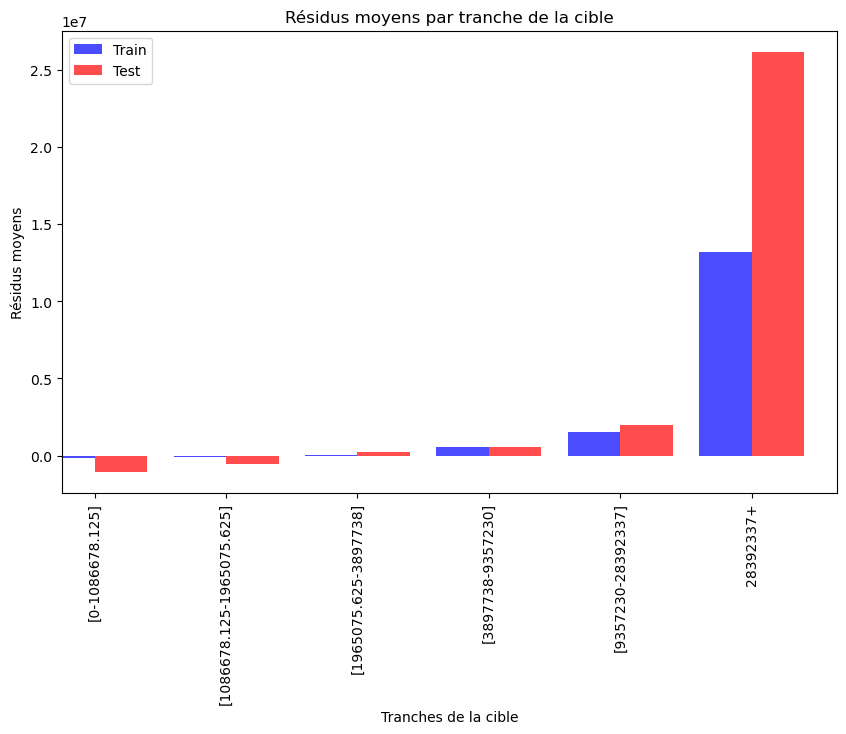

In [168]:
# Définir les tranches basées sur les statistiques de la cible
bins = [0, 1086678.125, 1965075.625, 3897738, 9357230, 28392337, np.inf]  # Tranches basées sur les quantiles et std
labels = ['[0-1086678.125]', '[1086678.125-1965075.625]',
          '[1965075.625-3897738]', '[3897738-9357230]',
          '[9357230-28392337]','28392337+']

# Ajout des tranches à l'ensemble d'entraînement et de test
y_train_bins = pd.cut(y_train, bins=bins, labels=labels)
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)

# Ajouter les résidus dans un DataFrame pour simplifier l'analyse
residus_train_df = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train, 'Tranche': y_train_bins})
residus_test_df = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test, 'Tranche': y_test_bins})

# Calculer les statistiques des résidus par tranche
stat_residus_train = residus_train_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test = residus_test_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train) :\n", stat_residus_train)
print("\nStatistiques des résidus par tranche (Test) :\n", stat_residus_test)

# Visualiser les résidus moyens par tranche
plt.figure(figsize=(10, 6))
stat_residus_train['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train', width=0.4, position=1)
stat_residus_test['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.show()

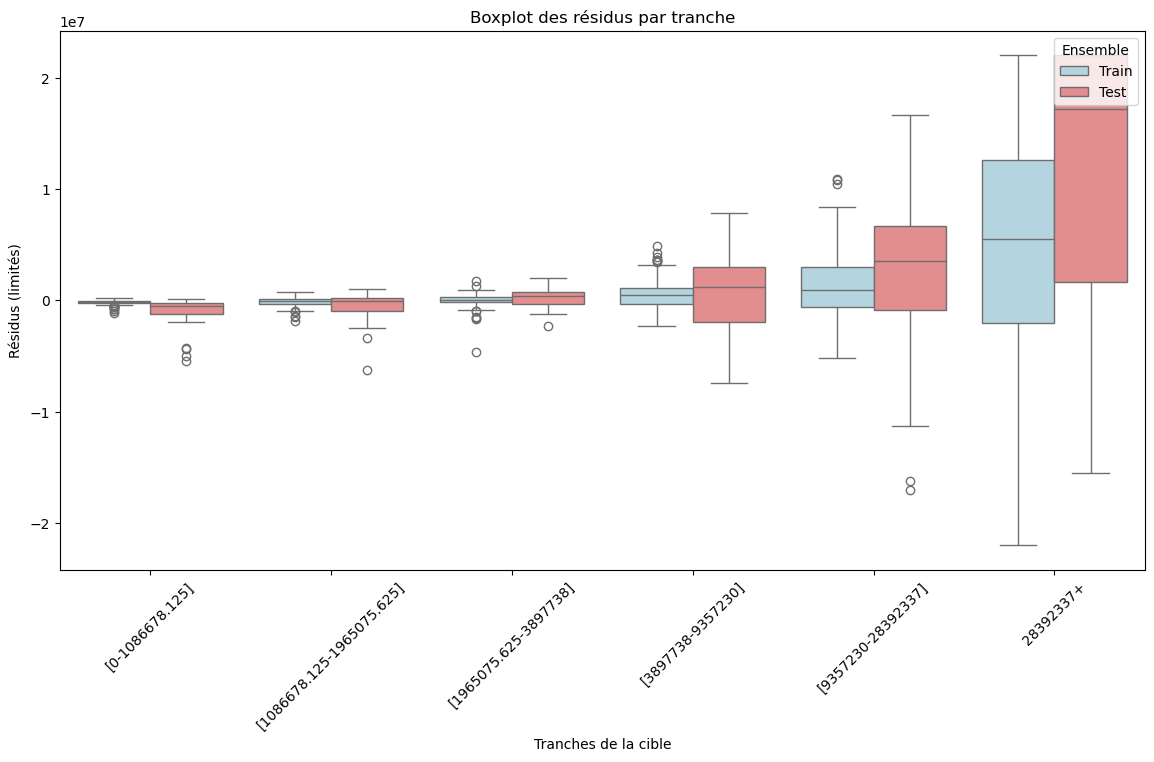

Nombre de valeurs extrêmes : 11
            Cible       Résidus    Tranche Ensemble  Résidu limité
308    55073120.0  2.507066e+07  28392337+    Train     22000000.0
1672   98960776.0  2.676503e+07  28392337+    Train     22000000.0
124   253832464.0  6.299676e+07  28392337+    Train     22000000.0
20     44984468.0 -2.321112e+07  28392337+    Train    -22000000.0
558   274682208.0  1.683926e+08  28392337+    Train     22000000.0
170   293090784.0  1.025225e+08  28392337+    Train     22000000.0
3203   41680640.0  2.217735e+07  28392337+    Train     22000000.0
1690  102673696.0  5.885832e+07  28392337+     Test     22000000.0
618   291614432.0  9.032923e+07  28392337+     Test     22000000.0
309    75073888.0  6.919673e+07  28392337+     Test     22000000.0
205    40062888.0  2.226990e+07  28392337+     Test     22000000.0


In [169]:
# Définir une limite pour les résidus
residus_limite = 22000000

# Ajouter une colonne pour différencier les ensembles
residus_train_df['Ensemble'] = 'Train'
residus_test_df['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df, residus_test_df])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

## Analyse des performances du modèles XGBoost

In [171]:
metrics, y_train_pred, y_test_pred = evaluation_model(pipeline_xgb_v6, X_train, y_train, X_test, y_test)
print(metrics)

R² (train): 1.00
MAE (train): 273471.98
RMSE (train): 708262.06
MAPE (train): 0.04
R² (test): 0.86
MAE (test): 3665900.10
RMSE (test): 8963271.78
MAPE (test): 0.83
{'R² (train)': 0.9989313623953893, 'MAE (train)': 273471.9838116844, 'RMSE (train)': 708262.0598278198, 'MAPE (train)': 0.04108732286907114, 'R² (test)': 0.8649484730235603, 'MAE (test)': 3665900.099356755, 'RMSE (test)': 8963271.784936259, 'MAPE (test)': 0.8321142419084554}


## Analyse des résidus du modèle XGBoost

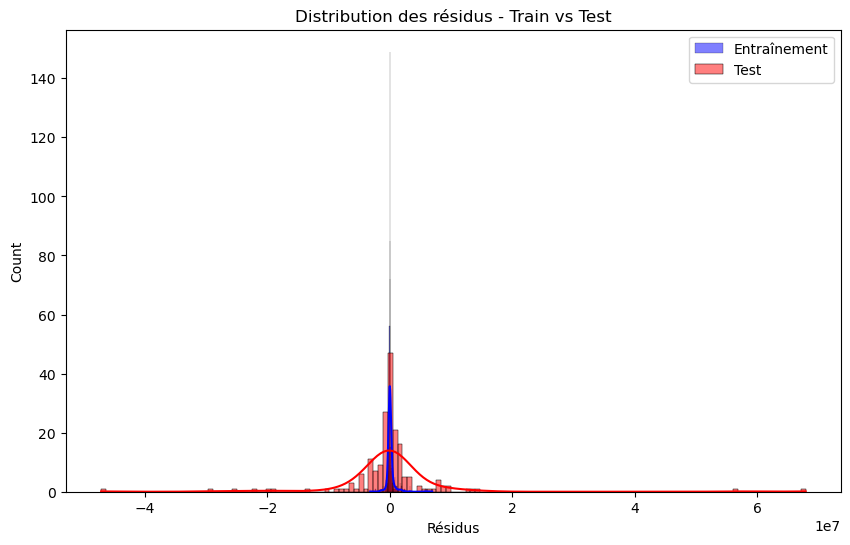

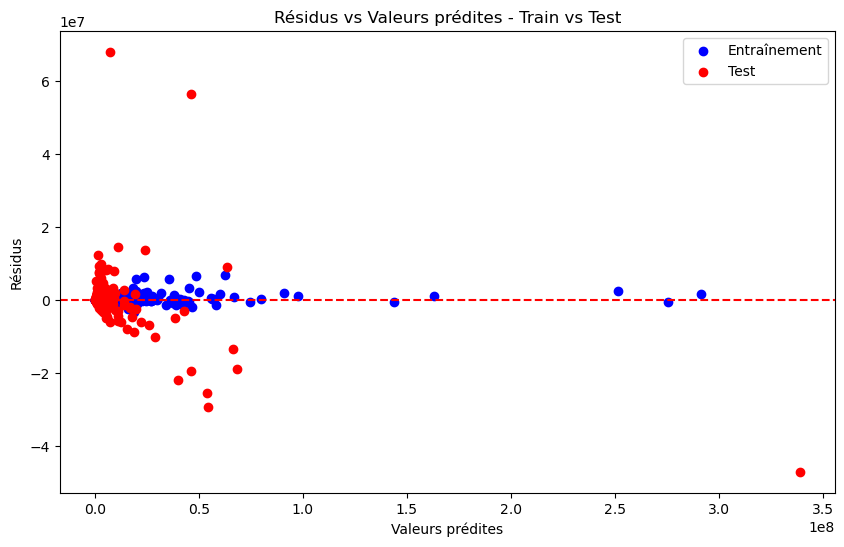

Statistiques des résidus sur l'entraînement :
Moyenne : 108921.10240715713
Écart-type : 700303.0538943444
Médiane : 2699.5

Statistiques des résidus sur le test :
Moyenne : -40394.1066700532
Écart-type : 8987114.533536475
Médiane : -93041.75

Détail des 10 plus grands résidus sur le test :
      Valeur réelle  Valeur prédite      Résidu
309      75073888.0       7178602.0  67895286.0
1690    102673696.0      46109352.0  56564344.0
618     291614432.0     338743168.0 -47128736.0
248      25307744.0      54490328.0 -29182584.0
239      28450436.0      53793696.0 -25343260.0
225      18221224.0      40059124.0 -21837900.0
293      26689658.0      46112604.0 -19422946.0
292      49517704.0      68389872.0 -18872168.0
194      25453690.0      11025623.0  14428067.0
280      37785552.0      24156748.0  13628804.0


In [172]:
# Calcul des résidus
residus_train = y_train - y_train_pred
residus_test = y_test - y_test_pred

# Histogramme des résidus sur le train et le test
plt.figure(figsize=(10, 6))
sns.histplot(residus_train, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test, kde=True, color="red", label="Test")
plt.title("Distribution des résidus - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites pour les deux ensembles
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residus_train, color="blue", label="Entraînement")
plt.scatter(y_test_pred, residus_test, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus sur le train et le test
print("Statistiques des résidus sur l'entraînement :")
print(f"Moyenne : {residus_train.mean()}")
print(f"Écart-type : {residus_train.std()}")
print(f"Médiane : {np.median(residus_train)}")

print("\nStatistiques des résidus sur le test :")
print(f"Moyenne : {residus_test.mean()}")
print(f"Écart-type : {residus_test.std()}")
print(f"Médiane : {np.median(residus_test)}")

# Trouver les 10 plus grands résidus en valeur absolue sur le test
top_10_residus_test = residus_test.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes sur le test
valeurs_reelles_test = y_test.loc[top_10_residus_test.index]
valeurs_predites_test = pd.Series(y_test_pred, index=y_test.index).loc[top_10_residus_test.index]

# Créer un DataFrame récapitulatif des 10 plus grands résidus sur le test
df_top10_residus_test = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_test,
    'Valeur prédite': valeurs_predites_test,
    'Résidu': residus_test.loc[top_10_residus_test.index]
})

# Afficher les résultats
print("\nDétail des 10 plus grands résidus sur le test :")
print(df_top10_residus_test)

In [173]:
# Résumé statistique des résidus sur l'entraînement
describe_residus_train = residus_train.describe()

# Résumé statistique des résidus sur le test
describe_residus_test = residus_test.describe()

# Affichage des résumés
print("Résumé statistique des résidus sur l'entraînement :")
print(describe_residus_train)

print("\nRésumé statistique des résidus sur le test :")
print(describe_residus_test)

Résumé statistique des résidus sur l'entraînement :
count    7.510000e+02
mean     1.089211e+05
std      7.003031e+05
min     -3.203955e+06
25%     -5.338233e+04
50%      2.699500e+03
75%      8.871081e+04
max      6.915844e+06
Name: SiteEnergyUse(kBtu), dtype: float64

Résumé statistique des résidus sur le test :
count    1.880000e+02
mean    -4.039411e+04
std      8.987115e+06
min     -4.712874e+07
25%     -1.223294e+06
50%     -9.304175e+04
75%      1.051036e+06
max      6.789529e+07
Name: SiteEnergyUse(kBtu), dtype: float64


Statistiques des résidus par tranche (Train) :
                                    mean           std       median  count
Tranche                                                                  
[0-1086678.125]           -1.922120e+04  3.726970e+04  -11360.2500    151
[1086678.125-1965075.625] -4.515185e+03  8.669215e+04   -1002.3125    150
[1965075.625-3897738]      1.294002e+04  1.456641e+05   11977.2500    150
[3897738-9357230]          6.641628e+04  3.937674e+05   37221.5000    150
[9357230-28392337]         3.040431e+05  1.029998e+06  175077.0000    112
28392337+                  1.037451e+06  2.201826e+06  480416.0000     38

Statistiques des résidus par tranche (Test) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -9.475040e+05  1.239293e+06 -4.624066e+05     40
[1086678.125-1965075.625] -7.312379e+05  1.762930e+06 -1.234760e+05     37
[1965075.625

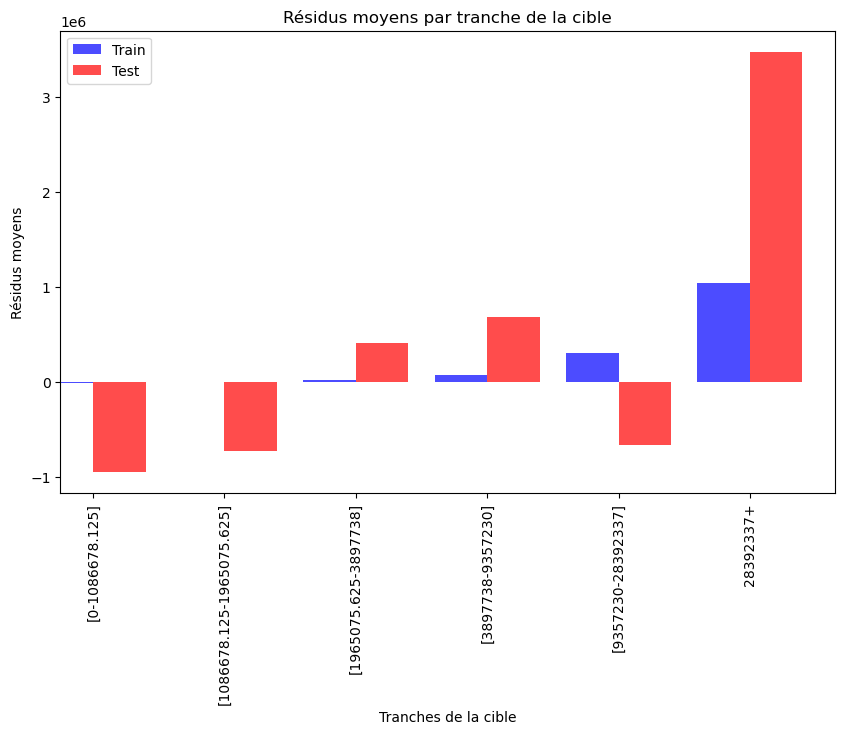

In [174]:
# Définir les tranches basées sur les statistiques de la cible
bins = [0, 1086678.125, 1965075.625, 3897738, 9357230, 28392337, np.inf]  # Tranches basées sur les quantiles et std
labels = ['[0-1086678.125]', '[1086678.125-1965075.625]',
          '[1965075.625-3897738]', '[3897738-9357230]',
          '[9357230-28392337]','28392337+']


# Ajout des tranches à l'ensemble d'entraînement et de test
y_train_bins = pd.cut(y_train, bins=bins, labels=labels)
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)

# Ajouter les résidus dans un DataFrame pour simplifier l'analyse
residus_train_df = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train, 'Tranche': y_train_bins})
residus_test_df = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test, 'Tranche': y_test_bins})

# Calculer les statistiques des résidus par tranche
stat_residus_train = residus_train_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test = residus_test_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train) :\n", stat_residus_train)
print("\nStatistiques des résidus par tranche (Test) :\n", stat_residus_test)

# Visualiser les résidus moyens par tranche
plt.figure(figsize=(10, 6))
stat_residus_train['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train', width=0.4, position=1)
stat_residus_test['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.show()

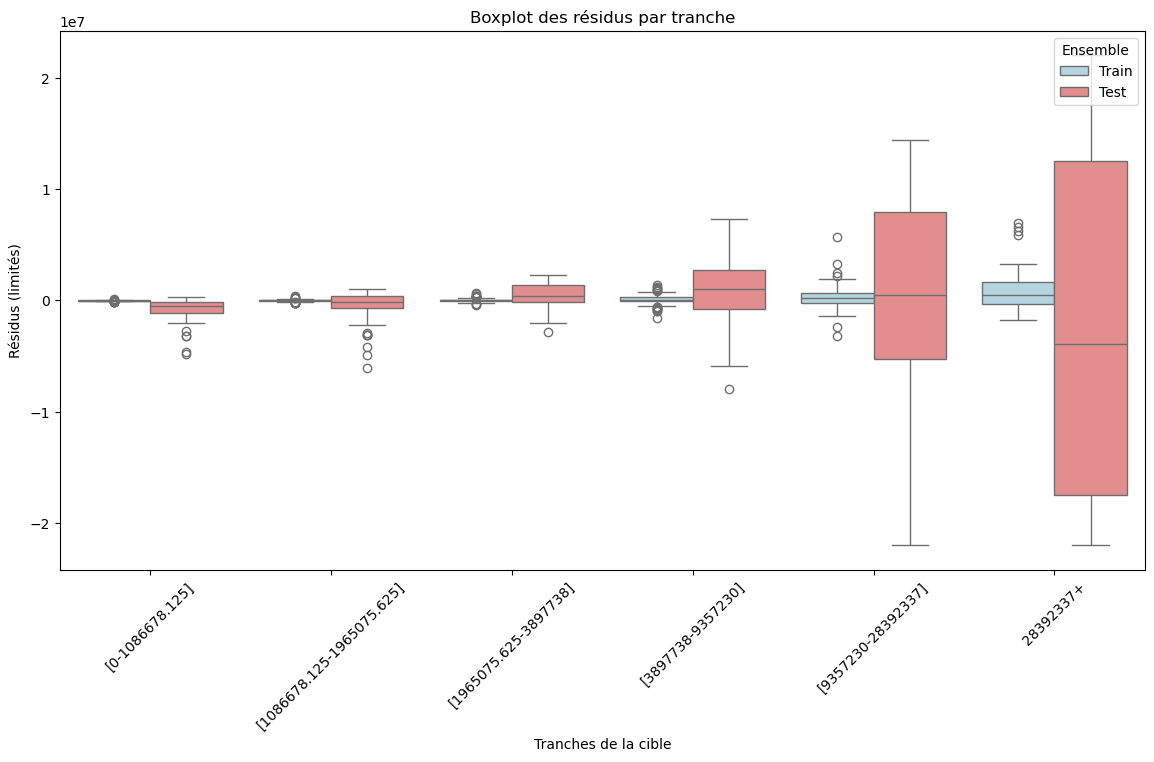

Nombre de valeurs extrêmes : 5
            Cible     Résidus             Tranche Ensemble  Résidu limité
1690  102673696.0  56564344.0           28392337+     Test     22000000.0
618   291614432.0 -47128736.0           28392337+     Test    -22000000.0
309    75073888.0  67895286.0           28392337+     Test     22000000.0
239    28450436.0 -25343260.0           28392337+     Test    -22000000.0
248    25307744.0 -29182584.0  [9357230-28392337]     Test    -22000000.0


In [175]:
# Définir une limite pour les résidus
residus_limite = 22000000

# Ajouter une colonne pour différencier les ensembles
residus_train_df['Ensemble'] = 'Train'
residus_test_df['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df, residus_test_df])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

                                              Feature  Importance
13                  remainder__PropertyGFABuilding(s)    0.364963
8   cat__LargestPropertyUseType_Installations spéc...    0.115150
6   cat__LargestPropertyUseType_Commerce, distribu...    0.112954
12                       remainder__NumberofBuildings    0.059587
9                          discretize__NumberofFloors    0.059077
11                          remainder__Proportion_Gaz    0.051572
2                          cat__CouncilDistrictCode_4    0.044030
10                           remainder__age_propriete    0.039954
0                          cat__CouncilDistrictCode_2    0.035918
7   cat__LargestPropertyUseType_Hôtellerie et lieu...    0.032286
3                          cat__CouncilDistrictCode_5    0.026315
4                          cat__CouncilDistrictCode_6    0.021480
5                          cat__CouncilDistrictCode_7    0.019671
1                          cat__CouncilDistrictCode_3    0.017044


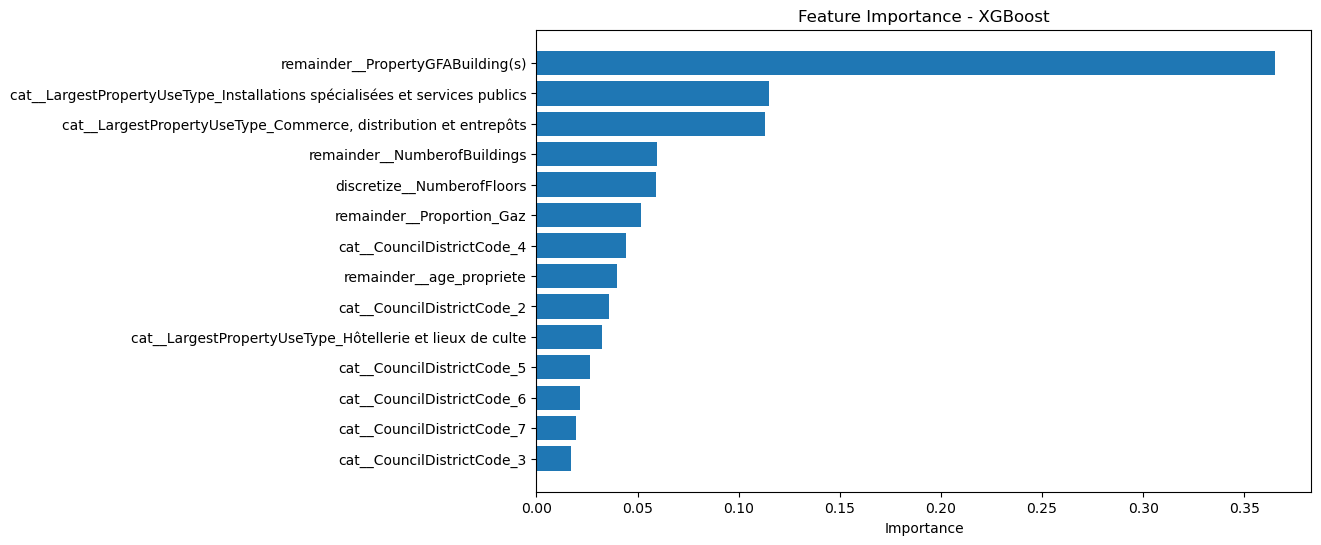

In [176]:
# Entraîner le modèle
pipeline_xgb_v6.fit(X_train, y_train)

# Récupérer le modèle XGBoost du pipeline
xgb_model = pipeline_xgb_v6.named_steps['model'].regressor_

# Extraire l'importance des caractéristiques
importances = xgb_model.feature_importances_

# Extraire les noms des caractéristiques après transformation
column_names = preprocessing_v18.get_feature_names_out()

# Créer un DataFrame avec les importances
importance_df = pd.DataFrame({
    'Feature': column_names,
    'Importance': importances
})

# Trier par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des caractéristiques
print(importance_df)

# Visualisation graphique
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()  # Pour avoir la plus grande importance en haut
plt.show()

## Comparaison des résultats entre Random Forest et XGBoost

| Modèle       | R² (Train) | MAE (Train) | RMSE (Train) | MAPE (Train) | R² (Test) | MAE (Test) | RMSE (Test) | MAPE (Test) |
|:-------------|-------------|-------------|--------------|--------------|-----------|------------|-------------|-------------|
| **Random Forest** | 0.86        | 1 569 175.30 | 8 049 532.56 | 0.19         | 0.82      | 3 735 999.69 | 10 408 489.00 | 0.79        |
| **XGBoost**      | 1.00        | 273 471.98   | 708 262.06   | 0.04         | 0.86      | 3 665 900.10 | 8 963 271.78  | 0.83        |

**Résidus par tranches pour le modèle Random Forest sur le train**
| Tranche                      | Mean             | Std              | Median          | Count | % Cumulé |
|:-----------------------------|------------------|------------------|----------------|-------|----------|
| [0-1086678.125]              | -148303.1        | 191088.5         | -105178.2       | 151   | 20.1%    |
| [1086678.125-1965075.625]    | -120545.1        | 382163.9         | -49823.2        | 150   | 40.1%    |
| [1965075.625-3897738]        | 27035.7          | 615151.5         | 55735.5         | 150   | 60.1%    |
| [3897738-9357230]            | 581127.7         | 1340256.0        | 497242.1        | 150   | 80.1%    |
| [9357230-28392337]           | 1525977.0        | 3086028.0        | 904783.4        | 112   | 95.0%    |
| 28392337+                    | 13180500.0       | 33016780.0       | 5522218.0       | 38    | 100.0%   |


**Résidus par tranches pour le modèle Random Forest sur le test**
| Tranche                      | Mean             | Std              | Median          | Count | % Cumulé |
|:-----------------------------|------------------|------------------|----------------|-------|----------|
| [0-1086678.125]              | -1036048.0       | 1399286.0        | -540171.4       | 40    | 21.3%    |
| [1086678.125-1965075.625]    | -521540.4        | 1385883.0        | -88476.6        | 37    | 40.1%    |
| [1965075.625-3897738]        | 213525.6         | 899082.9         | 354825.4        | 36    | 60.1%    |
| [3897738-9357230]            | 528093.9         | 3763051.0        | 1187649.0       | 38    | 80.3%    |
| [9357230-28392337]           | 1959887.0        | 7800564.0        | 3578802.0       | 27    | 95.0%    |
| 28392337+                    | 26190120.0       | 35054410.0       | 17176070.0      | 10    | 100.0%   |


**Résidus par tranches pour le modèle XGBoost sur le train**
| Tranche                      | Mean             | Std              | Median          | Count | % Cumulé |
|:-----------------------------|------------------|------------------|----------------|-------|----------|
| [0-1086678.125]              | -19221.2         | 37269.7          | -11360.25       | 151   | 20.1%    |
| [1086678.125-1965075.625]    | -4515.2          | 86692.2          | -1002.31        | 150   | 40.1%    |
| [1965075.625-3897738]        | 12940.0          | 145664.1         | 11977.25        | 150   | 60.1%    |
| [3897738-9357230]            | 66416.3          | 393767.4         | 37221.5         | 150   | 80.1%    |
| [9357230-28392337]           | 304043.1         | 1029998.0        | 175077.0        | 112   | 95.0%    |
| 28392337+                    | 1037451.0        | 2201826.0        | 480416.0        | 38    | 100.0%   |


**Résidus par tranches pour le modèle XGBoost sur le test**
| Tranche                      | Mean             | Std              | Median          | Count | % Cumulé |
|:-----------------------------|------------------|------------------|----------------|-------|----------|
| [0-1086678.125]              | -947504.0        | 1239293.0        | -462406.6       | 40    | 21.3%    |
| [1086678.125-1965075.625]    | -731237.9        | 1762930.0        | -123476.0       | 37    | 40.1%    |
| [1965075.625-3897738]        | 404018.2         | 1229670.0        | 413700.9        | 36    | 60.1%    |
| [3897738-9357230]            | 684113.5         | 3270513.0        | 1020858.0       | 38    | 80.3%    |
| [9357230-28392337]           | -664975.3        | 10539280.0       | 457125.0        | 27    | 95.0%    |
| 28392337+                    | 3477523.0        | 35564150.0       | -3879008.0      | 10    | 100.0%   |

Comparaison des résultats de Random Forest (RF) et XGBoost (XGB) :<br>
Performance sur l'ensemble de test :<br>
R² : XGB (0.86) > RF (0.82)<br>
MAE : XGB (3,665,900) < RF (3,735,999)<br>
RMSE : XGB (8,963,271) < RF (10,408,489)<br>
MAPE : XGB (0.83) ≈ RF (0.79)<br>
XGBoost montre une meilleure performance générale sur l'ensemble de test.<br>

Surapprentissage :<br>
RF : R² train (0.86) vs R² test (0.82) - léger surapprentissage<br>
XGB : R² train (1.00) vs R² test (0.86) - surapprentissage important<br>
Random Forest présente un meilleur équilibre entre performance sur l'ensemble d'entraînement et de test.<br>

Erreurs relatives :<br>
MAPE test similaire pour les deux modèles (0.79 vs 0.83)<br>
XGBoost montre un MAPE train extrêmement bas (0.04), indiquant du surapprentissage<br>

Distribution des résidus sur l'ensemble de test :<br>
RF : Résidus généralement plus faibles pour les tranches basses à moyennes<br>
XGB : Résidus plus élevés pour les tranches basses, mais meilleurs pour les tranches élevées<br>
XGB semble mieux performer sur les valeurs élevées, RF sur les valeurs basses à moyennes.<br>

Interprétabilité :<br>
RF offre une interprétation plus simple avec moins de features importantes<br>
XGB fournit une vue plus nuancée de l'impact de différentes variables (La distribution plus équilibrée des importances de XGB explique probablement sa meilleure gestion des valeurs élevées).<br>

Conclusion :
XGBoost semble offrir un meilleur équilibre entre performance et richesse d'interprétation, mais nécessite une attention particulière pour gérer le surapprentissage. Random Forest reste un choix solide si la simplicité et la stabilité sont prioritaires.

# Random Forest regressor: amélioration des paramètres

- Contrôle du nombre d'arbres<br>
n_estimators : Nombre d'arbres dans la forêt.<br>
Plus d'arbres = meilleure stabilité, mais temps d'entraînement plus long.<br>
 Valeurs courantes : 100 à 1000.<br>
- Profondeur des arbres<br>
max_depth : Profondeur maximale d'un arbre.<br>
Une trop grande profondeur peut entraîner du sur-apprentissage (overfitting).<br>
Une faible profondeur peut réduire la capacité de généralisation.<br>
Valeurs courantes : 5 à 50 (ou None pour laisser grandir librement).<br>
- Nombre de variables sélectionnées<br>
max_features : Nombre de variables utilisées pour chaque split.<br>
"sqrt" (par défaut) : Racine carrée du nombre total de variables.<br>
"log2" : Logarithme en base 2 du nombre total de variables.<br>
Valeurs numériques : Ex. 5, 10, etc.<br>
Un trop grand nombre peut augmenter la variance, un trop petit peut réduire la performance.<br>
- Taille minimale des feuilles et des échantillons<br>
min_samples_split : Nombre minimum d'échantillons requis pour diviser un nœud.<br>
Valeur typique : 2 à 10.<br>
Plus grand = moins de division = moins de sur-apprentissage.<br>
- min_samples_leaf : Nombre minimum d'échantillons par feuille terminale.<br>
Valeur typique : 1 à 10.<br>
Plus grand = arbres moins profonds = moins de variance.<br>
- Autres paramètres importants<br>
bootstrap : Si True, l'entraînement utilise un échantillonnage avec remplacement (par défaut True).
oob_score : Si True, calcule un score basé sur les données non utilisées (Out-Of-Bag).

In [177]:
param_grid_rf = {
    'model__regressor__n_estimators': [100, 150, 200, 250],
    'model__regressor__max_depth': [4, 5],
    'model__regressor__max_features': ['sqrt', 'log2', 0.9],
    'model__regressor__min_samples_split': [2, 4, 6],
    'model__regressor__min_samples_leaf': [2, 3, 4],
}

In [178]:
pipeline_rf_v5

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEDB9F9C0>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEDB9D6C0>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('minmax',
                                                                   MinMaxScaler(),
                                                                   ['age_propriete',
                                                                    'LargestPropert...
                                                                  ('onehot_usage_taille',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité',
                                                                    'Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [179]:
# Modifier GridSearchCV pour utiliser la validation croisée stratifiée
grid_search_rf_v1 = GridSearchCV(
    pipeline_rf_v5, 
    param_grid_rf, 
    cv=stratified_cv.split(X_train, y_train_bins),  # Utiliser stratified_cv.split()
    scoring=scoring, 
    refit='RMSE', 
    return_train_score=True
)

In [180]:
# Entraîner le modèle
grid_search_rf_v1.fit(X_train, y_train)

C:\Users\joan6\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000025DEFE81AD0>,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('binning',
                                                         FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEDB9F9C0>)),
                                                        ('combine_usage_size',
                                                         FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEDB9D6C0>)),
                                                        ('transformations',
                                                         ColumnTra...
                                                            0.9],
                         'model__regressor__min_samples_leaf': [2, 3, 4],
                         'model__regressor__min_samples_split': [2, 4, 6],
                         'model__regressor__n_estimators': [100, 150, 200,
                                                            250]},
             refit='RMSE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': 'r2', 'RMSE': 'neg_root_mean_squared_error'})

In [181]:
# Extraire les résultats
cv_results_rf = grid_search_rf_v1 .cv_results_
best_index_rf = grid_search_rf_v1 .best_index_

# Scores du meilleur modèle
best_mae_rf= cv_results_rf['mean_test_MAE'][best_index_rf]
best_rmse_rf = cv_results_rf['mean_test_RMSE'][best_index_rf]
best_r2_rf = cv_results_rf['mean_test_R2'][best_index_rf]
best_mape_rf = cv_results_rf['mean_test_MAPE'][best_index_rf]

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés Random Forest :", grid_search_rf_v1 .best_params_)

# Afficher les scores du meilleur modèle
print(f"MAE moyen du meilleur modèle XGBoost : {-best_mae_rf}")
print(f"RMSE moyen du meilleur modèle XGBoost : {-best_rmse_rf}")
print(f"R² moyen du meilleur modèle XGBoost : {best_r2_rf}")
print(f"MAPE moyen du meilleur modèle XGBoost : {best_mape_rf}")

Meilleurs hyperparamètres trouvés Random Forest : {'model__regressor__max_depth': 5, 'model__regressor__max_features': 0.9, 'model__regressor__min_samples_leaf': 2, 'model__regressor__min_samples_split': 2, 'model__regressor__n_estimators': 100}
MAE moyen du meilleur modèle XGBoost : 3764885.4089289643
RMSE moyen du meilleur modèle XGBoost : 12927986.604702752
R² moyen du meilleur modèle XGBoost : 0.6193710174687713
MAPE moyen du meilleur modèle XGBoost : 0.6468365472364852


In [182]:
# Obtenir le meilleur modèle
best_model_rf_v1 = grid_search_rf_v1.best_estimator_

# Prédictions
y_train_pred_rf = best_model_rf_v1.predict(X_train)
y_test_pred_rf = best_model_rf_v1.predict(X_test)

# Scores sur l'entraînement et le test
train_score_rf = best_model_rf_v1.score(X_train, y_train)
test_score_rf = best_model_rf_v1.score(X_test, y_test)

print("\nScores sur l'entraînement :")
print(f"R² (train) : {train_score_rf}")
print(f"MAE (train) : {-cv_results_rf['mean_train_MAE'][best_index_rf]}")
print(f"RMSE (train) : {-cv_results_rf['mean_train_RMSE'][best_index_rf]}")
print(f"MAPE (train) : {cv_results_rf['mean_train_MAPE'][best_index_rf]}")

print("\nScores sur le test :")
print(f"R² (test) : {test_score_rf}")
print(f"MAE (test) : {-cv_results_rf['mean_test_MAE'][best_index_rf]}")
print(f"RMSE (test) : {-cv_results_rf['mean_test_RMSE'][best_index_rf]}")
print(f"MAPE (test) : {cv_results_rf['mean_test_MAPE'][best_index_rf]}")


Scores sur l'entraînement :
R² (train) : 0.7133915599883762
MAE (train) : 2864947.3878280334
RMSE (train) : 11466465.350228934
MAPE (train) : 0.4835701071058042

Scores sur le test :
R² (test) : 0.7159055661266016
MAE (test) : 3764885.4089289643
RMSE (test) : 12927986.604702752
MAPE (test) : 0.6468365472364852


## Analyse des résidus

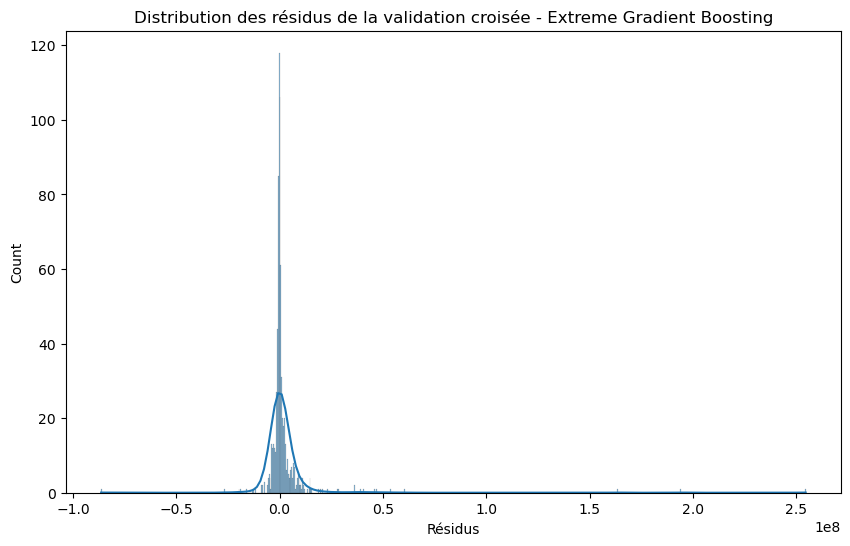

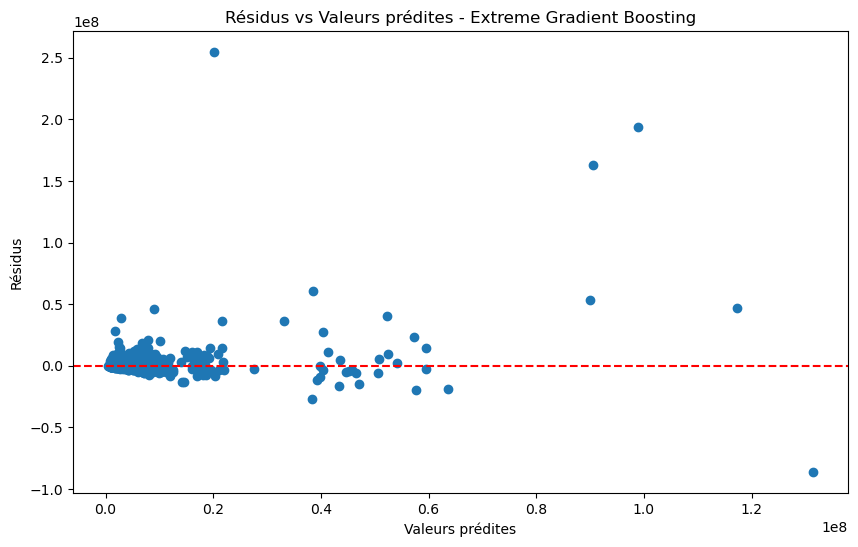

Statistiques des résidus :
Moyenne : 1792938.4123515927
Écart-type : 14834913.087997973
Médiane : -33028.6817340398
Détail des 10 plus grands résidus - Extreme Gradient Boosting :
      Valeur réelle  Valeur prédite        Résidu
558     274682208.0    2.017869e+07  2.545035e+08
170     293090784.0    9.893496e+07  1.941558e+08
124     253832464.0    9.048789e+07  1.633446e+08
20       44984468.0    1.313680e+08 -8.638353e+07
1672     98960776.0    3.844879e+07  6.051199e+07
167     143423024.0    8.997954e+07  5.344348e+07
3264    163945984.0    1.172671e+08  4.667884e+07
308      55073120.0    8.951436e+06  4.612168e+07
559      92937640.0    5.218455e+07  4.075309e+07
3203     41680640.0    2.846622e+06  3.883402e+07


In [183]:
y_pred_cv_rf = cross_val_predict(grid_search_rf_v1.best_estimator_, X_train, y_train, cv=5)

residus_rf = y_train - y_pred_cv_rf

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_rf, kde=True)
plt.title("Distribution des résidus de la validation croisée - Extreme Gradient Boosting")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv_rf, residus_rf)
plt.title("Résidus vs Valeurs prédites - Extreme Gradient Boosting")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_rf.mean()}")
print(f"Écart-type : {residus_rf.std()}")
print(f"Médiane : {np.median(residus_rf)}")

# Convertir les prédictions en Series avec le même index que y_train
y_pred_cv_rf_series = pd.Series(y_pred_cv_rf, index=y_train.index)

# Trouver les 10 plus grands résidus en valeur absolue
top_10_residus_rf = residus_rf.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes
valeurs_reelles_rf = y_train.loc[top_10_residus_rf.index]
valeurs_predites_rf = y_pred_cv_rf_series.loc[top_10_residus_rf.index]

# Créer un DataFrame récapitulatif
df_top10_residus_rf = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_rf,
    'Valeur prédite': valeurs_predites_rf,
    'Résidu': residus_rf.loc[top_10_residus_rf.index]
})

# Afficher les résultats
print("Détail des 10 plus grands résidus - Extreme Gradient Boosting :")
print(df_top10_residus_rf)

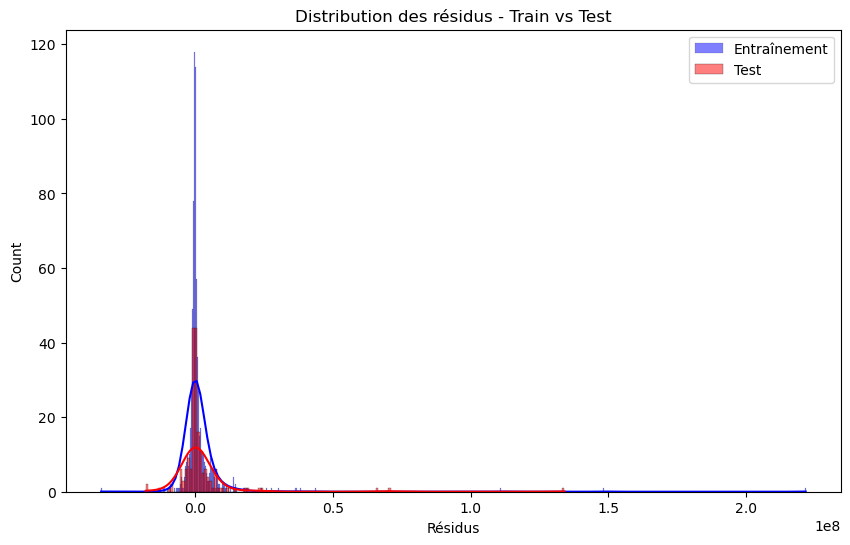

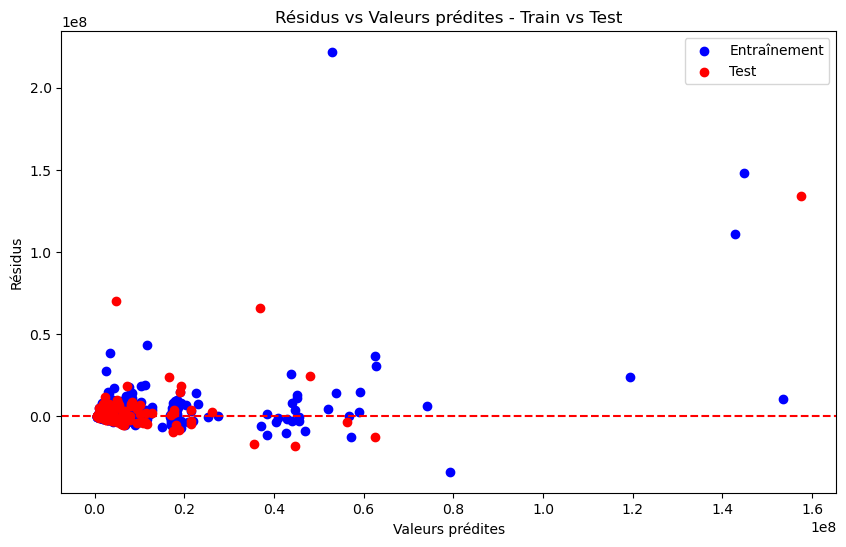

Statistiques des résidus sur l'entraînement :
Moyenne : 1605670.3502654356
Écart-type : 11495052.764801754
Médiane : -16847.348457582528

Statistiques des résidus sur le test :
Moyenne : 1994365.0517228437
Écart-type : 12880557.340863567
Médiane : -57056.07404237613

Détail des 10 plus grands résidus sur le test :
      Valeur réelle  Valeur prédite        Résidu
618     291614432.0    1.575626e+08  1.340519e+08
309      75073888.0    4.858723e+06  7.021516e+07
1690    102673696.0    3.689553e+07  6.577816e+07
2        72587024.0    4.798365e+07  2.460337e+07
205      40062888.0    1.649381e+07  2.356908e+07
280      37785552.0    1.931169e+07  1.847386e+07
194      25453690.0    7.286353e+06  1.816734e+07
293      26689658.0    4.470925e+07 -1.801959e+07
225      18221224.0    3.551188e+07 -1.729065e+07
17       33556756.0    1.905704e+07  1.449971e+07


In [184]:
# Prédictions sur l'ensemble d'entraînement
y_pred_train_rf = grid_search_rf_v1.best_estimator_.predict(X_train)
# Prédictions sur l'ensemble de test
y_pred_test_rf = grid_search_rf_v1.best_estimator_.predict(X_test)

# Calcul des résidus sur le train et le test
residus_train_rf = y_train - y_pred_train_rf
residus_test_rf  = y_test - y_pred_test_rf

# Histogramme des résidus sur le train et le test
plt.figure(figsize=(10, 6))
sns.histplot(residus_train_rf, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test_rf, kde=True, color="red", label="Test")
plt.title("Distribution des résidus - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites pour les deux ensembles
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_rf, residus_train_rf, color="blue", label="Entraînement")
plt.scatter(y_pred_test_rf, residus_test_rf, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus sur le train et le test
print("Statistiques des résidus sur l'entraînement :")
print(f"Moyenne : {residus_train_rf.mean()}")
print(f"Écart-type : {residus_train_rf.std()}")
print(f"Médiane : {np.median(residus_train_rf)}")

print("\nStatistiques des résidus sur le test :")
print(f"Moyenne : {residus_test_rf.mean()}")
print(f"Écart-type : {residus_test_rf.std()}")
print(f"Médiane : {np.median(residus_test_rf)}")

# Trouver les 10 plus grands résidus en valeur absolue sur le test
top_10_residus_test_rf = residus_test_rf.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes sur le test
valeurs_reelles_test_rf = y_test.loc[top_10_residus_test_rf.index]
valeurs_predites_test_rf = pd.Series(y_pred_test_rf, index=y_test.index).loc[top_10_residus_test_rf.index]

# Créer un DataFrame récapitulatif des 10 plus grands résidus sur le test
df_top10_residus_test_rf = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_test_rf,
    'Valeur prédite': valeurs_predites_test_rf,
    'Résidu': residus_test_rf.loc[top_10_residus_test_rf.index]
})

# Afficher les résultats
print("\nDétail des 10 plus grands résidus sur le test :")
print(df_top10_residus_test_rf)

In [185]:
# Résumé statistique des résidus sur l'entraînement
describe_residus_train = residus_train.describe()

# Résumé statistique des résidus sur le test
describe_residus_test = residus_test.describe()

# Affichage des résumés
print("Résumé statistique des résidus sur l'entraînement :")
print(describe_residus_train)

print("\nRésumé statistique des résidus sur le test :")
print(describe_residus_test)

Résumé statistique des résidus sur l'entraînement :
count    7.510000e+02
mean     1.089211e+05
std      7.003031e+05
min     -3.203955e+06
25%     -5.338233e+04
50%      2.699500e+03
75%      8.871081e+04
max      6.915844e+06
Name: SiteEnergyUse(kBtu), dtype: float64

Résumé statistique des résidus sur le test :
count    1.880000e+02
mean    -4.039411e+04
std      8.987115e+06
min     -4.712874e+07
25%     -1.223294e+06
50%     -9.304175e+04
75%      1.051036e+06
max      6.789529e+07
Name: SiteEnergyUse(kBtu), dtype: float64


Statistiques des résidus par tranche (Train) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -5.220892e+05  5.676218e+05 -3.989354e+05    151
[1086678.125-1965075.625] -4.097180e+05  9.386845e+05 -1.547479e+05    150
[1965075.625-3897738]      7.588949e+04  1.090722e+06  2.056824e+05    150
[3897738-9357230]          1.174514e+06  2.599158e+06  1.152566e+06    150
[9357230-28392337]         3.346845e+06  5.542227e+06  3.238725e+06    112
28392337+                  2.062486e+07  4.608222e+07  9.267876e+06     38

Statistiques des résidus par tranche (Test) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -1.056544e+06  1.212145e+06 -7.245412e+05     40
[1086678.125-1965075.625] -6.520865e+05  1.397035e+06 -2.424828e+05     37
[196

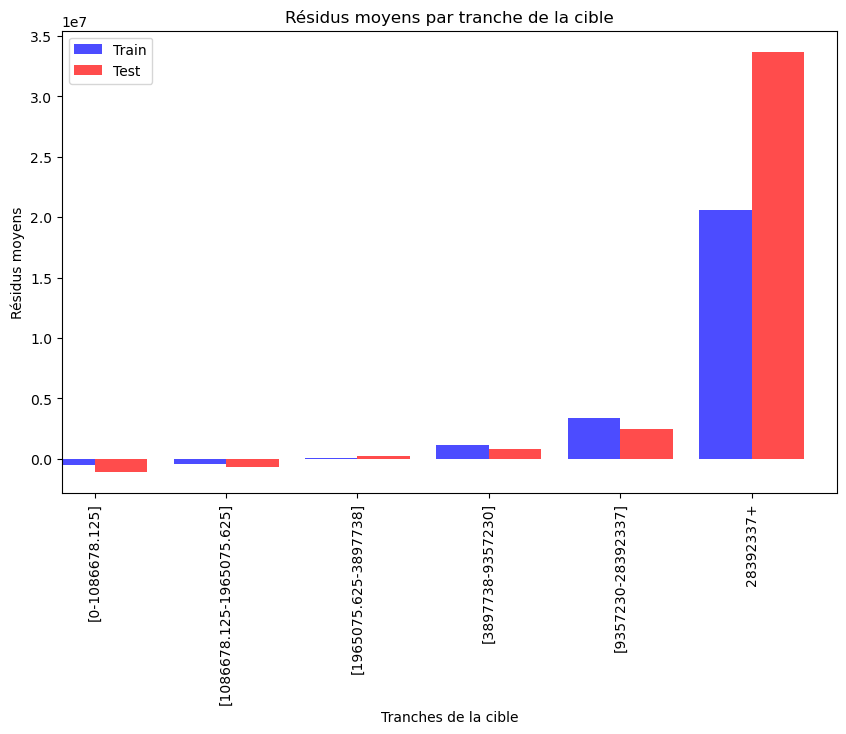

In [186]:
# Définir les tranches basées sur les statistiques de la cible
bins = [0, 1086678.125, 1965075.625, 3897738, 9357230, 28392337, np.inf]  # Tranches basées sur les quantiles et std
labels = ['[0-1086678.125]', '[1086678.125-1965075.625]',
          '[1965075.625-3897738]', '[3897738-9357230]',
          '[9357230-28392337]','28392337+']

# Ajout des tranches à l'ensemble d'entraînement et de test
y_train_bins = pd.cut(y_train, bins=bins, labels=labels)
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)

# Ajouter les résidus dans un DataFrame pour simplifier l'analyse
residus_train_df = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train_rf, 'Tranche': y_train_bins})
residus_test_df = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test_rf, 'Tranche': y_test_bins})

# Calculer les statistiques des résidus par tranche
stat_residus_train = residus_train_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test = residus_test_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train) :\n", stat_residus_train)
print("\nStatistiques des résidus par tranche (Test) :\n", stat_residus_test)

# Visualiser les résidus moyens par tranche
plt.figure(figsize=(10, 6))
stat_residus_train['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train', width=0.4, position=1)
stat_residus_test['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.show()

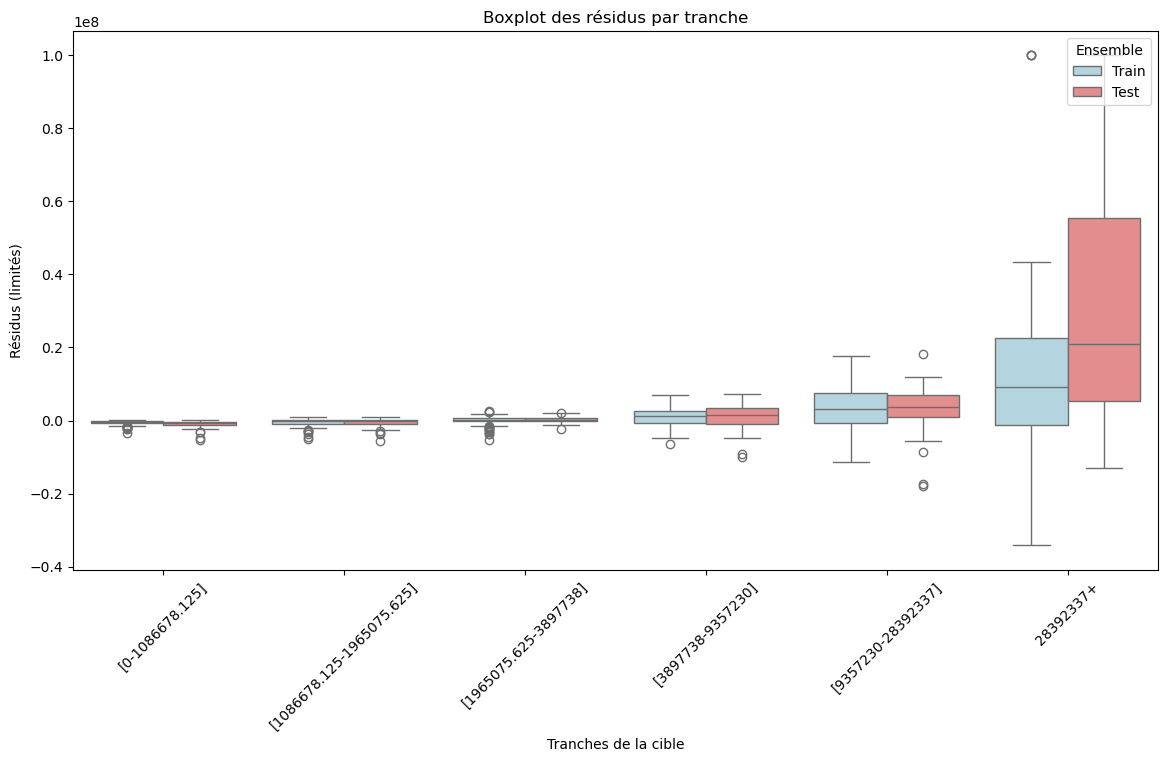

Nombre de valeurs extrêmes : 4
           Cible       Résidus    Tranche Ensemble  Résidu limité
124  253832464.0  1.110102e+08  28392337+    Train    100000000.0
558  274682208.0  2.216966e+08  28392337+    Train    100000000.0
170  293090784.0  1.482787e+08  28392337+    Train    100000000.0
618  291614432.0  1.340519e+08  28392337+     Test    100000000.0


In [187]:
# Définir une limite pour les résidus
residus_limite = 100000000

# Ajouter une colonne pour différencier les ensembles
residus_train_df['Ensemble'] = 'Train'
residus_test_df['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df, residus_test_df])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

## Ajout de poids

In [188]:
best_model = pipeline_rf_v5.set_params(**grid_search_rf_v1.best_params_)
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('binning',
                                  FunctionTransformer(func=<function bin_property_gfa at 0x0000025DEDB9F9C0>)),
                                 ('combine_usage_size',
                                  FunctionTransformer(func=<function create_usage_taille_combined at 0x0000025DEDB9D6C0>)),
                                 ('transformations',
                                  ColumnTransformer(transformers=[('minmax',
                                                                   MinMaxScaler(),
                                                                   ['age_propriete',
                                                                    'LargestPropert...
                                                                                 handle_unknown='ignore'),
                                                                   ['Usage_Taille_Combiné']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['Proportion_Electricité',
                                                                    'Proportion_Gaz'])]))])),
                ('model',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(max_depth=5,
                                                                            max_features=0.9,
                                                                            min_samples_leaf=2,
                                                                            random_state=42),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [190]:
# Appliquer la transformation log à y_train
y_train_transformed = best_model.named_steps['model'].transformer.transform(y_train.values.reshape(-1, 1)).ravel()

# Calculer les seuils pour les différentes tranches
seuil_20 = np.percentile(y_train_transformed, 20)
seuil_40 = np.percentile(y_train_transformed, 40)
seuil_60 = np.percentile(y_train_transformed, 60)
seuil_90 = np.percentile(y_train_transformed, 90)
seuil_95 = np.percentile(y_train_transformed, 95)

# Créer le tableau de poids
poids_echantillons = np.ones(len(y_train_transformed))
poids_echantillons[y_train_transformed <= seuil_20] = 3.0
poids_echantillons[(y_train_transformed > seuil_20) & (y_train_transformed <= seuil_60)] = 1.5
poids_echantillons[(y_train_transformed > seuil_60) & (y_train_transformed <= seuil_90)] = 1.5
poids_echantillons[(y_train_transformed > seuil_90) & (y_train_transformed <= seuil_95)] = 3.0

In [191]:
# Appliquer le prétraitement
X_train_preprocessed = best_model.named_steps['preprocessing'].transform(X_train)

# Réentraîner le modèle Random Forest avec les poids
best_model.named_steps['model'].regressor_.fit(X_train_preprocessed, y_train_transformed, sample_weight=poids_echantillons)

RandomForestRegressor(max_depth=5, max_features=0.9, min_samples_leaf=2,
                      random_state=42)

In [192]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Scores sur l'entraînement :")
print(f"R² (train) : {r2_score(y_train, y_pred_train)}")
print(f"MAE (train) : {mean_absolute_error(y_train, y_pred_train)}")
print(f"RMSE (train) : {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"MAPE (train) : {mean_absolute_percentage_error(y_train, y_pred_train)}")

print("\nScores sur le test :")
print(f"R² (test) : {r2_score(y_test, y_pred_test)}")
print(f"MAE (test) : {mean_absolute_error(y_test, y_pred_test)}")
print(f"RMSE (test) : {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"MAPE (test) : {mean_absolute_percentage_error(y_test, y_pred_test)}")

Scores sur l'entraînement :
R² (train) : 0.6987285683427309
MAE (train) : 2946395.632359699
RMSE (train) : 11892077.407797566
MAPE (train) : 0.44415508308760676

Scores sur le test :
R² (test) : 0.7011259495390776
MAE (test) : 4168184.5878904117
RMSE (test) : 13334014.422193864
MAPE (test) : 0.7512393403125573


## Analyse des résidus

In [193]:
y_pred_train_weighted = best_model.predict(X_train)
y_pred_test_weighted = best_model.predict(X_test)

In [194]:
residus_train_weighted = y_train - y_pred_train_weighted
residus_test_weighted = y_test - y_pred_test_weighted

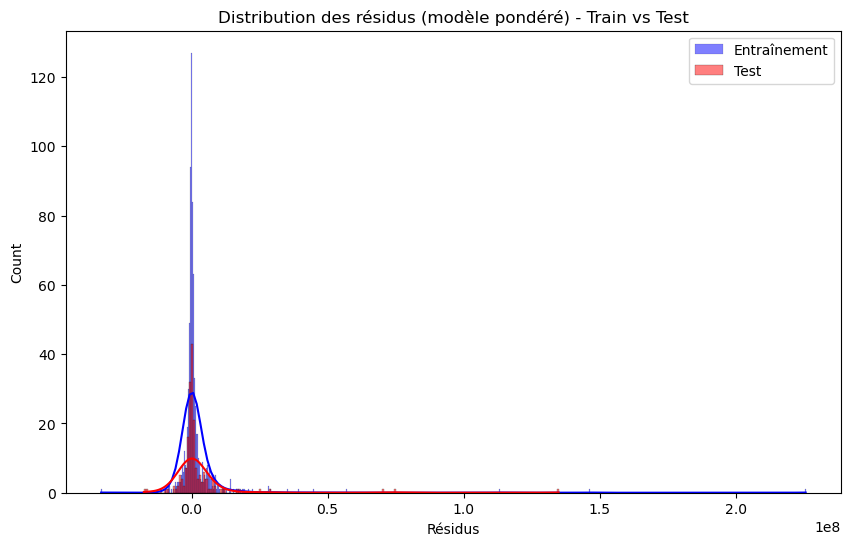

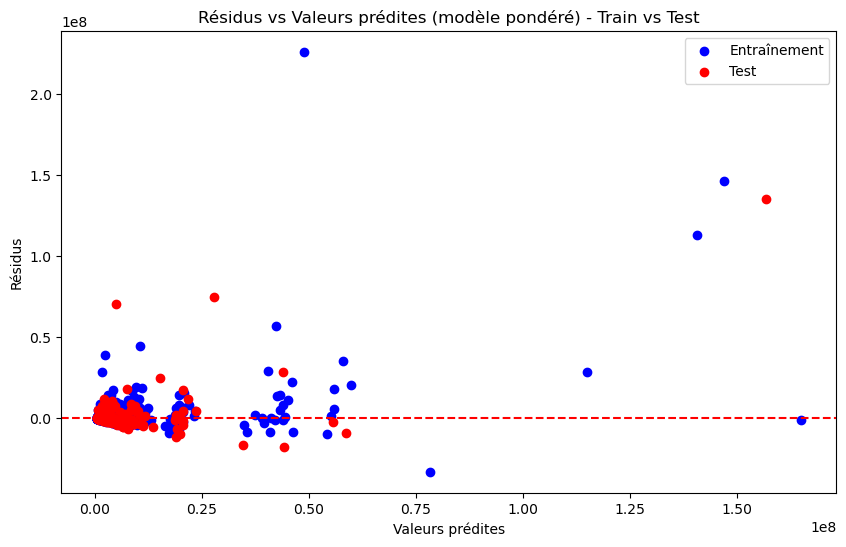

Statistiques des résidus sur l'entraînement (modèle pondéré) :
count    7.510000e+02
mean     1.738085e+06
std      1.177222e+07
min     -3.325519e+07
25%     -5.250869e+05
50%      8.763048e+04
75%      1.200211e+06
max      2.257765e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Statistiques des résidus sur le test (modèle pondéré) :
count    1.880000e+02
mean     2.189249e+06
std      1.318819e+07
min     -1.754288e+07
25%     -8.086383e+05
50%      4.789870e+04
75%      1.355880e+06
max      1.349543e+08
Name: SiteEnergyUse(kBtu), dtype: float64


In [195]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_train_weighted, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test_weighted, kde=True, color="red", label="Test")
plt.title("Distribution des résidus (modèle pondéré) - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_weighted, residus_train_weighted, color="blue", label="Entraînement")
plt.scatter(y_pred_test_weighted, residus_test_weighted, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites (modèle pondéré) - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus
print("Statistiques des résidus sur l'entraînement (modèle pondéré) :")
print(residus_train_weighted.describe())

print("\nStatistiques des résidus sur le test (modèle pondéré) :")
print(residus_test_weighted.describe())

Statistiques des résidus par tranche (Train, modèle pondéré) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -3.570479e+05  4.443487e+05 -2.698592e+05    151
[1086678.125-1965075.625] -2.590512e+05  1.021592e+06  1.026953e+04    150
[1965075.625-3897738]      2.364442e+05  1.124711e+06  4.012734e+05    150
[3897738-9357230]          1.058118e+06  2.805112e+06  1.008742e+06    150
[9357230-28392337]         2.900059e+06  5.529578e+06  2.658584e+06    112
28392337+                  2.313376e+07  4.643608e+07  1.268922e+07     38

Statistiques des résidus par tranche (Test, modèle pondéré) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -8.942581e+05  1.262015e+06 -4.970014e+05     40
[1086678.125-1965075.625] -5.686986e+05  1.6174

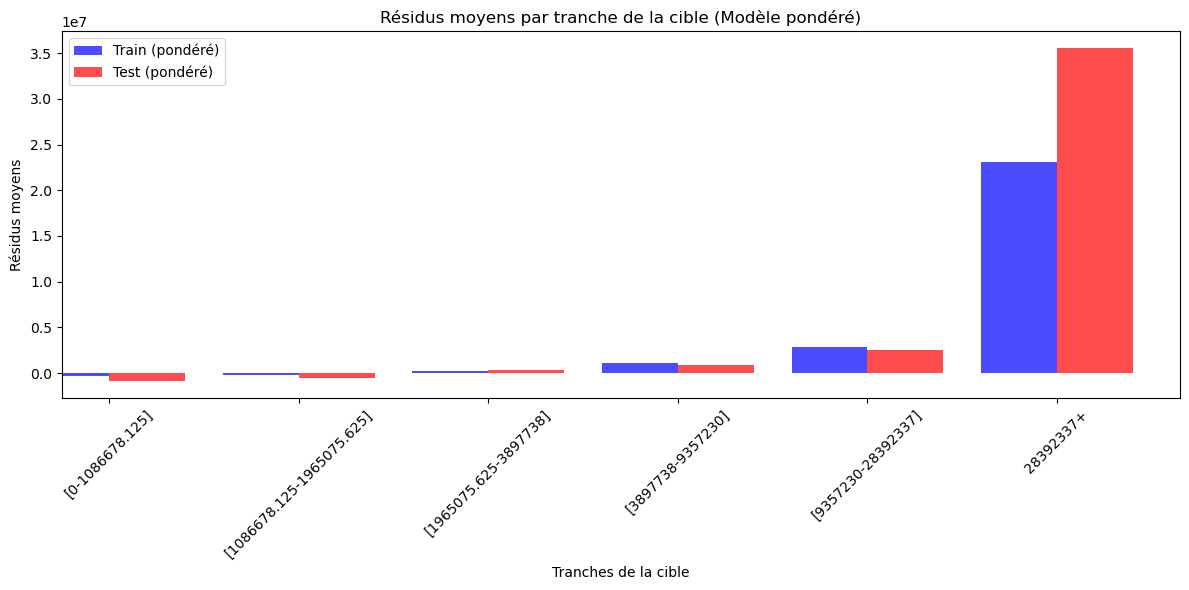

In [196]:
# Analyse par tranche
residus_train_df_weighted = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train_weighted, 'Tranche': y_train_bins})
residus_test_df_weighted = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test_weighted, 'Tranche': y_test_bins})

stat_residus_train_weighted = residus_train_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test_weighted = residus_test_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train, modèle pondéré) :\n", stat_residus_train_weighted)
print("\nStatistiques des résidus par tranche (Test, modèle pondéré) :\n", stat_residus_test_weighted)

# Visualiser les résidus moyens par tranche pour le modèle pondéré
plt.figure(figsize=(12, 6))
stat_residus_train_weighted['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train (pondéré)', width=0.4, position=1)
stat_residus_test_weighted['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test (pondéré)', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible (Modèle pondéré)")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

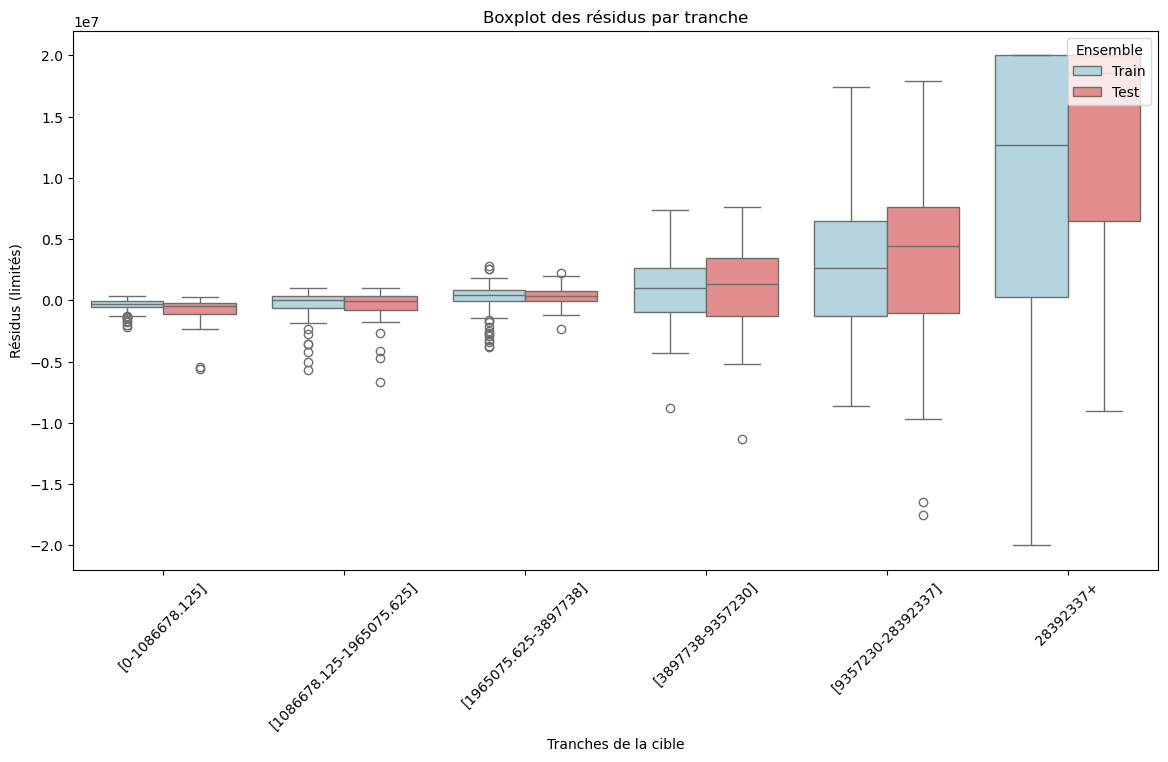

Nombre de valeurs extrêmes : 18
            Cible       Résidus    Tranche Ensemble  Résidu limité
308    55073120.0  4.461772e+07  28392337+    Train     20000000.0
1672   98960776.0  5.678144e+07  28392337+    Train     20000000.0
124   253832464.0  1.131505e+08  28392337+    Train     20000000.0
559    92937640.0  3.504703e+07  28392337+    Train     20000000.0
20     44984468.0 -3.325519e+07  28392337+    Train    -20000000.0
558   274682208.0  2.257765e+08  28392337+    Train     20000000.0
231    69519808.0  2.902373e+07  28392337+    Train     20000000.0
98     68090728.0  2.214349e+07  28392337+    Train     20000000.0
167   143423024.0  2.846891e+07  28392337+    Train     20000000.0
240    30038490.0  2.837165e+07  28392337+    Train     20000000.0
170   293090784.0  1.462179e+08  28392337+    Train     20000000.0
49     80469216.0  2.074767e+07  28392337+    Train     20000000.0
3203   41680640.0  3.922941e+07  28392337+    Train     20000000.0
1690  102673696.0  7.480162e+0

In [197]:
# Définir une limite pour les résidus
residus_limite = 20000000

# Ajouter une colonne pour différencier les ensembles
residus_train_df_weighted['Ensemble'] = 'Train'
residus_test_df_weighted['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df_weighted, residus_test_df_weighted])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

# XGBoost : Amélioration des paramètres

In [198]:
param_grid_xgb = {
    'model__regressor__n_estimators': [200, 250, 300],  
    'model__regressor__max_depth': [3, 4, 5],  # Favorise des arbres moins profonds
    'model__regressor__learning_rate': [0.001, 0.01, 0.05, 0.08],  # Taux d'apprentissage
    'model__regressor__subsample': [0.6, 0.7], 
    'model__regressor__colsample_bytree': [0.6, 0.7],  
    'model__regressor__reg_alpha': [0.2, 0.5, 1.0],  # Régularisation L1
    'model__regressor__reg_lambda': [0.2, 0.5, 1.0],  # Régularisation L2
    'model__regressor__min_child_weight': [3, 4]  
}

In [199]:
pipeline_xgb_v6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['LargestPropertyUseTypeGFA',
                                                   'Proportion_Electricité']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode',
                                                   'LargestPropertyUseType']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [200]:
grid_search_xgb_v1 = GridSearchCV(
    pipeline_xgb_v6, 
    param_grid_xgb, 
    cv=stratified_cv.split(X_train, y_train_bins),  # Utiliser stratified_cv.split()
    scoring=scoring, 
    refit='RMSE', 
    return_train_score=True
)

In [201]:
# Entraîner le modèle
grid_search_xgb_v1.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000025DEFE83780>,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('drop',
                                                                         'drop',
                                                                         ['LargestPropertyUseTypeGFA',
                                                                          'Proportion_Electricité']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['CouncilDistrictCod...
                         'model__regressor__n_estimators': [200, 250, 300],
                         'model__regressor__reg_alpha': [0.2, 0.5, 1.0],
                         'model__regressor__reg_lambda': [0.2, 0.5, 1.0],
                         'model__regressor__subsample': [0.6, 0.7]},
             refit='RMSE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': 'r2', 'RMSE': 'neg_root_mean_squared_error'})

In [202]:
# Extraire les résultats
cv_results_xgb = grid_search_xgb_v1.cv_results_
best_index_xgb = grid_search_xgb_v1.best_index_

# Scores du meilleur modèle
best_mae_xgb = cv_results_xgb['mean_test_MAE'][best_index_xgb]
best_rmse_xgb = cv_results_xgb['mean_test_RMSE'][best_index_xgb]
best_r2_xgb = cv_results_xgb['mean_test_R2'][best_index_xgb]
best_mape_xgb = cv_results_xgb['mean_test_MAPE'][best_index_xgb]

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés XGBoost :", grid_search_xgb_v1.best_params_)

# Afficher les scores du meilleur modèle
print(f"MAE moyen du meilleur modèle XGBoost : {-best_mae_xgb}")
print(f"RMSE moyen du meilleur modèle XGBoost : {-best_rmse_xgb}")
print(f"R² moyen du meilleur modèle XGBoost : {best_r2_xgb}")
print(f"MAPE moyen du meilleur modèle XGBoost : {best_mape_xgb}")

Meilleurs hyperparamètres trouvés XGBoost : {'model__regressor__colsample_bytree': 0.7, 'model__regressor__learning_rate': 0.08, 'model__regressor__max_depth': 3, 'model__regressor__min_child_weight': 3, 'model__regressor__n_estimators': 300, 'model__regressor__reg_alpha': 0.2, 'model__regressor__reg_lambda': 0.2, 'model__regressor__subsample': 0.7}
MAE moyen du meilleur modèle XGBoost : 3518011.897213752
RMSE moyen du meilleur modèle XGBoost : 10327147.38388742
R² moyen du meilleur modèle XGBoost : 0.6879509294473884
MAPE moyen du meilleur modèle XGBoost : 0.5884928748465572


In [203]:
# Obtenir le meilleur modèle
best_model_xgb_v1 = grid_search_xgb_v1.best_estimator_

# Prédictions
y_train_pred_xgb = best_model_xgb_v1.predict(X_train)
y_test_pred_xgb = best_model_xgb_v1.predict(X_test)

# Scores sur l'entraînement et le test
train_score_xgb = best_model_xgb_v1.score(X_train, y_train)
test_score_xgb = best_model_xgb_v1.score(X_test, y_test)

print("\nScores sur l'entraînement :")
print(f"R² (train) : {train_score_xgb}")
print(f"MAE (train) : {-cv_results_xgb['mean_train_MAE'][best_index_xgb]}")
print(f"RMSE (train) : {-cv_results_xgb['mean_train_RMSE'][best_index_xgb]}")
print(f"MAPE (train) : {cv_results_xgb['mean_train_MAPE'][best_index_xgb]}")

print("\nScores sur le test :")
print(f"R² (test) : {test_score_xgb}")
print(f"MAE (test) : {-cv_results_xgb['mean_test_MAE'][best_index_xgb]}")
print(f"RMSE (test) : {-cv_results_xgb['mean_test_RMSE'][best_index_xgb]}")
print(f"MAPE (test) : {cv_results_xgb['mean_test_MAPE'][best_index_xgb]}")


Scores sur l'entraînement :
R² (train) : 0.8957476831153449
MAE (train) : 1935923.829540775
RMSE (train) : 5273268.093090286
MAPE (train) : 0.3041282081924836

Scores sur le test :
R² (test) : 0.860042765386648
MAE (test) : 3518011.897213752
RMSE (test) : 10327147.38388742
MAPE (test) : 0.5884928748465572


## Analyse des résidus

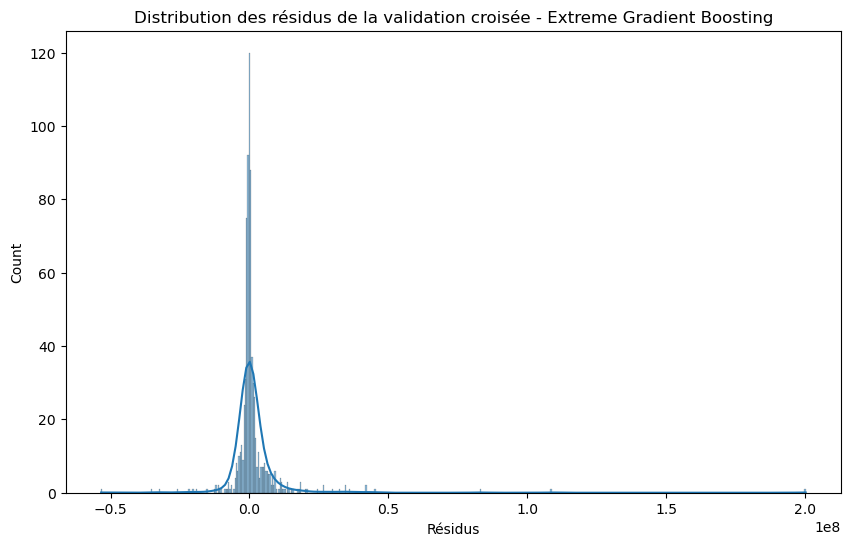

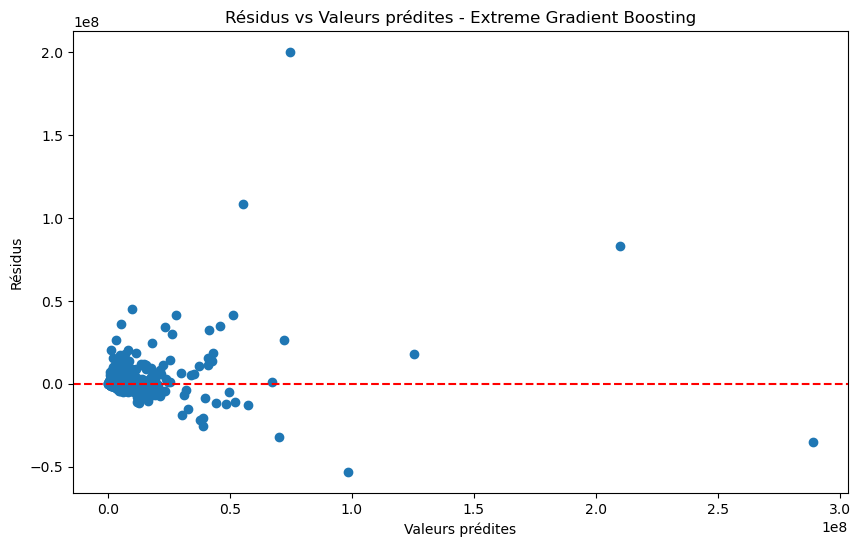

Statistiques des résidus :
Moyenne : 1314627.5731544942
Écart-type : 10889132.89621305
Médiane : -31255.125
Détail des 10 plus grands résidus - Extreme Gradient Boosting :
      Valeur réelle  Valeur prédite       Résidu
558     274682208.0      74555344.0  200126864.0
3264    163945984.0      55265828.0  108680156.0
170     293090784.0     210015344.0   83075440.0
20       44984468.0      98360328.0  -53375860.0
308      55073120.0       9926492.0   45146628.0
559      92937640.0      51173308.0   41764332.0
231      69519808.0      27758200.0   41761608.0
3203     41680640.0       5566138.5   36114501.5
124     253832464.0     288853472.0  -35021008.0
49       80469216.0      45826244.0   34642972.0


In [204]:
y_pred_cv_xgb = cross_val_predict(grid_search_xgb_v1.best_estimator_, X_train, y_train, cv=5)

residus_xgb = y_train - y_pred_cv_xgb

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_xgb, kde=True)
plt.title("Distribution des résidus de la validation croisée - Extreme Gradient Boosting")
plt.xlabel("Résidus")
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cv_xgb, residus_xgb)
plt.title("Résidus vs Valeurs prédites - Extreme Gradient Boosting")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Statistiques des résidus
print("Statistiques des résidus :")
print(f"Moyenne : {residus_xgb.mean()}")
print(f"Écart-type : {residus_xgb.std()}")
print(f"Médiane : {np.median(residus_xgb)}")

# Convertir les prédictions en Series avec le même index que y_train
y_pred_cv_xgb_series = pd.Series(y_pred_cv_xgb, index=y_train.index)

# Trouver les 10 plus grands résidus en valeur absolue
top_10_residus_xgb = residus_xgb.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes
valeurs_reelles_xgb = y_train.loc[top_10_residus_xgb.index]
valeurs_predites_xgb = y_pred_cv_xgb_series.loc[top_10_residus_xgb.index]

# Créer un DataFrame récapitulatif
df_top10_residus_xgb = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_xgb,
    'Valeur prédite': valeurs_predites_xgb,
    'Résidu': residus_xgb.loc[top_10_residus_xgb.index]
})

# Afficher les résultats
print("Détail des 10 plus grands résidus - Extreme Gradient Boosting :")
print(df_top10_residus_xgb)

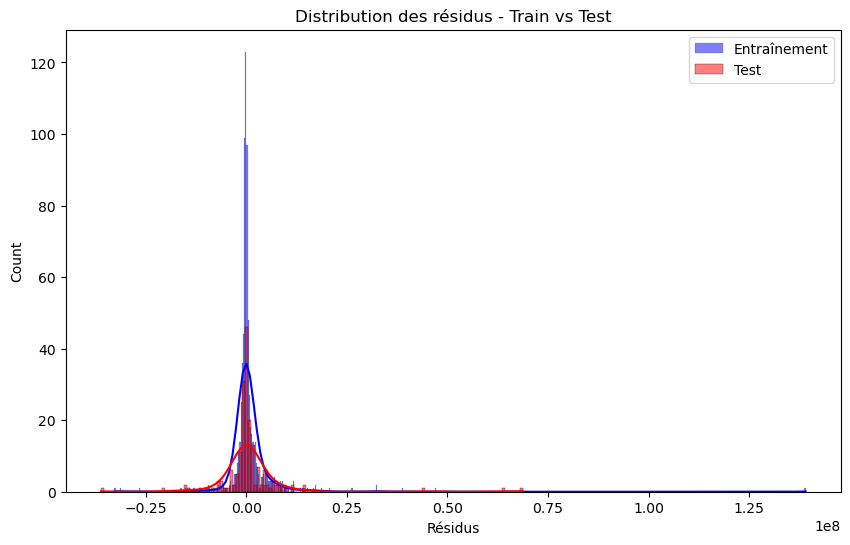

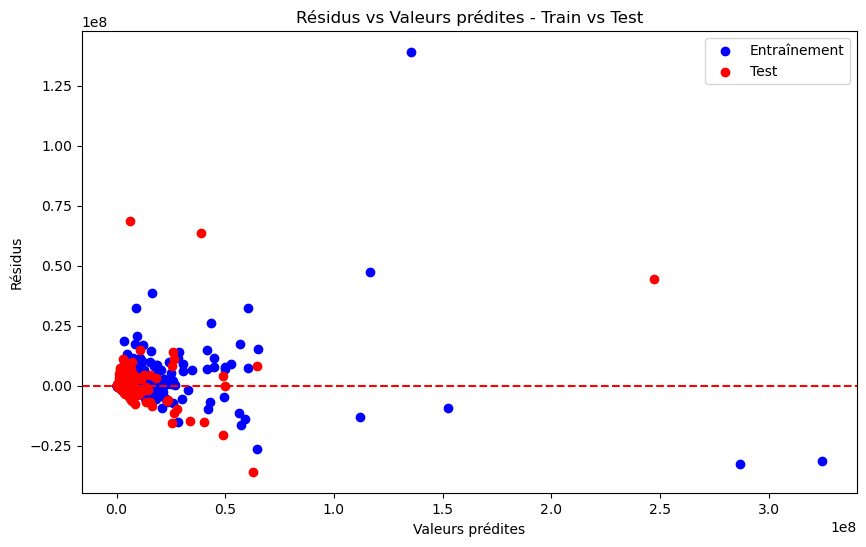

Statistiques des résidus sur l'entraînement :
Moyenne : 826537.1645950733
Écart-type : 6951175.287261845
Médiane : -32855.875

Statistiques des résidus sur le test :
Moyenne : 842691.1428312765
Écart-type : 9109878.390645606
Médiane : 83868.96875

Détail des 10 plus grands résidus sur le test :
      Valeur réelle  Valeur prédite      Résidu
309      75073888.0       6313315.5  68760572.5
1690    102673696.0      38956892.0  63716804.0
618     291614432.0     247303312.0  44311120.0
293      26689658.0      62775192.0 -36085534.0
239      28450436.0      48815568.0 -20365132.0
219      10062436.0      25551916.0 -15489480.0
248      25307744.0      40282160.0 -14974416.0
277      18848780.0      33629732.0 -14780952.0
194      25453690.0      10719001.0  14734689.0
205      40062888.0      25833300.0  14229588.0


In [205]:
# Prédictions sur l'ensemble d'entraînement
y_pred_train_xgb = grid_search_xgb_v1.best_estimator_.predict(X_train)
# Prédictions sur l'ensemble de test
y_pred_test_xgb = grid_search_xgb_v1.best_estimator_.predict(X_test)

# Calcul des résidus sur le train et le test
residus_train_xgb = y_train - y_pred_train_xgb
residus_test_xgb = y_test - y_pred_test_xgb

# Histogramme des résidus sur le train et le test
plt.figure(figsize=(10, 6))
sns.histplot(residus_train_xgb, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test_xgb, kde=True, color="red", label="Test")
plt.title("Distribution des résidus - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites pour les deux ensembles
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_xgb, residus_train_xgb, color="blue", label="Entraînement")
plt.scatter(y_pred_test_xgb, residus_test_xgb, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus sur le train et le test
print("Statistiques des résidus sur l'entraînement :")
print(f"Moyenne : {residus_train_xgb.mean()}")
print(f"Écart-type : {residus_train_xgb.std()}")
print(f"Médiane : {np.median(residus_train_xgb)}")

print("\nStatistiques des résidus sur le test :")
print(f"Moyenne : {residus_test_xgb.mean()}")
print(f"Écart-type : {residus_test_xgb.std()}")
print(f"Médiane : {np.median(residus_test_xgb)}")

# Trouver les 10 plus grands résidus en valeur absolue sur le test
top_10_residus_test_xgb = residus_test_xgb.abs().sort_values(ascending=False).head(10)

# Récupérer les valeurs réelles et prédites correspondantes sur le test
valeurs_reelles_test_xgb = y_test.loc[top_10_residus_test_xgb.index]
valeurs_predites_test_xgb = pd.Series(y_pred_test_xgb, index=y_test.index).loc[top_10_residus_test_xgb.index]

# Créer un DataFrame récapitulatif des 10 plus grands résidus sur le test
df_top10_residus_test_xgb = pd.DataFrame({
    'Valeur réelle': valeurs_reelles_test_xgb,
    'Valeur prédite': valeurs_predites_test_xgb,
    'Résidu': residus_test_xgb.loc[top_10_residus_test_xgb.index]
})

# Afficher les résultats
print("\nDétail des 10 plus grands résidus sur le test :")
print(df_top10_residus_test_xgb)

In [206]:
# Résumé statistique des résidus sur l'entraînement
describe_residus_train = residus_train_xgb.describe()

# Résumé statistique des résidus sur le test
describe_residus_test = residus_test_xgb.describe()

# Affichage des résumés
print("Résumé statistique des résidus sur l'entraînement :")
print(describe_residus_train)

print("\nRésumé statistique des résidus sur le test :")
print(describe_residus_test)

Résumé statistique des résidus sur l'entraînement :
count    7.510000e+02
mean     8.265372e+05
std      6.951175e+06
min     -3.279445e+07
25%     -5.097760e+05
50%     -3.285588e+04
75%      8.235002e+05
max      1.390375e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Résumé statistique des résidus sur le test :
count    1.880000e+02
mean     8.426911e+05
std      9.109878e+06
min     -3.608553e+07
25%     -8.905814e+05
50%      8.386897e+04
75%      1.292180e+06
max      6.876057e+07
Name: SiteEnergyUse(kBtu), dtype: float64


Statistiques des résidus par tranche (Train) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -2.588053e+05  3.808208e+05 -1.841054e+05    151
[1086678.125-1965075.625] -2.450862e+05  6.284142e+05 -1.429429e+05    150
[1965075.625-3897738]     -4.103843e+04  9.314904e+05  4.280731e+04    150
[3897738-9357230]          6.639024e+05  2.198672e+06  5.793181e+05    150
[9357230-28392337]         2.198179e+06  5.019111e+06  2.046814e+06    112
28392337+                  9.393322e+06  2.801842e+07  7.788684e+06     38

Statistiques des résidus par tranche (Test) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -9.909847e+05  1.571403e+06 -4.558864e+05     40
[1086678.125-1965075.625] -7.776414e+05  1.770036e+06 -1.093105e+05     37
[196

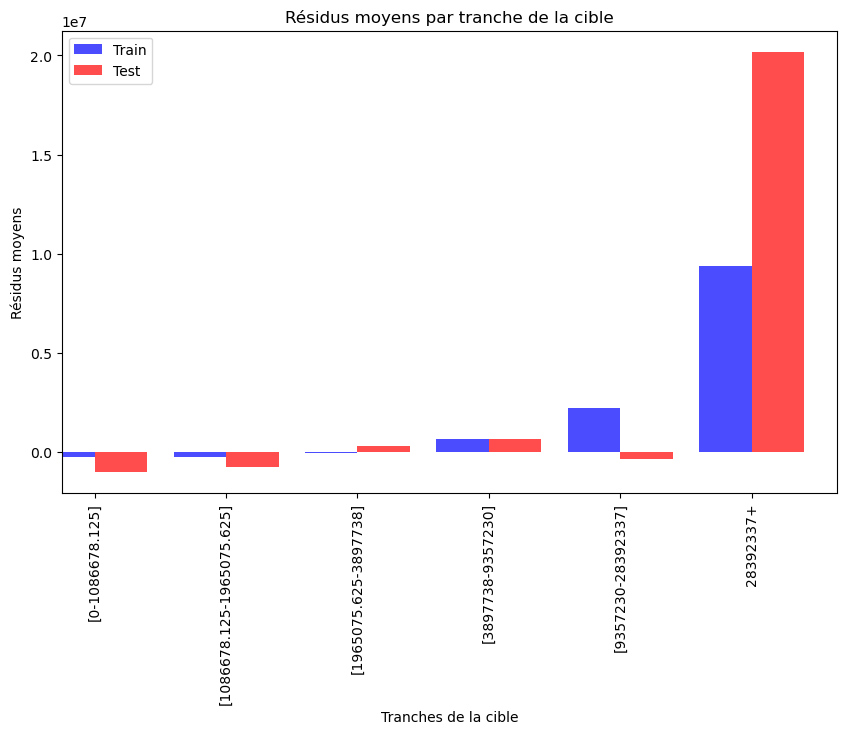

In [207]:
# Définir les tranches basées sur les statistiques de la cible
bins = [0, 1086678.125, 1965075.625, 3897738, 9357230, 28392337, np.inf]  # Tranches basées sur les quantiles et std
labels = ['[0-1086678.125]', '[1086678.125-1965075.625]',
          '[1965075.625-3897738]', '[3897738-9357230]',
          '[9357230-28392337]','28392337+']

# Ajout des tranches à l'ensemble d'entraînement et de test
y_train_bins = pd.cut(y_train, bins=bins, labels=labels)
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)

# Ajouter les résidus dans un DataFrame pour simplifier l'analyse
residus_train_df = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train_xgb, 'Tranche': y_train_bins})
residus_test_df = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test_xgb, 'Tranche': y_test_bins})

# Calculer les statistiques des résidus par tranche
stat_residus_train = residus_train_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test = residus_test_df.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train) :\n", stat_residus_train)
print("\nStatistiques des résidus par tranche (Test) :\n", stat_residus_test)

# Visualiser les résidus moyens par tranche
plt.figure(figsize=(10, 6))
stat_residus_train['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train', width=0.4, position=1)
stat_residus_test['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.show()

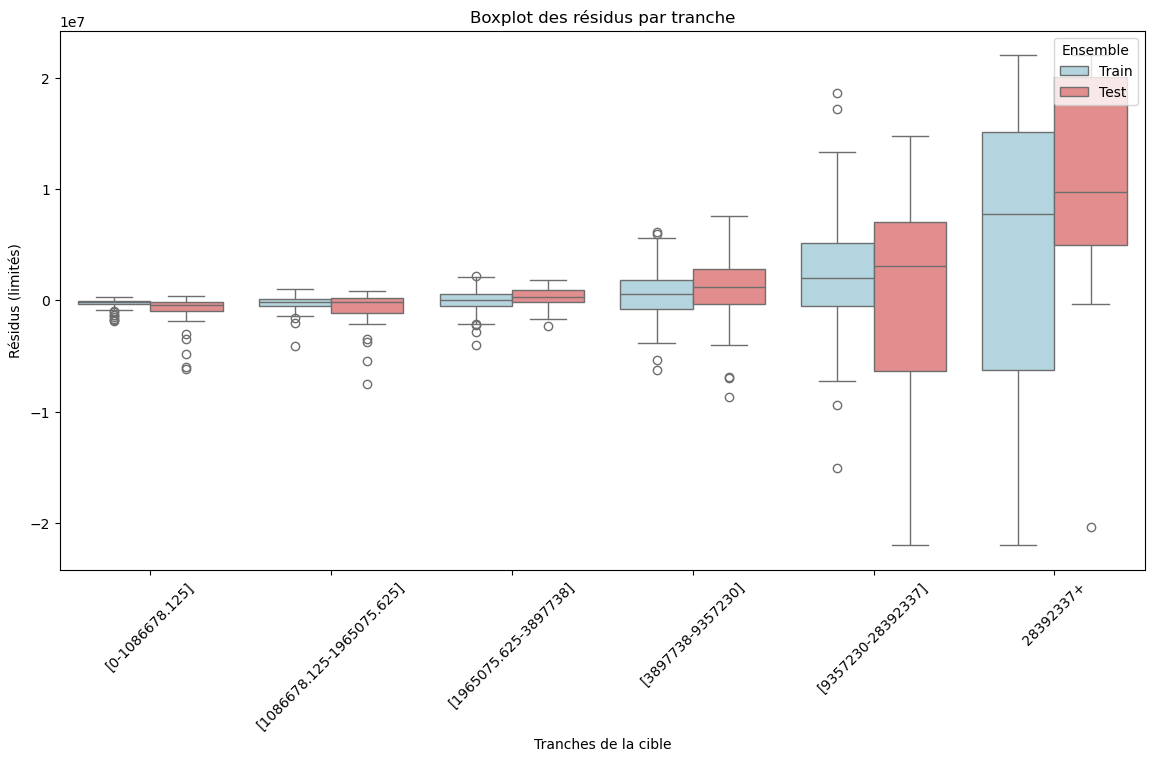

Nombre de valeurs extrêmes : 13
            Cible      Résidus             Tranche Ensemble  Résidu limité
577    37980712.0  -26573568.0           28392337+    Train    -22000000.0
308    55073120.0   38838705.0           28392337+    Train     22000000.0
124   253832464.0  -32794448.0           28392337+    Train    -22000000.0
559    92937640.0   32471452.0           28392337+    Train     22000000.0
558   274682208.0  139037488.0           28392337+    Train     22000000.0
231    69519808.0   26222832.0           28392337+    Train     22000000.0
170   293090784.0  -31311872.0           28392337+    Train    -22000000.0
3203   41680640.0   32580158.0           28392337+    Train     22000000.0
3264  163945984.0   47197224.0           28392337+    Train     22000000.0
1690  102673696.0   63716804.0           28392337+     Test     22000000.0
618   291614432.0   44311120.0           28392337+     Test     22000000.0
293    26689658.0  -36085534.0  [9357230-28392337]     Test    -2200

In [208]:
# Définir une limite pour les résidus
residus_limite = 22000000

# Ajouter une colonne pour différencier les ensembles
residus_train_df['Ensemble'] = 'Train'
residus_test_df['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df, residus_test_df])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

## Ajout de poids

In [209]:
best_model_xgb = pipeline_xgb_v6.set_params(**grid_search_xgb_v1.best_params_)
best_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['LargestPropertyUseTypeGFA',
                                                   'Proportion_Electricité']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode',
                                                   'LargestPropertyUseType']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=3,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [210]:
# Appliquer la transformation log à y_train
y_train_transformed = best_model_xgb.named_steps['model'].transformer.transform(y_train.values.reshape(-1, 1)).ravel()

# Calculer les seuils pour les différentes tranches
seuil_20 = np.percentile(y_train_transformed, 20)
seuil_40 = np.percentile(y_train_transformed, 40)
seuil_60 = np.percentile(y_train_transformed, 60)
seuil_90 = np.percentile(y_train_transformed, 90)
seuil_95 = np.percentile(y_train_transformed, 95)

# Créer le tableau de poids
poids_echantillons = np.ones(len(y_train_transformed))
poids_echantillons[y_train_transformed <= seuil_20] = 4.2
poids_echantillons[(y_train_transformed > seuil_20) & (y_train_transformed <= seuil_60)] = 4.0
poids_echantillons[(y_train_transformed > seuil_60) & (y_train_transformed <= seuil_90)] = 2.0
poids_echantillons[(y_train_transformed > seuil_90) & (y_train_transformed <= seuil_95)] = 1.2

In [211]:
# Appliquer le prétraitement
X_train_preprocessed = best_model_xgb.named_steps['preprocessing'].transform(X_train)

# Réentraîner le modèle Random Forest avec les poids
best_model_xgb.named_steps['model'].regressor_.fit(X_train_preprocessed, y_train_transformed, sample_weight=poids_echantillons)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [212]:
y_pred_train = best_model_xgb.predict(X_train)
y_pred_test = best_model_xgb.predict(X_test)

print("Scores sur l'entraînement :")
print(f"R² (train) : {r2_score(y_train, y_pred_train)}")
print(f"MAE (train) : {mean_absolute_error(y_train, y_pred_train)}")
print(f"RMSE (train) : {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"MAPE (train) : {mean_absolute_percentage_error(y_train, y_pred_train)}")

print("\nScores sur le test :")
print(f"R² (test) : {r2_score(y_test, y_pred_test)}")
print(f"MAE (test) : {mean_absolute_error(y_test, y_pred_test)}")
print(f"RMSE (test) : {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"MAPE (test) : {mean_absolute_percentage_error(y_test, y_pred_test)}")

Scores sur l'entraînement :
R² (train) : 0.8302087611468978
MAE (train) : 2424071.1000936753
RMSE (train) : 8927634.264818925
MAPE (train) : 0.2868474124321148

Scores sur le test :
R² (test) : 0.8817050123444666
MAE (test) : 3378029.6832995745
RMSE (test) : 8388802.8417944
MAPE (test) : 0.7393153084892548


## Analyse des résidus

In [213]:
y_pred_train_weighted = best_model_xgb.predict(X_train)
y_pred_test_weighted = best_model_xgb.predict(X_test)

In [214]:
residus_train_weighted = y_train - y_pred_train_weighted
residus_test_weighted = y_test - y_pred_test_weighted

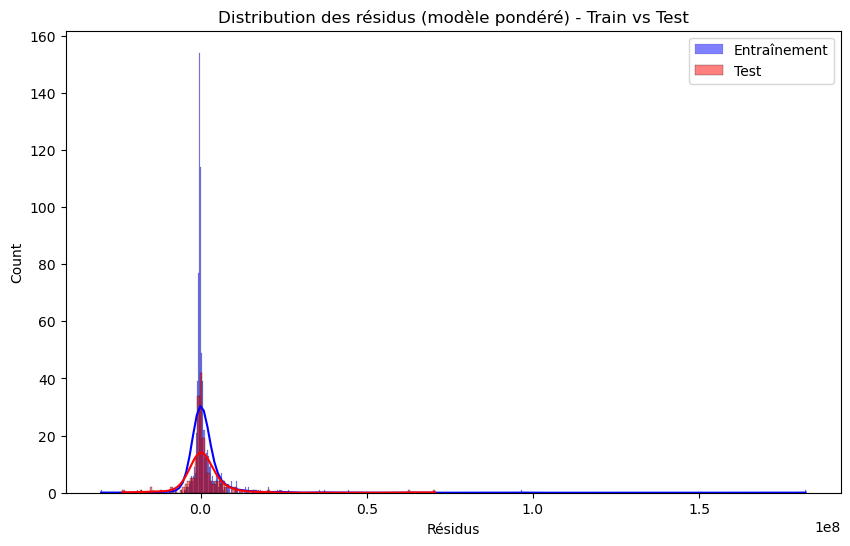

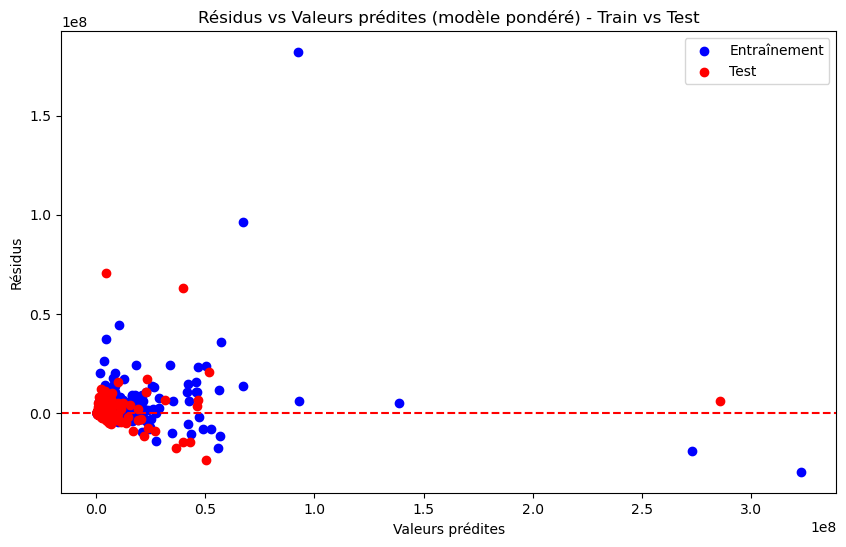

Statistiques des résidus sur l'entraînement (modèle pondéré) :
count    7.510000e+02
mean     1.394566e+06
std      8.823917e+06
min     -2.991773e+07
25%     -3.374564e+05
50%      2.536938e+04
75%      1.035560e+06
max      1.820978e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Statistiques des résidus sur le test (modèle pondéré) :
count    1.880000e+02
mean     1.163575e+06
std      8.329897e+06
min     -2.355469e+07
25%     -6.276143e+05
50%      2.124202e+05
75%      1.531020e+06
max      7.057356e+07
Name: SiteEnergyUse(kBtu), dtype: float64


In [215]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_train_weighted, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test_weighted, kde=True, color="red", label="Test")
plt.title("Distribution des résidus (modèle pondéré) - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_weighted, residus_train_weighted, color="blue", label="Entraînement")
plt.scatter(y_pred_test_weighted, residus_test_weighted, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites (modèle pondéré) - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus
print("Statistiques des résidus sur l'entraînement (modèle pondéré) :")
print(residus_train_weighted.describe())

print("\nStatistiques des résidus sur le test (modèle pondéré) :")
print(residus_test_weighted.describe())

Statistiques des résidus par tranche (Train, modèle pondéré) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -1.896325e+05  2.569765e+05 -1.536852e+05    151
[1086678.125-1965075.625] -1.234606e+05  4.331033e+05 -7.550575e+04    150
[1965075.625-3897738]      1.170119e+05  7.265013e+05  1.530195e+05    150
[3897738-9357230]          1.000779e+06  2.231011e+06  8.412458e+05    150
[9357230-28392337]         2.831959e+06  5.436217e+06  2.410924e+06    112
28392337+                  1.604275e+07  3.482774e+07  1.079706e+07     38

Statistiques des résidus par tranche (Test, modèle pondéré) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -7.622234e+05  1.204588e+06 -4.000768e+05     40
[1086678.125-1965075.625] -5.207062e+05  1.3442

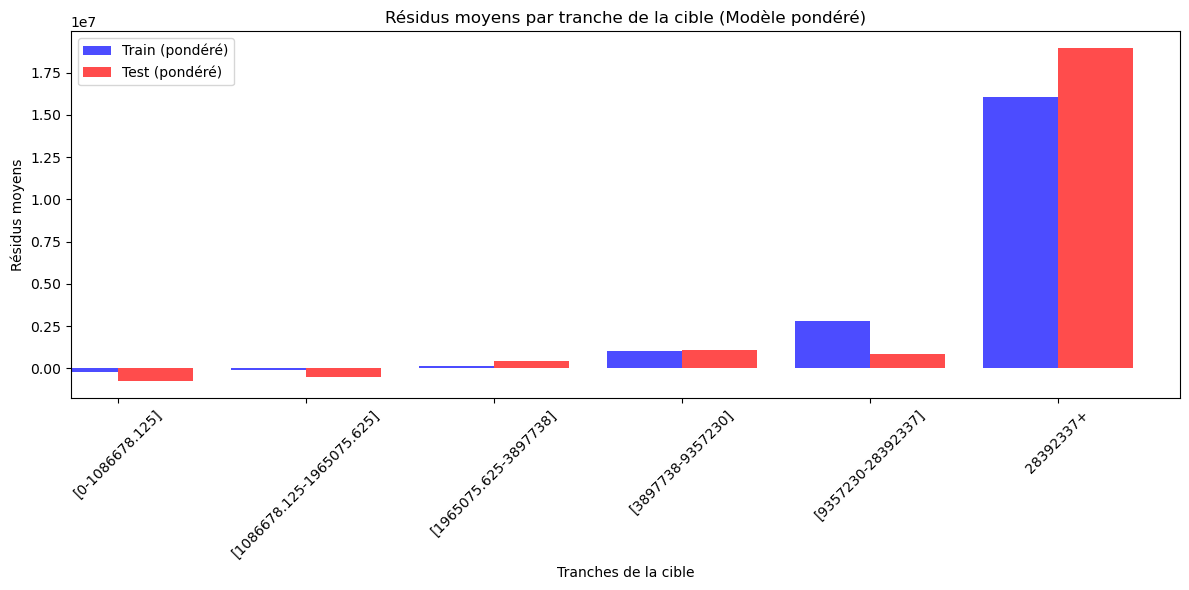

In [216]:
# Analyse par tranche
residus_train_df_weighted = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train_weighted, 'Tranche': y_train_bins})
residus_test_df_weighted = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test_weighted, 'Tranche': y_test_bins})

stat_residus_train_weighted = residus_train_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test_weighted = residus_test_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train, modèle pondéré) :\n", stat_residus_train_weighted)
print("\nStatistiques des résidus par tranche (Test, modèle pondéré) :\n", stat_residus_test_weighted)

# Visualiser les résidus moyens par tranche pour le modèle pondéré
plt.figure(figsize=(12, 6))
stat_residus_train_weighted['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train (pondéré)', width=0.4, position=1)
stat_residus_test_weighted['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test (pondéré)', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible (Modèle pondéré)")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

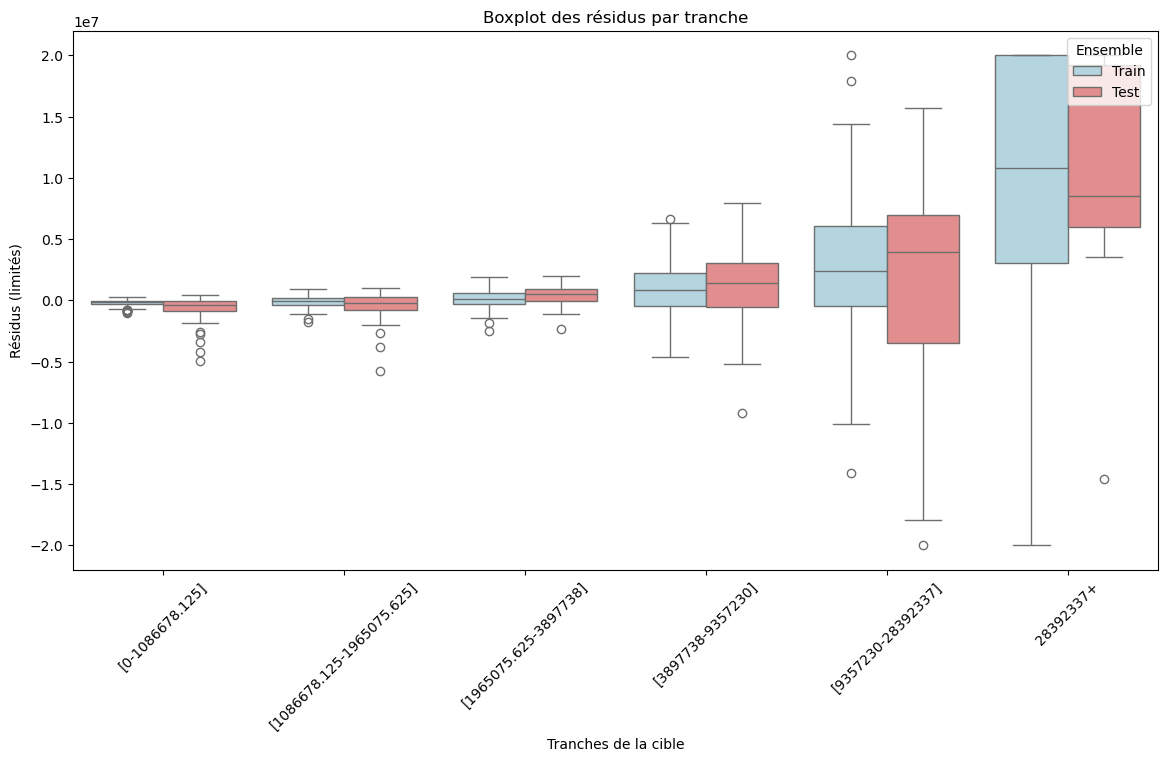

Nombre de valeurs extrêmes : 17
            Cible      Résidus             Tranche Ensemble  Résidu limité
477    74130576.0   23792612.0           28392337+    Train     20000000.0
308    55073120.0   44545612.0           28392337+    Train     20000000.0
559    92937640.0   35887680.0           28392337+    Train     20000000.0
558   274682208.0  182097760.0           28392337+    Train     20000000.0
231    69519808.0   22950060.0           28392337+    Train     20000000.0
3187   57764408.0   24036328.0           28392337+    Train     20000000.0
397    21795830.0   20248100.5  [9357230-28392337]    Train     20000000.0
240    30038490.0   26403884.5           28392337+    Train     20000000.0
170   293090784.0  -29917728.0           28392337+    Train    -20000000.0
193    28731502.0   20274993.0           28392337+    Train     20000000.0
355    42709624.0   24284408.0           28392337+    Train     20000000.0
3203   41680640.0   37160952.5           28392337+    Train     2000

In [217]:
# Définir une limite pour les résidus
residus_limite = 20000000

# Ajouter une colonne pour différencier les ensembles
residus_train_df_weighted['Ensemble'] = 'Train'
residus_test_df_weighted['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df_weighted, residus_test_df_weighted])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

# Conclusion

<Figure size 1000x600 with 0 Axes>

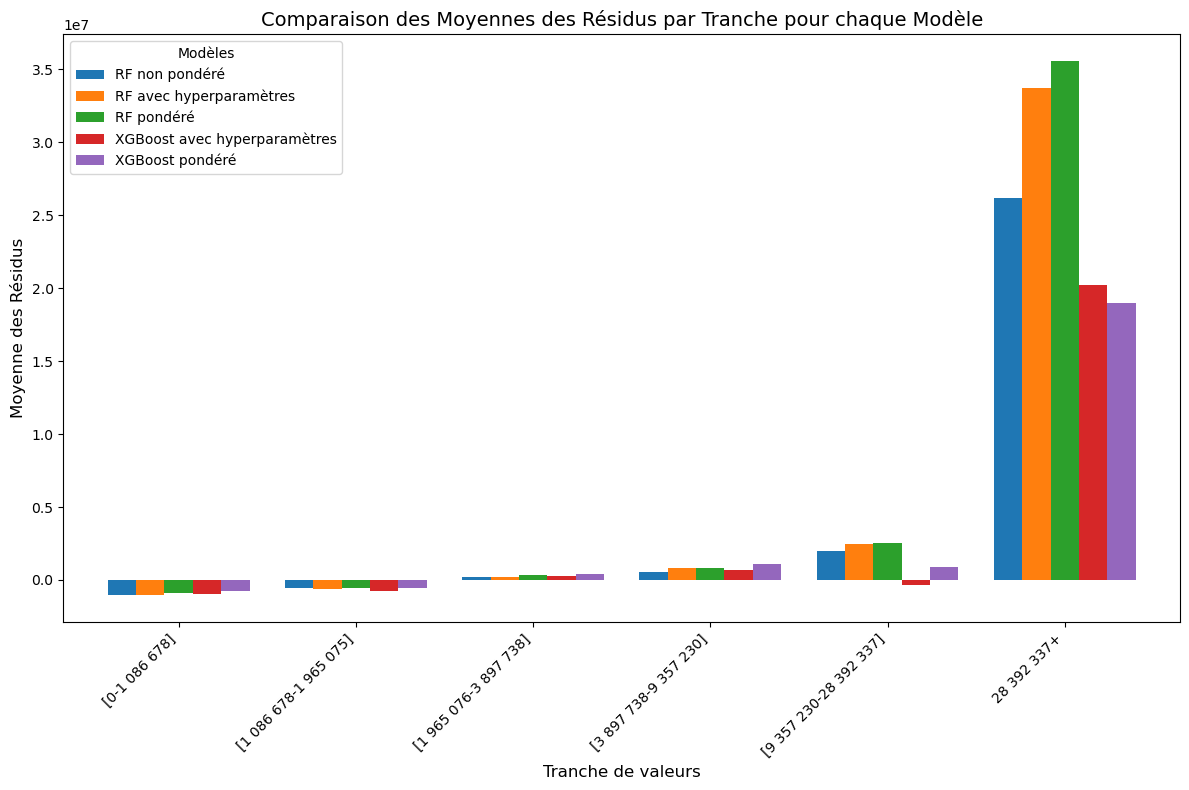

In [218]:
# Créer un DataFrame avec les données des moyennes des résidus pour chaque modèle et tranche
data = {
    'Tranche': ['[0-1 086 678]', '[1 086 678-1 965 075]', '[1 965 076-3 897 738]', 
                '[3 897 738-9 357 230]', '[9 357 230-28 392 337]', '28 392 337+'],
    'RF non pondéré': [-1036048, -521540, 213526, 528094, 1959887, 26190120],
    'RF avec hyperparamètres': [-1056544, -652087, 212967, 804410, 2446060, 33705160],
    'RF pondéré': [-894258, -568699, 367100, 839075, 2502902, 35571220],
    'XGBoost avec hyperparamètres': [-990985, -777641, 283195, 650524, -369492, 20189940],
    'XGBoost pondéré': [-762223, -520706, 416705, 1071364, 859704, 18958190]
}

# Convertir en DataFrame
df = pd.DataFrame(data)

# Tracer le graphique
plt.figure(figsize=(10, 6))
df.set_index('Tranche').plot(kind='bar', figsize=(12, 8), width=0.8)

# Ajouter des titres et labels
plt.title("Comparaison des Moyennes des Résidus par Tranche pour chaque Modèle", fontsize=14)
plt.xlabel("Tranche de valeurs", fontsize=12)
plt.ylabel("Moyenne des Résidus", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Modèles", fontsize=10)
plt.tight_layout()

# Afficher le graphique
plt.show()

**Random Forest non pondéré** :<br>
| Tranche                      | Mean             | Std              | Median          | Count | % Cumulé |
|:-----------------------------|------------------|------------------|----------------|-------|----------|
| [0-1086678.125]              | -1 036 048      | 139 928        | -540171       | 40    | 21.3%    |
| [1086678.125-1965075.625]    | -521 540        | 1 385 883      | -88477        | 37    | 40.1%    |
| [1965075.625-3897738]        | 213 526         | 899 083        | 354825        | 36    | 60.1%    |
| [3897738-9357230]            | **528 094**     | 3 763 051      | 1 187 649     | 38    | 80.3%    |
| [9357230-28392337]           | 1 959 887       | 7 800 564      | 3 578 802     | 27    | 95.0%    |
| 28392337+                    | 26 190 120      | 35 054 410     | 17 176 070    | 10    | 100.0%   |


**Random Forest avec hyperparamètres** :<br>
| Tranche                      | Mean         | Std          | Median       | Count | % Cumulé |
|:-----------------------------|-------------|-------------|-------------|-------|----------|
| [0-1 086 678]               | -1 056 544  | 1 212 145   | -724 541    | 40    | 21.3%    |
| [1 086 678-1 965 075]       | -652 087    | 1 397 035   | -242 483    | 37    | 40.1%    |
| [1 965 076-3 897 738]       | **212 967**     | 860 829     | 126 955     | 36    | 60.1%    |
| [3 897 738-9 357 230]       | 804 410     | 3 942 679   | 1 446 470   | 38    | 80.3%    |
| [9 357 230-28 392 337]      | 2 446 060   | 8 017 409   | 3 760 835   | 27    | 95.0%    |
| 28 392 337+                 | 33 705 160  | 44 427 560  | 21 021 470  | 10    | 100.0%   |


**Random Forest pondéré** :<br>
| Tranche                      | Mean         | Std          | Median       | Count | % Cumulé |
|:-----------------------------|-------------|-------------|-------------|-------|----------|
| [0-1 086 678]               | -894 258    | 1 262 015   | -497 001    | 40    | 21.3%    |
| [1 086 678-1 965 075]       | -568 699    | 1 617 489   | -39 980     | 37    | 40.1%    |
| [1 965 076-3 897 738]       | 367 100     | 882 888     | 378 295     | 36    | 60.1%    |
| [3 897 738-9 357 230]       | 839 075     | 3 933 251   | 1 329 865   | 38    | 80.3%    |
| [9 357 230-28 392 337]      | 2 502 902   | 8 094 751   | 4 458 366   | 27    | 95.0%    |
| 28 392 337+                 | 35 571 220  | 44 805 980  | 20 964 510  | 10    | 100.0%   |


**XGBoost avec hyperparamètres** :<br>
| Tranche                      | Mean         | Std          | Median       | Count | % Cumulé |
|:-----------------------------|-------------|-------------|-------------|-------|----------|
| [0-1 086 678]               | -990 985    | 1 571 403   | -455 886    | 40    | 21.3%    |
| [1 086 678-1 965 075]       | -777 641    | 1 770 036   | -109 311    | 37    | 40.1%    |
| [1 965 076-3 897 738]       | 283 195     | 967 755     | 312 435     | 36    | 60.1%    |
| [3 897 738-9 357 230]       | 650 524     | 3 574 310   | 1 160 469   | 38    | 80.3%    |
| [9 357 230-28 392 337]      | **-369 492**    | 11 109 490  | 3 060 858   | 27    | 95.0%    |
| 28 392 337+                 | 20 189 940  | 28 998 950  | 9 757 908   | 10    | 100.0%   |

**XGBoost pondéré** :<br>
| Tranche                      | Mean         | Std          | Median       | Count | % Cumulé |
|:-----------------------------|-------------|-------------|-------------|-------|----------|
| [0-1 086 678]               | **-762 223**   | 1 204 588   | -400 077    | 40    | 21.3%    |
| [1 086 678-1 965 075]       | **-520 706**    | 1 344 288   | -242 740    | 37    | 40.1%    |
| [1 965 076-3 897 738]       | 416 705     | 911 658     | 509 839     | 36    | 60.1%    |
| [3 897 738-9 357 230]       | 1 071 364   | 3 487 326   | 1 432 134   | 38    | 80.3%    |
| [9 357 230-28 392 337]      | 859 704     | 9 615 466   | 3 978 636   | 27    | 95.0%    |
| 28 392 337+                 | **18 958 190** | 26 932 260  | 8 505 346   | 10    | 100.0%   |


Parmi les différents modèles testés (Random Forest, XGBoost et leurs versions pondérées), le modèle XGBoost pondéré se distingue comme le meilleur choix pour cette analyse.

**Gestion des erreurs en fonction de l'échelle des valeurs** :<br>
L'un des facteurs clés qui favorise XGBoost pondéré est sa capacité à ajuster les erreurs en fonction de l'échelle des valeurs dans chaque tranche de données. En d'autres termes, il attribue plus de poids aux erreurs dans les tranches où les valeurs sont petites et moins de poids aux erreurs dans les tranches plus élevées. Cela est particulièrement important, car une erreur dans une tranche avec des valeurs relativement faibles (par exemple, autour de 1 million) aurait un impact significatif sur l'analyse. En revanche, une erreur similaire dans une tranche avec des valeurs plus élevées (par exemple, au-delà de 20 millions) a un impact relatif bien moindre.

**Impact de l'échelle sur les erreurs** :<br>
Les modèles non pondérés et même ceux avec des hyperparamètres ne tiennent pas suffisamment compte de l'échelle des valeurs entre les différentes tranches. Par exemple, dans les tranches supérieures (où les valeurs peuvent atteindre plusieurs millions), une erreur de l'ordre de quelques centaines de milliers est beaucoup moins "grave" que dans les tranches inférieures. XGBoost pondéré ajuste cette problématique en réduisant l'impact des erreurs dans les tranches plus faibles et en équilibrant le modèle de manière plus équitable à travers toutes les tranches.

**Performance globale** :<br>
XGBoost pondéré présente une progression des erreurs qui est plus cohérente avec l'échelle des données. Les erreurs commencent relativement faibles dans les premières tranches et augmentent progressivement avec les valeurs plus élevées, ce qui est logique dans un contexte où les valeurs sont exponentiellement plus grandes. Ce comportement indique que le modèle gère bien les valeurs extrêmes, tout en minimisant l'impact des erreurs dans les petites valeurs. Il offre ainsi une performance plus robuste et plus équilibrée sur l'ensemble des tranches de données.

**Pourquoi le modèle pondéré est préférable** :<br>
En appliquant la pondération, XGBoost réussit à offrir une meilleure "justesse" sur les petites valeurs tout en permettant une certaine flexibilité pour les valeurs plus élevées. Dans un modèle sans pondération, les erreurs dans les tranches supérieures (qui ont des valeurs beaucoup plus grandes) peuvent fausser l’analyse, rendant le modèle moins précis pour ces tranches où les conséquences d’une erreur sont moins critiques.

**Conclusion générale** :
En résumé, XGBoost pondéré est le modèle le plus adapté pour ce cas d'étude, car il parvient à équilibrer l'impact des erreurs tout au long des différentes tranches de données. Il prend en compte la variabilité des échelles de valeurs et permet ainsi un ajustement plus précis et réaliste des prévisions, en particulier sur les tranches à haute échelle. Ce modèle offre une robustesse supérieure et est mieux calibré pour les données à grande échelle, ce qui le rend particulièrement efficace dans ce contexte.

# Feature importance du modèle XGBoost

                                              Feature  Importance
13                  remainder__PropertyGFABuilding(s)    0.198491
9                          discretize__NumberofFloors    0.166907
6   cat__LargestPropertyUseType_Commerce, distribu...    0.096631
7   cat__LargestPropertyUseType_Hôtellerie et lieu...    0.064280
0                          cat__CouncilDistrictCode_2    0.064134
12                       remainder__NumberofBuildings    0.057946
11                          remainder__Proportion_Gaz    0.052747
10                           remainder__age_propriete    0.052429
5                          cat__CouncilDistrictCode_7    0.048776
3                          cat__CouncilDistrictCode_5    0.047854
2                          cat__CouncilDistrictCode_4    0.045993
8   cat__LargestPropertyUseType_Installations spéc...    0.040266
4                          cat__CouncilDistrictCode_6    0.038086
1                          cat__CouncilDistrictCode_3    0.025460


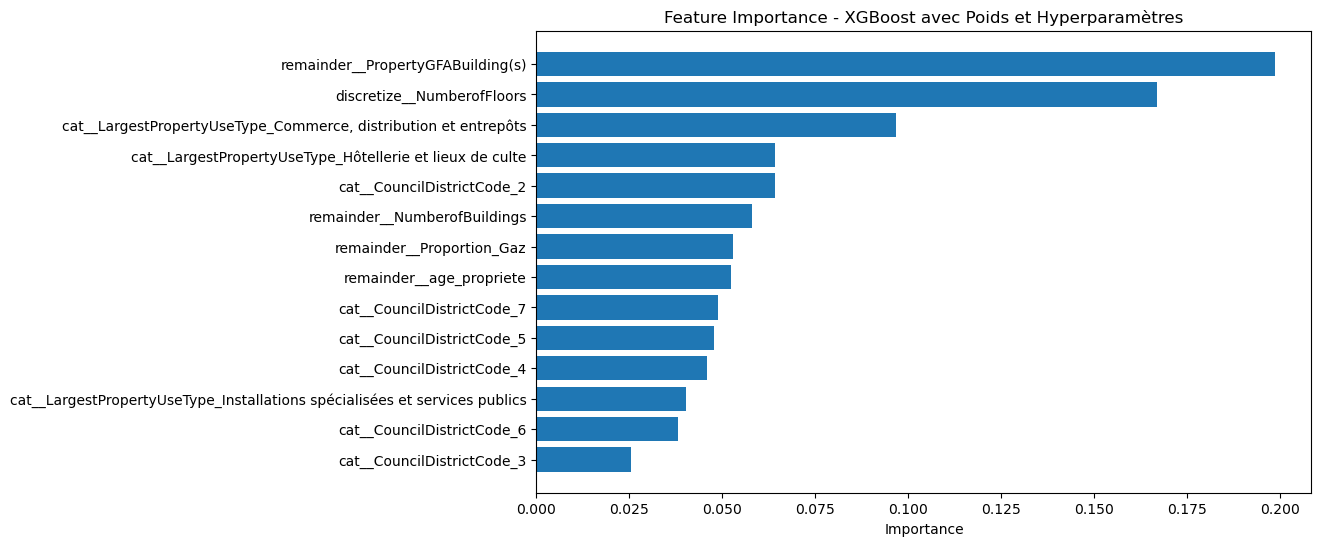

In [219]:
# Entraîner le modèle avec les meilleurs paramètres et en tenant compte des poids
pipeline_xgb_v6.fit(X_train, y_train, model__sample_weight=poids_echantillons)

# Récupérer le modèle XGBoost du pipeline après l'entraînement
xgb_model = pipeline_xgb_v6.named_steps['model'].regressor_

# Extraire l'importance des caractéristiques
importances = xgb_model.feature_importances_

# Extraire les noms des caractéristiques après transformation
column_names = preprocessing_v18.get_feature_names_out()

# Créer un DataFrame avec les importances
importance_df = pd.DataFrame({
    'Feature': column_names,
    'Importance': importances
})

# Trier par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des caractéristiques
print(importance_df)

# Visualisation graphique
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost avec Poids et Hyperparamètres')
plt.gca().invert_yaxis()  # Pour avoir la plus grande importance en haut
plt.show()


Caractéristiques les plus importantes :<br>
- PropertyGFABuilding(s) : Cette variable reste la plus importante avec une valeur d'importance de 0.1985. Cela indique qu'elle joue un rôle majeur dans la prédiction de la cible.
- NumberofFloors (discrétisée) : Avec une importance de 0.1669, cette caractéristique, transformée par discretisation, reste un facteur significatif pour les prédictions du modèle.
- NumberofBuildings : L'importance de 0.0579 indique que cette variable contribue également à la performance du modèle, bien qu'à un niveau inférieur à celui des deux précédentes.

Caractéristiques liées à l'utilisation des propriétés :<br>
Les variables LargestPropertyUseType_ (par exemple, Commerce, distribution, Hôtellerie et lieux de réunion) ont des importances respectives de 0.0966 et 0.0643. Elles influencent les prédictions du modèle de manière notable, bien que leur impact soit plus faible que celui des caractéristiques précédentes.

Caractéristiques géographiques :<br>
Les variables CouncilDistrictCode_ (telles que CouncilDistrictCode_2, CouncilDistrictCode_7) présentent une importance modérée, comprise entre 0.0255 et 0.0641. Elles ont un impact significatif sur les prédictions, mais restent inférieures aux caractéristiques liées à l'utilisation des propriétés.

Autres caractéristiques :<br>
age_propriete et Proportion_Gaz ont des importances respectives de 0.0524 et 0.0527. Bien qu'elles ne soient pas les plus importantes, elles ont néanmoins un effet mesurable sur le modèle.

# Interprétation du modèle avec SHAP

In [221]:
# Récupérer le modèle XGBoost du pipeline (avec les meilleurs paramètres)
xgb_model = pipeline_xgb_v6.named_steps['model'].regressor_

# Préparer les données de test prétraitées
X_test_preprocessed = pipeline_xgb_v6.named_steps['preprocessing'].transform(X_test)

# Appliquer les poids d'échantillons sur le modèle
# Les poids sont utilisés pour entraîner le modèle mais n'ont pas d'impact direct sur l'explainer SHAP.
# Cependant, nous allons nous assurer que les prédictions sont faites avec les poids d'échantillons appliqués.

# Créer un explainer SHAP basé sur le modèle XGBoost
explainer = shap.Explainer(xgb_model)

# Calculer les valeurs SHAP pour les données de test
shap_values = explainer(X_test_preprocessed)

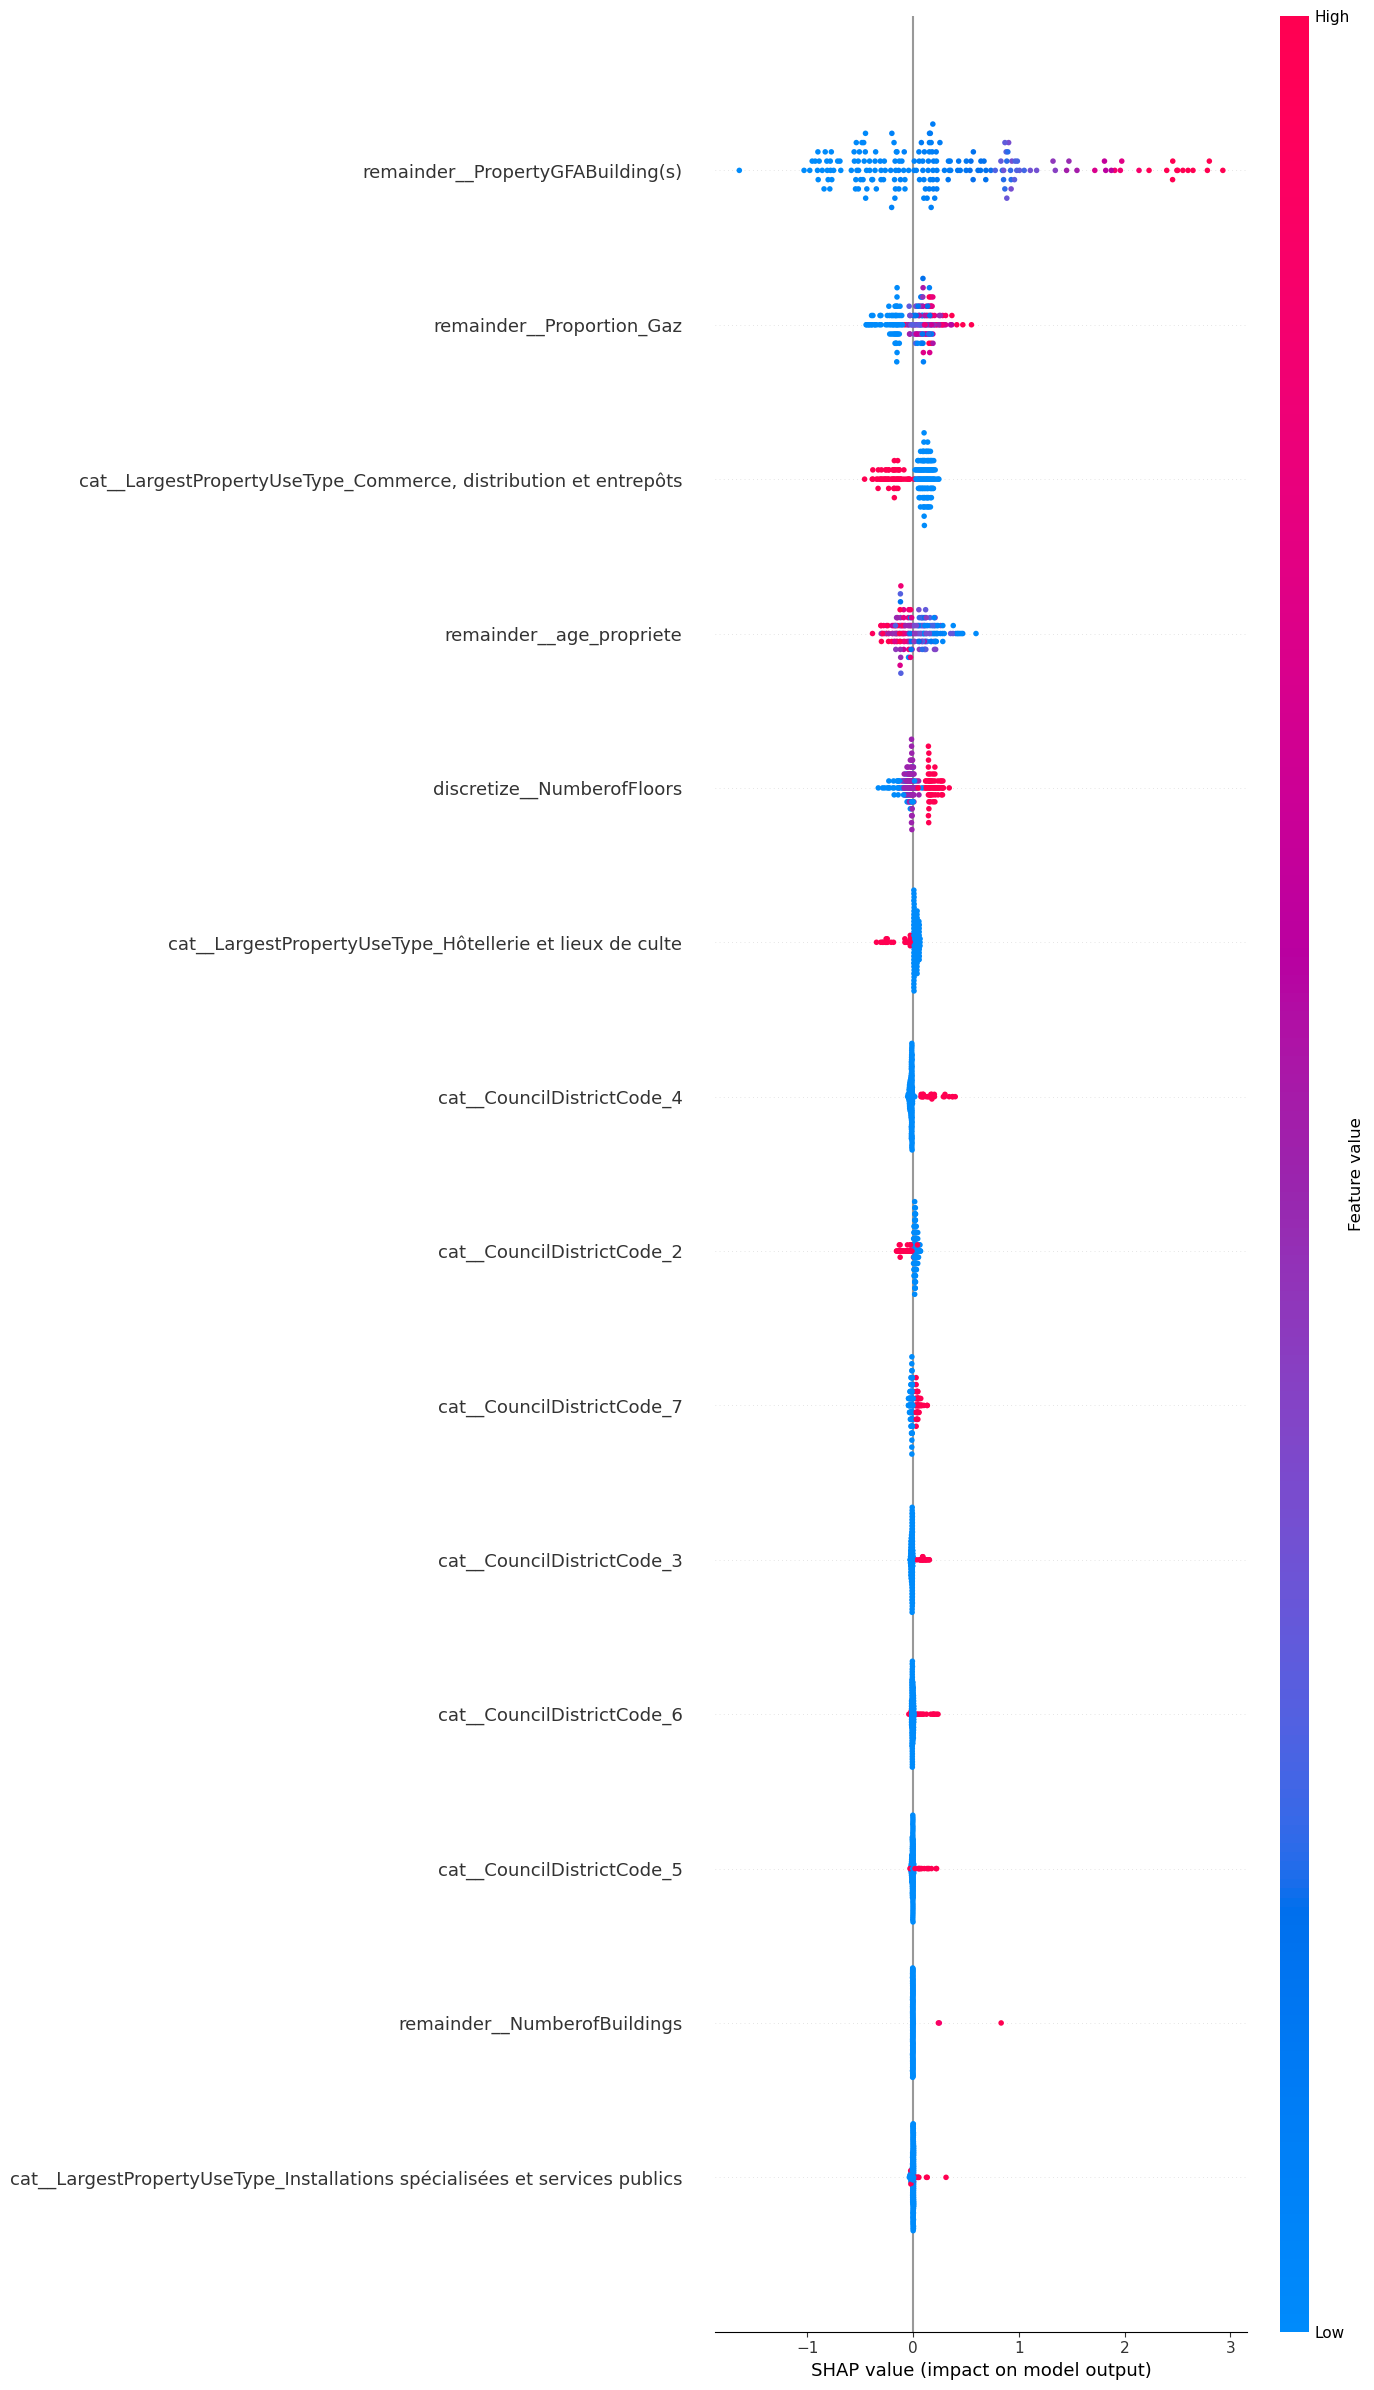

In [222]:
# Visualisation de l'importance globale des caractéristiques avec SHAP
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=pipeline_xgb_v6.named_steps['preprocessing'].get_feature_names_out(), plot_size=(14, 24), max_display=20)

- **PropertyGFABuilding(s)**<br>
Points bleus à gauche : Les petits bâtiments ont tendance à diminuer la prédiction.<br>
Points rouges à droite : Les grands bâtiments ont tendance à augmenter la prédiction.<br>
Cohérent car on a vu que des bâtiments plus grands ont tendance à consommer plus d'énergie.

- **Proportion_Gaz**<br>
Points bleus à gauche : Une faible proportion de gaz tend à diminuer la prédiction.<br>
Points rouges à droite : Une forte proportion de gaz tend à augmenter la prédiction.<br>
Une plus grande proportion de gaz dans la consommation énergétique est associée à une augmentation de la consommation d'énergie<br> 

- **Commerce, distribution et entrepôts**<br>
Points rouges à gauche : Les bâtiments dont l'usage principal est commerce etc tendent à diminuer la prédiction.<br>
Points bleus à droite :Les bâtiments dont l'usage principal n'est pas commerce etc tendent à augmenter la prédiction.<br>
Ce type de propriété présente des consommations moyennes plus basses que les autres types.

- **age_propriété**<br>
Points rouges à gauche : Les propriétés plus vieilles tendent à diminuer la prédiction.<br>
Points bleus à droite : Les propriétés plus vieilles tendent à augmenter la prédiction.<br>
Cohérent car les bâtiments plus vieux ont tendance à être plus petits et donc par conséquent à consommer moins d'energie.

- **NumberofFloors**<br>
Points bleus à gauche : Les bâtiments avec moins d'étages ont tendance à diminuer la prédiction.<br>
Points rouges à droite : Les bâtiments avec plus d'étages ont tendance à augmenter la prédiction.<br>
Cohérent car on a vu que les bâtiments avec plus d'étages génèrent consomment plus d'energie.

- **hôtellerie et lieu de culte**<br>
Points rouges à gauche : Ces bâtiments tendent à diminuer la prédiction.<br>
Points bleus à droite : Quand ce ne sont pas ces bâtiments cela a tendance à augmenter la prédiction.<br>
Cohérents car on a vu que les batiments les bâtiments de l'hôtellerie et lieu de culte consomment moins d'energie. 

# Ajout de la variable ENERGYSTARScore

In [223]:
X_Energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 3347
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LargestPropertyUseType     939 non-null    object  
 1   CouncilDistrictCode        939 non-null    category
 2   age_propriete              939 non-null    int64   
 3   Proportion_Electricité     939 non-null    float64 
 4   Proportion_Gaz             939 non-null    float64 
 5   NumberofBuildings          939 non-null    int32   
 6   NumberofFloors             939 non-null    int64   
 7   PropertyGFABuilding(s)     939 non-null    int64   
 8   LargestPropertyUseTypeGFA  939 non-null    float64 
 9   ENERGYSTARScore            939 non-null    float64 
dtypes: category(1), float64(4), int32(1), int64(3), object(1)
memory usage: 70.7+ KB


In [224]:
# Création des bins pour stratification
y_bins = pd.qcut(y, q=170, labels=False) 
# Séparer les données en train (80%) et test (20%) avec stratification
X_Energy_train, X_Energy_test, y_train, y_test = train_test_split(
    X_Energy, y, test_size=0.2, random_state=42, stratify=y_bins
)

In [225]:
# Nous utilisons KBinsDiscretizer pour créer des intervalles de tailles égales.
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Colonnes catégorielles à encoder 
var_categorielle = ['CouncilDistrictCode', 'LargestPropertyUseType']#'LargestPropertyUseType', 

# Pipeline de prétraitement
preprocessing_v18 = ColumnTransformer(
        transformers=[
            ('drop', 'drop', ['LargestPropertyUseTypeGFA', 'Proportion_Electricité']),#'age_propriete',
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), var_categorielle),
            ('discretize', floor_discretizer, ['NumberofFloors'])  # Découpe en classes sur 'NumberofFloors'
        ],
        remainder='passthrough',
        force_int_remainder_cols=False
    )

# Pipeline avec Random Forest et transformation de la cible
pipeline_xgb_v6 = Pipeline([
    ('preprocessing', preprocessing_v18),  # Appliquer le prétraitement sur X
    ('model', TransformedTargetRegressor(
        regressor=xgb.XGBRegressor(random_state=42),
        transformer=log_transformer_y,
        check_inverse=True
    ))
])

In [226]:
# Ajuster le transformeur sur les données
preprocessing_v18.fit(X_Energy_train)

print(preprocessing_v18.get_feature_names_out())

['cat__CouncilDistrictCode_2' 'cat__CouncilDistrictCode_3'
 'cat__CouncilDistrictCode_4' 'cat__CouncilDistrictCode_5'
 'cat__CouncilDistrictCode_6' 'cat__CouncilDistrictCode_7'
 'cat__LargestPropertyUseType_Commerce, distribution et entrepôts'
 'cat__LargestPropertyUseType_Hôtellerie et lieux de culte'
 'cat__LargestPropertyUseType_Installations spécialisées et services publics'
 'discretize__NumberofFloors' 'remainder__age_propriete'
 'remainder__Proportion_Gaz' 'remainder__NumberofBuildings'
 'remainder__PropertyGFABuilding(s)' 'remainder__ENERGYSTARScore']


In [227]:
best_model_xgb = pipeline_xgb_v6.set_params(**grid_search_xgb_v1.best_params_)
best_model_xgb.fit(X_Energy_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['LargestPropertyUseTypeGFA',
                                                   'Proportion_Electricité']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['CouncilDistrictCode',
                                                   'LargestPropertyUseType']),
                                                 ('discretize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=3,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...),
                                            transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                                            inverse_func=<ufunc 'expm1'>,
                                                                            validate=True)))])

In [228]:
# Appliquer la transformation log à y_train
y_train_transformed = best_model_xgb.named_steps['model'].transformer.transform(y_train.values.reshape(-1, 1)).ravel()

# Calculer les seuils pour les différentes tranches
seuil_20 = np.percentile(y_train_transformed, 20)
seuil_40 = np.percentile(y_train_transformed, 40)
seuil_90 = np.percentile(y_train_transformed, 90)
seuil_95 = np.percentile(y_train_transformed, 95)

# Créer le tableau de poids
poids_echantillons = np.ones(len(y_train_transformed))
poids_echantillons[y_train_transformed <= seuil_20] = 4.2
poids_echantillons[(y_train_transformed > seuil_20) & (y_train_transformed <= seuil_60)] = 4.0
poids_echantillons[(y_train_transformed > seuil_60) & (y_train_transformed <= seuil_90)] = 2.0
poids_echantillons[(y_train_transformed > seuil_90) & (y_train_transformed <= seuil_95)] = 1.2

In [229]:
# Appliquer le prétraitement
X_train_preprocessed = best_model_xgb.named_steps['preprocessing'].transform(X_Energy_train)

# Réentraîner le modèle Random Forest avec les poids
best_model_xgb.named_steps['model'].regressor_.fit(X_train_preprocessed, y_train_transformed, sample_weight=poids_echantillons)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [230]:
y_pred_train = best_model_xgb.predict(X_Energy_train)
y_pred_test = best_model_xgb.predict(X_Energy_test)

print("Scores sur l'entraînement :")
print(f"R² (train) : {r2_score(y_train, y_pred_train)}")
print(f"MAE (train) : {mean_absolute_error(y_train, y_pred_train)}")
print(f"RMSE (train) : {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"MAPE (train) : {mean_absolute_percentage_error(y_train, y_pred_train)}")

print("\nScores sur le test :")
print(f"R² (test) : {r2_score(y_test, y_pred_test)}")
print(f"MAE (test) : {mean_absolute_error(y_test, y_pred_test)}")
print(f"RMSE (test) : {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"MAPE (test) : {mean_absolute_percentage_error(y_test, y_pred_test)}")

Scores sur l'entraînement :
R² (train) : 0.8214647919561265
MAE (train) : 1984574.8520925432
RMSE (train) : 9154627.735286055
MAPE (train) : 0.21213013126896554

Scores sur le test :
R² (test) : 0.8705469790605203
MAE (test) : 3127149.7889398667
RMSE (test) : 8775521.01719217
MAPE (test) : 0.585165189202856


## Analyse des résidus

In [231]:
y_pred_train_weighted = best_model_xgb.predict(X_Energy_train)
y_pred_test_weighted = best_model_xgb.predict(X_Energy_test)

In [232]:
residus_train_weighted = y_train - y_pred_train_weighted
residus_test_weighted = y_test - y_pred_test_weighted

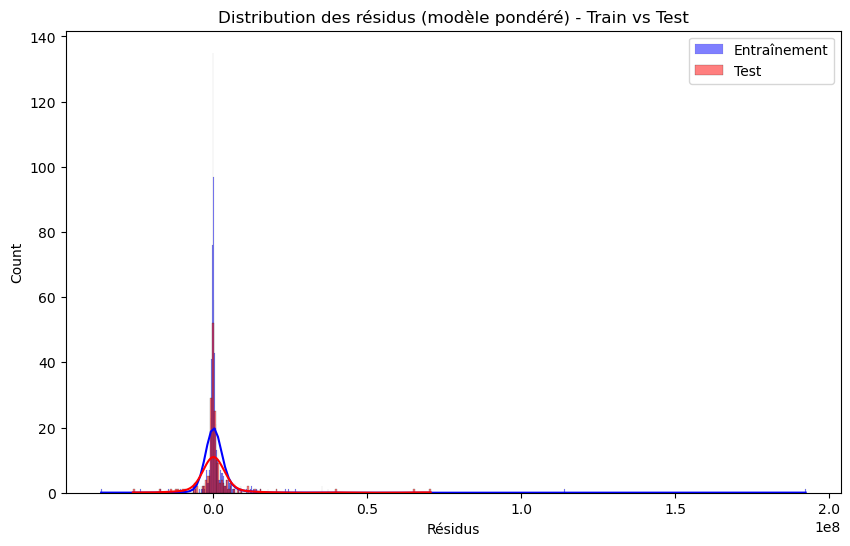

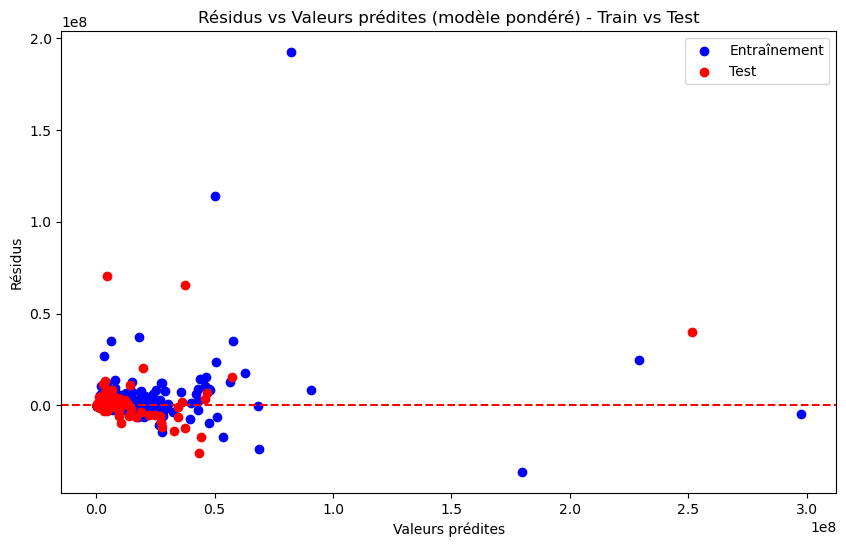

Statistiques des résidus sur l'entraînement (modèle pondéré) :
count    7.510000e+02
mean     1.059671e+06
std      9.099151e+06
min     -3.641317e+07
25%     -2.881481e+05
50%      3.803000e+03
75%      5.781370e+05
max      1.923557e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Statistiques des résidus sur le test (modèle pondéré) :
count    1.880000e+02
mean     9.644908e+05
std      8.745649e+06
min     -2.612859e+07
25%     -6.664681e+05
50%      1.699462e+04
75%      9.744520e+05
max      7.058172e+07
Name: SiteEnergyUse(kBtu), dtype: float64


In [233]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus_train_weighted, kde=True, color="blue", label="Entraînement")
sns.histplot(residus_test_weighted, kde=True, color="red", label="Test")
plt.title("Distribution des résidus (modèle pondéré) - Train vs Test")
plt.xlabel("Résidus")
plt.legend()
plt.show()

# Graphique de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_weighted, residus_train_weighted, color="blue", label="Entraînement")
plt.scatter(y_pred_test_weighted, residus_test_weighted, color="red", label="Test")
plt.title("Résidus vs Valeurs prédites (modèle pondéré) - Train vs Test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Statistiques des résidus
print("Statistiques des résidus sur l'entraînement (modèle pondéré) :")
print(residus_train_weighted.describe())

print("\nStatistiques des résidus sur le test (modèle pondéré) :")
print(residus_test_weighted.describe())

Statistiques des résidus par tranche (Train, modèle pondéré) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -1.095930e+05  2.019903e+05 -7.540456e+04    151
[1086678.125-1965075.625] -1.026474e+05  3.476656e+05 -1.039141e+05    150
[1965075.625-3897738]      5.638796e+04  5.653935e+05  9.475169e+04    150
[3897738-9357230]          7.532786e+05  1.841609e+06  4.867228e+05    150
[9357230-28392337]         1.389438e+06  4.286952e+06  1.400224e+06    112
28392337+                  1.449188e+07  3.750186e+07  8.453712e+06     38

Statistiques des résidus par tranche (Test, modèle pondéré) :
                                    mean           std        median  count
Tranche                                                                   
[0-1086678.125]           -6.625003e+05  1.607956e+06 -2.215983e+05     40
[1086678.125-1965075.625] -4.659868e+05  9.6801

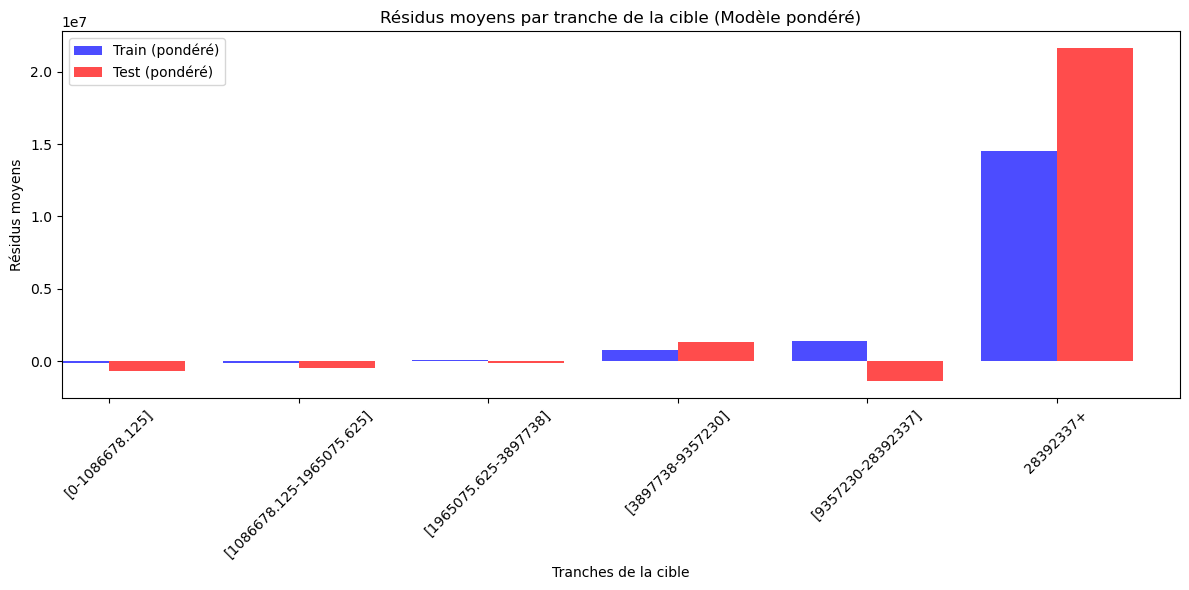

In [234]:
# Analyse par tranche
residus_train_df_weighted = pd.DataFrame({'Cible': y_train, 'Résidus': residus_train_weighted, 'Tranche': y_train_bins})
residus_test_df_weighted = pd.DataFrame({'Cible': y_test, 'Résidus': residus_test_weighted, 'Tranche': y_test_bins})

stat_residus_train_weighted = residus_train_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])
stat_residus_test_weighted = residus_test_df_weighted.groupby('Tranche', observed=False)['Résidus'].agg(['mean', 'std', 'median', 'count'])

print("Statistiques des résidus par tranche (Train, modèle pondéré) :\n", stat_residus_train_weighted)
print("\nStatistiques des résidus par tranche (Test, modèle pondéré) :\n", stat_residus_test_weighted)

# Visualiser les résidus moyens par tranche pour le modèle pondéré
plt.figure(figsize=(12, 6))
stat_residus_train_weighted['mean'].plot(kind='bar', color='blue', alpha=0.7, label='Train (pondéré)', width=0.4, position=1)
stat_residus_test_weighted['mean'].plot(kind='bar', color='red', alpha=0.7, label='Test (pondéré)', width=0.4, position=0)
plt.title("Résidus moyens par tranche de la cible (Modèle pondéré)")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus moyens")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

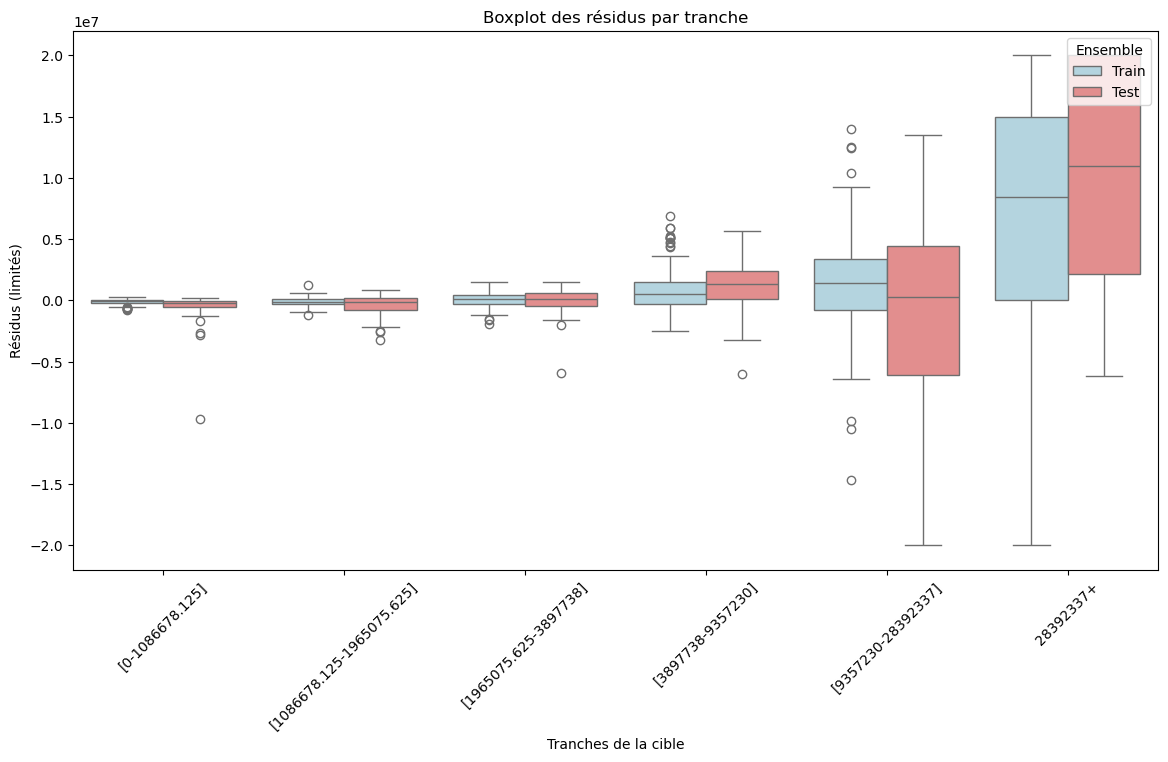

Nombre de valeurs extrêmes : 15
            Cible       Résidus             Tranche Ensemble  Résidu limité
477    74130576.0  2.339868e+07           28392337+    Train     20000000.0
308    55073120.0  3.716639e+07           28392337+    Train     20000000.0
124   253832464.0  2.453598e+07           28392337+    Train     20000000.0
559    92937640.0  3.523941e+07           28392337+    Train     20000000.0
20     44984468.0 -2.363328e+07           28392337+    Train    -20000000.0
558   274682208.0  1.923557e+08           28392337+    Train     20000000.0
167   143423024.0 -3.641317e+07           28392337+    Train    -20000000.0
240    30038490.0  2.672387e+07           28392337+    Train     20000000.0
3203   41680640.0  3.528718e+07           28392337+    Train     20000000.0
3264  163945984.0  1.139449e+08           28392337+    Train     20000000.0
1690  102673696.0  6.540727e+07           28392337+     Test     20000000.0
618   291614432.0  3.994861e+07           28392337+     

In [235]:
# Définir une limite pour les résidus
residus_limite = 20000000

# Ajouter une colonne pour différencier les ensembles
residus_train_df_weighted['Ensemble'] = 'Train'
residus_test_df_weighted['Ensemble'] = 'Test'

# Combiner les deux DataFrames
residus_combined_df = pd.concat([residus_train_df_weighted, residus_test_df_weighted])

# Ajouter une colonne pour filtrer les valeurs extrêmes
residus_combined_df['Résidu limité'] = residus_combined_df['Résidus'].clip(-residus_limite, residus_limite)

# Créer les boxplots avec limite
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=residus_combined_df,
    x='Tranche',
    y='Résidu limité',
    hue='Ensemble',
    palette={'Train': 'lightblue', 'Test': 'lightcoral'}
)
plt.title("Boxplot des résidus par tranche")
plt.xlabel("Tranches de la cible")
plt.ylabel("Résidus (limités)")
plt.xticks(rotation=45)
plt.legend(title="Ensemble", loc='upper right')
plt.show()

# Identifier les valeurs extrêmes (hors des limites)
valeurs_extremes = residus_combined_df[
    (residus_combined_df['Résidus'] > residus_limite) | 
    (residus_combined_df['Résidus'] < -residus_limite)
]

# Afficher les valeurs extrêmes
print(f"Nombre de valeurs extrêmes : {len(valeurs_extremes)}")
print(valeurs_extremes)

| **Métrique**           | **Avant ajout**          | **Après ajout**          |
|:-----------------------|--------------------------|--------------------------|
| **R² (train)**          | 0.8302                   | 0.8215                   |
| **MAE (train)**         | 2,424,071.10             | 1,984,574.85             |
| **RMSE (train)**        | 8,927,634.26             | 9,154,627.74             |
| **MAPE (train)**        | 0.2868                   | 0.2121                   |
| **R² (test)**           | 0.8817                   | 0.8705                   |
| **MAE (test)**          | 3,378,029.68             | 3,127,149.79             |
| **RMSE (test)**         | 8,388,802.84             | 8,775,521.02             |
| **MAPE (test)**         | 0.7393                   | 0.5852                   |


L'ajout de la variable energystarscore a un impact mixte sur les performances du modèle. Sur les données d'entraînement, bien que le R² ait légèrement diminué (de 0.8302 à 0.8215), la MAE a diminué de manière significative (de 2,424,071.10 à 1,984,574.85), ce qui indique que le modèle est devenu plus précis dans ses prédictions. Cependant, l'augmentation du RMSE (de 8,927,634.26 à 9,154,627.74) suggère que la nouvelle variable a introduit plus d'erreurs importantes et potentiellement du bruit dans les prédictions. En revanche, le MAPE a diminué (de 0.2868 à 0.2121), ce qui montre une amélioration de la précision relative.<br>

Sur les données de test, l'effet est similaire. Le R² a légèrement diminué (de 0.8817 à 0.8705), indiquant une perte de capacité de prédiction sur l'ensemble de test. Cependant, la MAE a également diminué (de 3,378,029.68 à 3,127,149.79), ce qui est un signe positif. L'augmentation du RMSE (de 8,388,802.84 à 8,775,521.02) montre que les erreurs de prédiction sont plus variées avec l'ajout de energystarscore. Enfin, le MAPE a diminué de manière significative (de 0.7393 à 0.5852), ce qui confirme que la variable améliore la précision relative des prédictions sur le jeu de test.<br>


**Statistiques des résidus par tranche (Test, modèle pondéré) avant l'ajout** :
| Tranche                        | Mean          | Std Dev       | Median       | Count |
|:--------------------------------|----------------|---------------|--------------|-------|
| [0-1,086,678.125]              | -762,223      | 1,204,588     | -400,077     | 40    |
| [1,086,678.125-1,965,075.625]  | -520,706      | 1,344,288     | -242,740     | 37    |
| [1,965,075.625-3,897,738]      | 416,704       | 911,658       | 509,839      | 36    |
| [3,897,738-9,357,230]          | 1,071,364     | 3,487,326     | 1,432,134    | 38    |
| [9,357,230-28,392,337]         | 859,704       | 9,615,466     | 3,978,636    | 27    |
| 28,392,337+                    | 18,958,190    | 26,932,260    | 8,505,346    | 10    |

**Statistiques des résidus par tranche (Test, modèle pondéré) après l'ajout** :
| Tranche                        | Mean          | Std Dev       | Median       | Count |
|:--------------------------------|----------------|---------------|--------------|-------|
| [0-1,086,678.125]              | -662,500      | 1,607,956     | -221,598     | 40    |
| [1,086,678.125-1,965,075.625]  | -465,987      | 968,013       | -134,624     | 37    |
| [1,965,075.625-3,897,738]      | -94,239       | 1,288,572     | 115,925      | 36    |
| [3,897,738-9,357,230]          | 1,303,570     | 2,243,459     | 1,328,079    | 38    |
| [9,357,230-28,392,337]         | -1,386,468    | 9,507,396     | 241,133      | 27    |
| 28,392,337+                    | 21,635,740    | 27,739,530    | 10,948,190   | 10    |

**Avant l'ajout de energystarscore** :<br>
Pour la tranche [0-1,086,678.125], les résidus étaient négatifs (-762,223), mais avec un écart-type élevé (1,204,588), suggérant une plus grande variabilité des erreurs de prédiction.<br>
Les tranches plus élevées, comme [9,357,230-28,392,337], montrent des moyennes positives des résidus (859,704), avec un écart-type encore plus grand (9,615,466), ce qui implique que les erreurs dans ces tranches sont largement dispersées.

**Après l'ajout de energystarscore** :<br>
Les résidus dans la tranche [0-1,086,678.125] deviennent moins négatifs (-662,500), ce qui montre une légère amélioration par rapport à avant.<br>
Les tranches supérieures, comme [9,357,230-28,392,337], montrent des résidus moins élevés en moyenne (-1,386,468), ce qui suggère que la nouvelle variable a permis de réduire l'écart dans cette tranche.<br>
Dans les tranches supérieures (par exemple, [28,392,337+]), la moyenne des résidus reste élevée (21,635,740), indiquant que le modèle continue d'avoir des difficultés avec les plus grandes valeurs, malgré l'ajout de la variable energystarscore.<br>

**Résumé des changements** :<br>
L'ajout de energystarscore semble avoir amélioré les résidus dans les tranches plus faibles et intermédiaires. En particulier, les moyennes des résidus sont devenues moins négatives dans les premières tranches et moins positives dans les tranches moyennes.<br>
Cependant, pour les tranches supérieures, bien que les résidus aient diminué, le modèle a toujours des erreurs importantes sur les plus grandes valeurs de la cible, particulièrement sur les données de test.<br>
En résumé, l'ajout de energystarscore semble avoir permis d'améliorer le modèle pour les résidus dans les valeurs plus faibles, mais n'a pas résolu le problème des grandes erreurs dans les tranches de très haute cible.

## Feature importance du modèle XGBoost

                                              Feature  Importance
13                  remainder__PropertyGFABuilding(s)    0.209127
9                          discretize__NumberofFloors    0.174380
14                         remainder__ENERGYSTARScore    0.076796
6   cat__LargestPropertyUseType_Commerce, distribu...    0.074998
12                       remainder__NumberofBuildings    0.063181
5                          cat__CouncilDistrictCode_7    0.058089
0                          cat__CouncilDistrictCode_2    0.056300
8   cat__LargestPropertyUseType_Installations spéc...    0.051640
3                          cat__CouncilDistrictCode_5    0.043077
11                          remainder__Proportion_Gaz    0.042159
10                           remainder__age_propriete    0.039382
7   cat__LargestPropertyUseType_Hôtellerie et lieu...    0.037048
2                          cat__CouncilDistrictCode_4    0.033830
4                          cat__CouncilDistrictCode_6    0.023642
1         

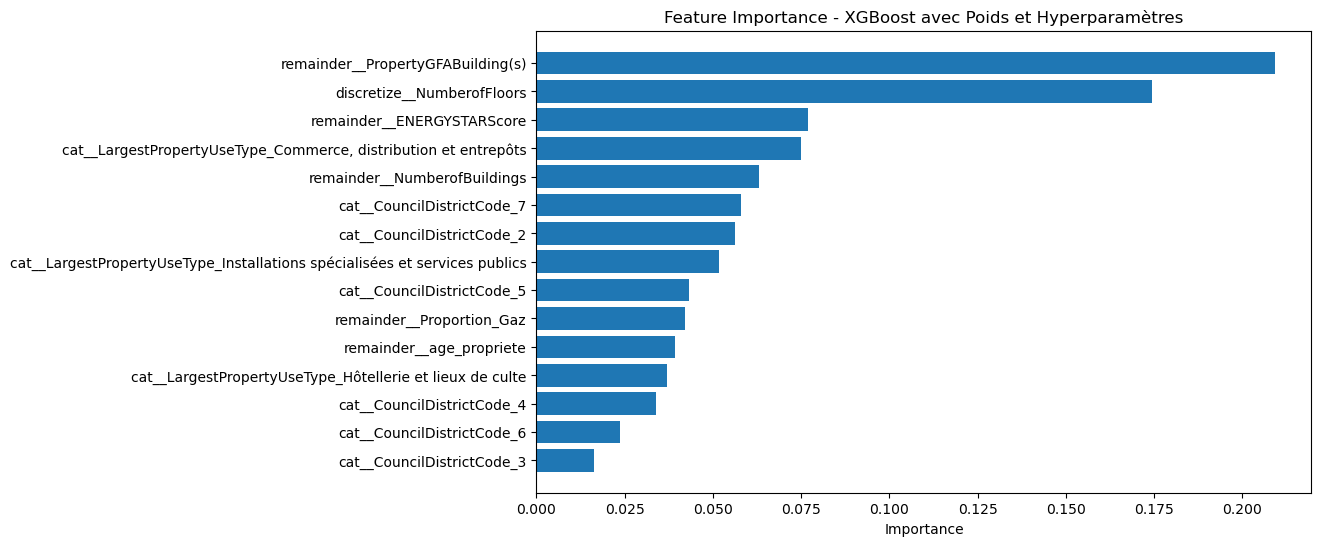

In [236]:
# Entraîner le modèle avec les meilleurs paramètres et en tenant compte des poids
pipeline_xgb_v6.fit(X_Energy_train, y_train, model__sample_weight=poids_echantillons)

# Récupérer le modèle XGBoost du pipeline après l'entraînement
xgb_model = pipeline_xgb_v6.named_steps['model'].regressor_

# Extraire l'importance des caractéristiques
importances = xgb_model.feature_importances_

# Extraire les noms des caractéristiques après transformation
column_names = preprocessing_v18.get_feature_names_out()

# Créer un DataFrame avec les importances
importance_df = pd.DataFrame({
    'Feature': column_names,
    'Importance': importances
})

# Trier par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des caractéristiques
print(importance_df)

# Visualisation graphique
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost avec Poids et Hyperparamètres')
plt.gca().invert_yaxis()  # Pour avoir la plus grande importance en haut
plt.show()

Impact sur les variables existantes :<br>
- PropertyGFABuilding(s) (qui était la plus importante avant l'ajout de ENERGYSTARScore) a vu son importance augmenter légèrement, passant de 0.1985 à 0.2091. Cela suggère que l'ajout de ENERGYSTARScore n'a pas eu un impact négatif sur les autres variables, et que ces deux facteurs (propriété et score énergétique) sont maintenant conjointement importants.
- Les variables catégorielles comme CouncilDistrictCode_2, cCouncilDistrictCode_7, et cCouncilDistrictCode_5 ont une importance un peu réduite.
- La variable ENERGYSTARScore (score énergétique) introduit un nouvel élément qui capte une information potentiellement importante pour prédire la variable cible, ce qui en fait une caractéristique d'importance modérée à élevée.

Analyse de la relation entre l'ajout de ENERGYSTARScore et les autres variables :<br>
L'ajout de ENERGYSTARScore semble avoir revalorisé les variables liées à l'usage des bâtiments, comme LargestPropertyUseType_Commerce, qui gagne en importance. Cela montre que le score énergétique apporte des informations supplémentaires qui complètent l'analyse des bâtiments et de leur usage.<br>
Les districts perdent un peu de leur importance relative par rapport aux autres variables, ce qui peut indiquer que l'impact géographique (districts) devient légèrement moins déterminant par rapport à des facteurs comme l'usage du bâtiment et l'efficacité énergétique.<br>

Conclusion :<br>
L'ajout de ENERGYSTARScore a eu un effet modéré sur les importances des variables dans le modèle. Bien qu'elle n'ait pas déplacé les variables dominantes comme PropertyGFABuilding(s), elle a introduit un facteur supplémentaire significatif pour la prédiction.<br>
Cette nouvelle variable a été bien intégrée dans le modèle sans nuire à l'importance des autres caractéristiques clés. Cela suggère que le score énergétique est un facteur supplémentaire utile pour prédire la variable cible, en particulier dans le contexte des bâtiments et de leur performance énergétique.

## Interprétation du modèle avec SHAP

In [237]:
# Récupérer le modèle XGBoost du pipeline (avec les meilleurs paramètres)
xgb_model = pipeline_xgb_v6.named_steps['model'].regressor_

# Préparer les données de test prétraitées
X_test_preprocessed = pipeline_xgb_v6.named_steps['preprocessing'].transform(X_Energy_test)

# Appliquer les poids d'échantillons sur le modèle
# Les poids sont utilisés pour entraîner le modèle mais n'ont pas d'impact direct sur l'explainer SHAP.
# Cependant, nous allons nous assurer que les prédictions sont faites avec les poids d'échantillons appliqués.

# Créer un explainer SHAP basé sur le modèle XGBoost
explainer = shap.Explainer(xgb_model)

# Calculer les valeurs SHAP pour les données de test
shap_values = explainer(X_test_preprocessed)

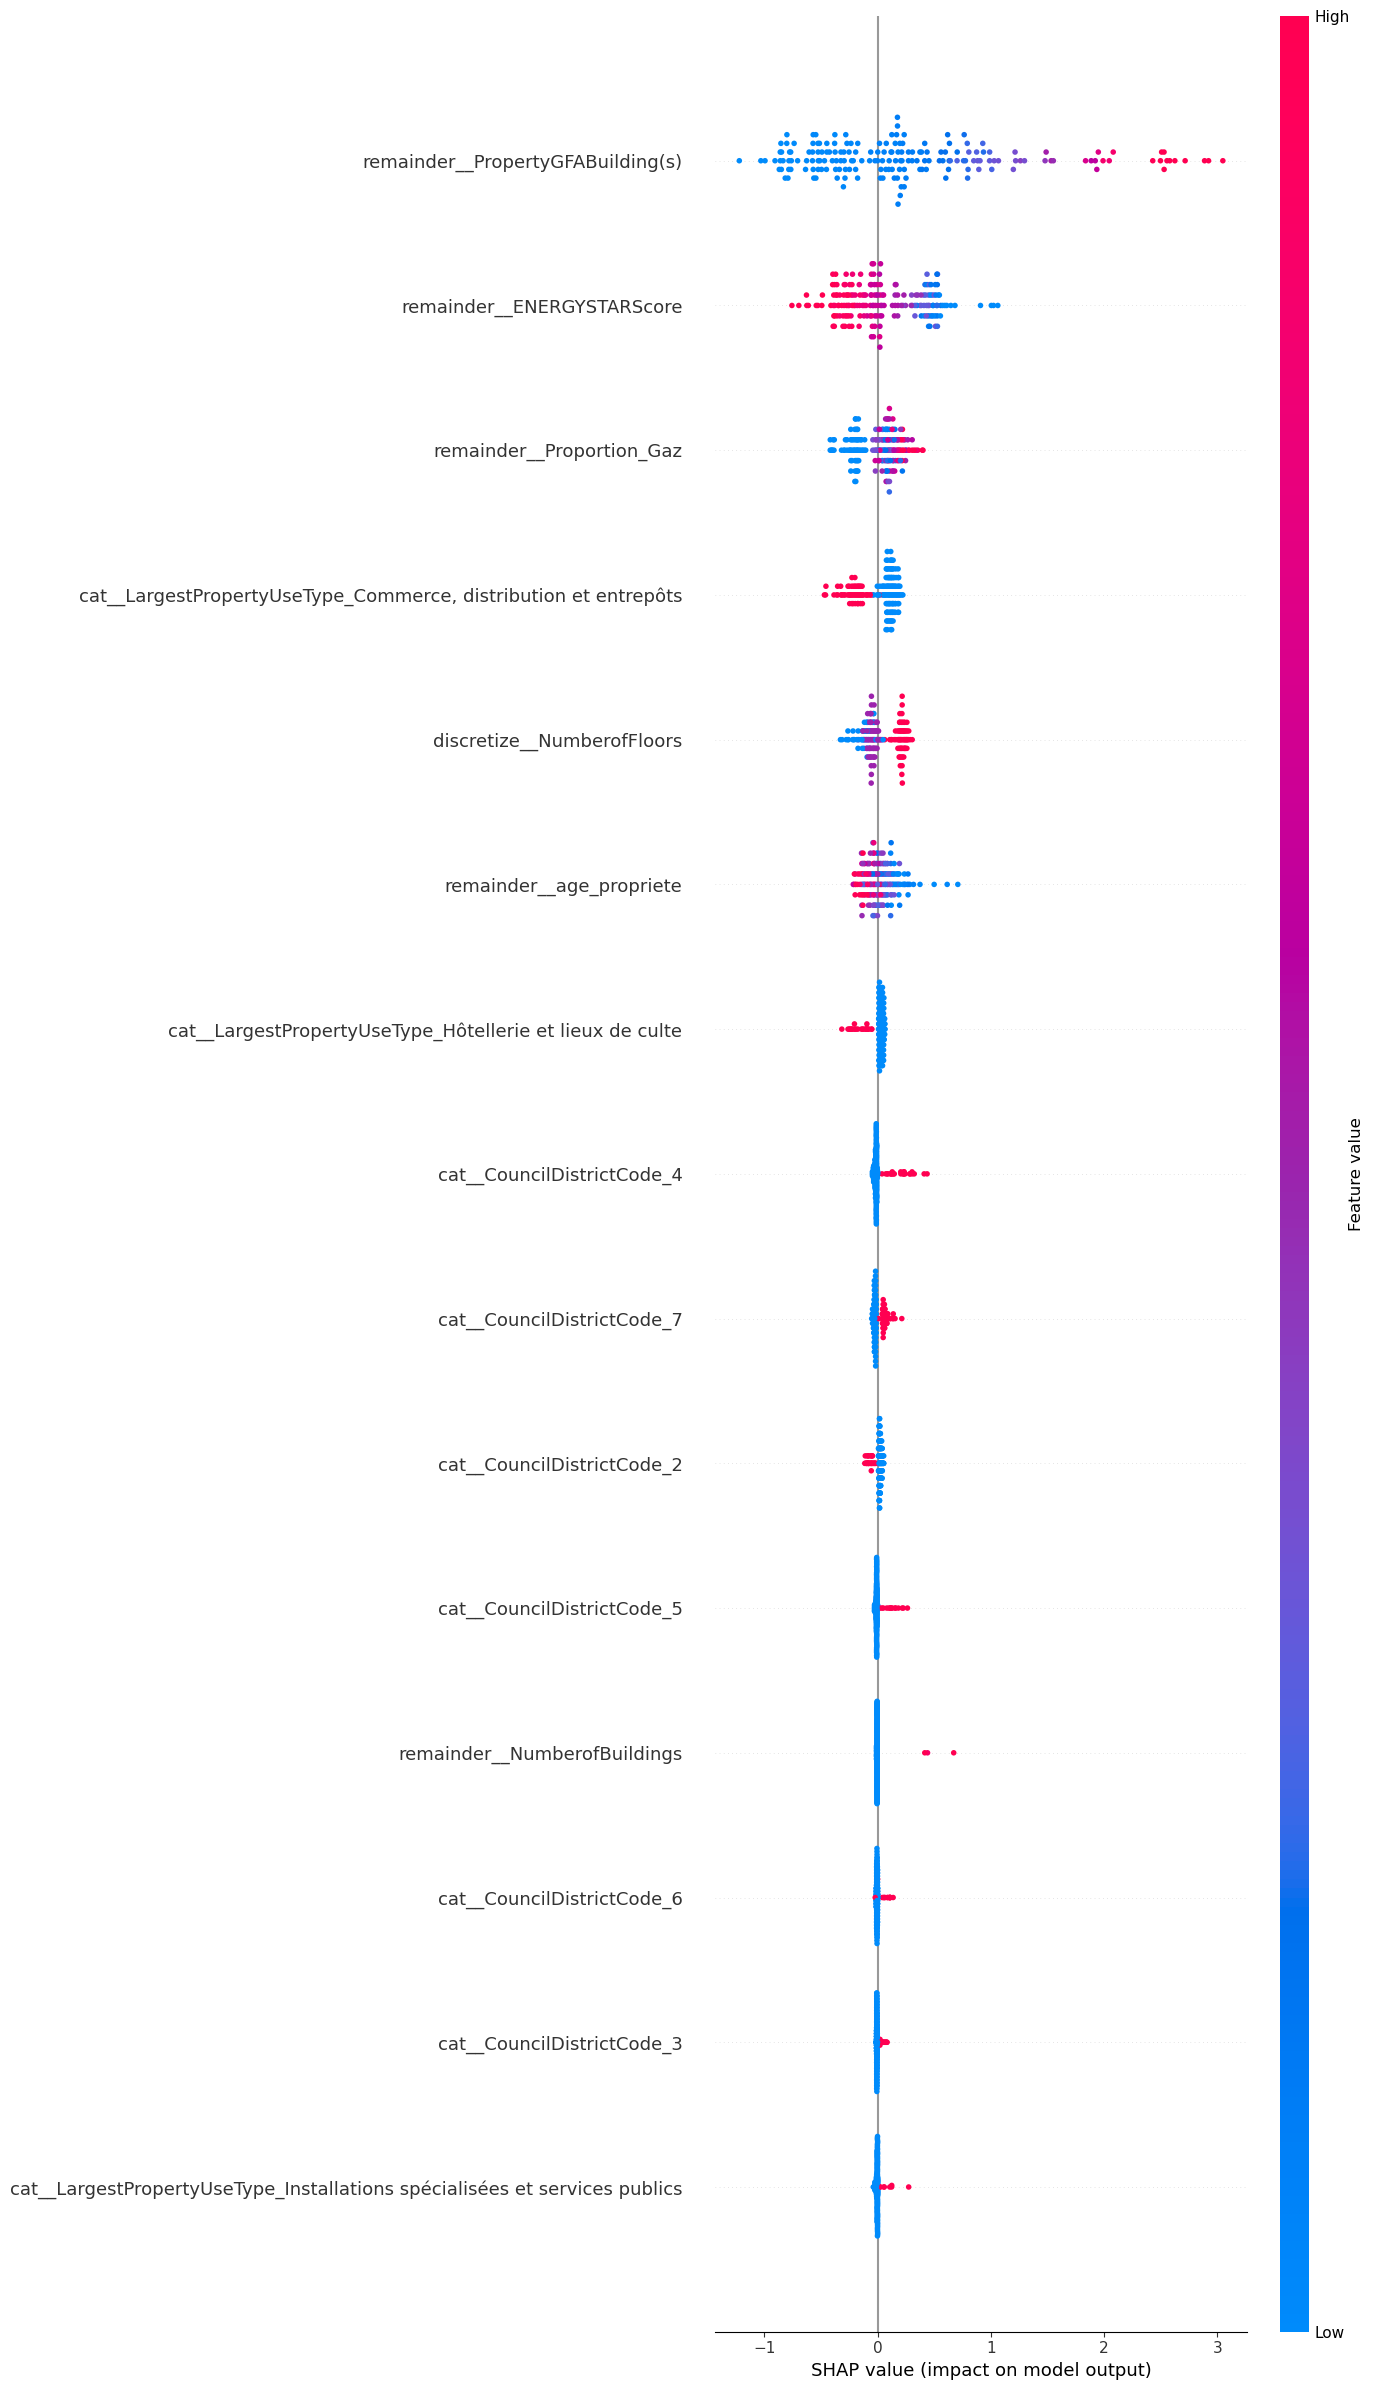

In [238]:

# Visualisation de l'importance globale des caractéristiques avec SHAP
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=pipeline_xgb_v6.named_steps['preprocessing'].get_feature_names_out(), plot_size=(14, 24), max_display=20)

ENERGYSTARScore apparaît comme un facteur clé. Les bâtiments avec un score élevé tendent à diminuer la prédiction, car ils sont plus efficaces énergétiquement. Inversement, ceux avec un score faible augmentent la prédiction, indiquant une consommation d'énergie plus élevée.<br>
Les autres variables restent relativement similaires à leur comportement avant l'ajout de ENERGYSTARScore, ce qui montre que le score énergétique s'ajoute comme une nouvelle dimension de modélisation sans bouleverser les relations existantes.

# Conclusion générale sur l'ajout de la variable *EnergyStarScore*

L'ajout de la variable ENERGYSTARScore permet au modèle de mieux capturer l'efficacité énergétique des bâtiments, ce qui améliore la précision des prédictions concernant leur consommation d'énergie. <br>

- Amélioration de la précision : Le modèle peut désormais distinguer plus précisément les bâtiments efficaces énergétiquement de ceux qui le sont moins, ce qui permet d'ajuster les prédictions en fonction de cette information.<br>
- Réduction de l'impact de certaines caractéristiques : L'importance de certaines caractéristiques comme PropertyGFABuilding(s) et NumberofFloors diminue légèrement, car ENERGYSTARScore fournit une nouvelle perspective sur la consommation énergétique qui était auparavant masquée par d'autres variables.
- Cohérence avec l'intuition : Le score ENERGYSTAR est cohérent avec l'idée que des bâtiments plus efficaces consomment moins d'énergie. Cela renforce la validité de la prédiction du modèle.

Conclusion :<br>
L'ajout de la variable ENERGYSTARScore améliore considérablement le modèle en lui permettant de mieux prendre en compte l'efficacité énergétique, ce qui est crucial pour la prédiction de la consommation d'énergie. Bien que cela redistribue l'importance des autres caractéristiques, il n'y a pas de perturbation majeure, et cela affine la capacité du modèle à prédire la consommation d'énergie d'un bâtiment en fonction de son efficacité énergétique.